## Used Car Dataset
### Dataset description

The [dataset](https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset/data) provides detailed information about various used cars from CarDekho, a website for buying and selling new cars and used cars in India. It includes specifications or attributes of the car such as the name of the car, model year, selling price, kilometers driven, fuel type, seller type, transmission, owner (first owner, second owner, etc.), fuel efficiency, engine, max power, and number of seats.

### Data collection
The dataset was built through web scraping from a website called [CarDekho](https://www.cardekho.com/) where used cars are listed. But since web scraping was used and no other additional information regarding the data collection was provided, there may be complications

* **Data inaccuracy**. Errors or inconsistencies in the original listings from the website may happen such as null values, incorrect inputting of values, or even duplicate values.
* **Bias in listings**. It is likely that the web scraping was done sequentially from page 1 onwards. With this, the dataset may not represent the entire used car market population. Also, the website CarDekho is an Indian website and as we will see later on, majority of the cars for sale are from Indian car brands.


## Dataset structure

Each row corresponds to one car containing the attributes of the car, while each column corresponds to a specific attribute of the car. The dataset contains 8128 data points with 14 columns in total.


| Column Name            | Description |
|------------------------|-------------|
| `name`            | The name of the car model |
| `year`   | The year the car was manufactured |
| `selling_price`  | The selling price of the car in Indian currency. |
| `km_driven`           | The total kilometers driven by the car |
| `fuel`              | The type of fuel of the car |
| `seller_type`         | The type of seller (Individual, dealer, other) |
| `transmission`       | Type of transmission (Manual/Automatic) |
| `owner` | First owner, second owner, other |
| `fuel_efficiency`      | The fuel efficiency of the car (km/ltr/kg)|
| `engine`         | The car's engine measurement in cubic centimeters (cc). It refers to the amount of air and fuel that can be pushed through the cylinders in the engine.|
| `max_power`         | Brake Horsepower (BHP), a measure of actual usable power produced by an engine factoring friction|
| `seats`         | The number of seats in the car |


## 1. Data Cleaning

### Imports

We start with looking at the overview of the dataset.

In [199]:
import pandas as pd

### Data overview

Let's run `df.info()` to have a quick summary of our dataframe.

In [200]:
df = pd.read_csv('cardekho.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [201]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


First, we rename `mileage` to `fuel_efficiency` since experience has shown that this causes confusion with `km_driven`.

In [202]:
df = df.rename(columns={'mileage(km/ltr/kg)': 'fuel_efficiency'})
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


### Skimming Through Columns Without Nulls

Let us first skim through the columns withbout null entries.

Since there are lots of unique values for `name`, it doesn't make sense to scan everything to check for multiple representations. We'll work around this by setting every name into all-caps.

In [203]:
df['name'] = df['name'].str.upper()
df['name'].value_counts()

name
MARUTI SWIFT DZIRE VDI                    162
MARUTI ALTO 800 LXI                        82
MARUTI ALTO LXI                            80
BMW X4 M SPORT X XDRIVE20D                 62
MARUTI SWIFT VDI                           61
                                         ... 
CHEVROLET AVEO U-VA 1.2 LT                  1
MARUTI GYPSY KING SOFT TOP                  1
TATA INDICA VISTA AURA 1.2 SAFIRE BSIV      1
HYUNDAI SANTA FE 4X4 AT                     1
MARUTI 800 DX BSII                          1
Name: count, Length: 2038, dtype: int64

We do the same for selling price. We check that there are no negative prices nor questionably high prices.

In [204]:
df['selling_price'].describe().astype(int)

count        8128
mean       638271
std        806253
min         29999
25%        254999
50%        450000
75%        675000
max      10000000
Name: selling_price, dtype: int64

The same goes for the kilometers driven.

In [205]:
df['km_driven'].describe().astype(int)

count       8128
mean       69819
std        56550
min            1
25%        35000
50%        60000
75%        98000
max      2360457
Name: km_driven, dtype: int64

In [206]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

We check that there are no multiple representations for the categorical variables. Particularly, there could be misspelled values, wrongly encoded value, or any anomalies,

In [207]:
df['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [208]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [209]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

So far, everything seems to be in order.

### Addressing nulls

#### Filling Nulls with Available Data

Instead of dropping nulls immediately, we'll try to recover some values first. Let's also print out the dataframe info once again for quick reference.

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   fuel_efficiency  7907 non-null   float64
 9   engine           7907 non-null   float64
 10  max_power        7913 non-null   object 
 11  seats            7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


First, we'll impute the null entries per model based on the median of the available data. It's easier to demonstrate with an example. First, let's look at a model with null entries in some rows.

In [211]:
df[df['engine'].isnull()]['name'].value_counts().head()

name
MARUTI SWIFT VDI BSIV          23
MARUTI SWIFT 1.3 VXI           14
TOYOTA ETIOS GD                10
MARUTI OMNI E 8 STR STD         9
MARUTI SWIFT VDI BSIV W ABS     7
Name: count, dtype: int64

Let's consider MARUTI SWIFT VDI BSIV for example.

In [212]:
df[df['name'] == 'MARUTI SWIFT VDI BSIV'].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
119,MARUTI SWIFT VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
484,MARUTI SWIFT VDI BSIV,2017,585000,90000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74,5.0
486,MARUTI SWIFT VDI BSIV,2014,430000,80000,Diesel,Individual,Manual,Second Owner,25.2,1248.0,74,5.0
516,MARUTI SWIFT VDI BSIV,2010,330000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
539,MARUTI SWIFT VDI BSIV,2008,229999,50000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN
967,MARUTI SWIFT VDI BSIV,2015,550000,23000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74,5.0
1213,MARUTI SWIFT VDI BSIV,2008,250000,90000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
1279,MARUTI SWIFT VDI BSIV,2014,400000,90000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74,5.0
1340,MARUTI SWIFT VDI BSIV,2010,315000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
1438,MARUTI SWIFT VDI BSIV,2015,470000,54723,Diesel,Dealer,Manual,First Owner,25.2,1248.0,74,5.0


We want to perform the imputation on a model-by-model basis since the same car models should be manufactured to have nearly the same specifications. To fill out these entries, we'll fill everything with the median of the available data to somewhat safeguard ourselves from potential unseen outliers.

In [213]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'fuel_efficiency', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [214]:
for null_column in ['fuel_efficiency', 'engine', 'max_power', 'seats']:
    df[null_column] = pd.to_numeric(df[null_column], errors='coerce')
    cars = df.loc[df[null_column].isnull(), 'name'].unique()
    for car in cars:
        med = df.loc[df['name'] == car, null_column].median()
        df.loc[(df['name'] == car) & (df[null_column].isnull()), null_column] = med

C:\Users\remus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\remus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\remus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\remus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarnin

Just to check if it worked as intended, let's look at the same car model that previously had nulls.

In [215]:
df[df['name'] == 'MARUTI SWIFT VDI BSIV'].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
119,MARUTI SWIFT VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,25.2,1248.0,74.0,5.0
484,MARUTI SWIFT VDI BSIV,2017,585000,90000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74.0,5.0
486,MARUTI SWIFT VDI BSIV,2014,430000,80000,Diesel,Individual,Manual,Second Owner,25.2,1248.0,74.0,5.0
516,MARUTI SWIFT VDI BSIV,2010,330000,110000,Diesel,Individual,Manual,Second Owner,25.2,1248.0,74.0,5.0
539,MARUTI SWIFT VDI BSIV,2008,229999,50000,Diesel,Individual,Manual,Third Owner,25.2,1248.0,74.0,5.0
967,MARUTI SWIFT VDI BSIV,2015,550000,23000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74.0,5.0
1213,MARUTI SWIFT VDI BSIV,2008,250000,90000,Diesel,Individual,Manual,Second Owner,25.2,1248.0,74.0,5.0
1279,MARUTI SWIFT VDI BSIV,2014,400000,90000,Diesel,Individual,Manual,First Owner,25.2,1248.0,74.0,5.0
1340,MARUTI SWIFT VDI BSIV,2010,315000,120000,Diesel,Individual,Manual,Second Owner,25.2,1248.0,74.0,5.0
1438,MARUTI SWIFT VDI BSIV,2015,470000,54723,Diesel,Dealer,Manual,First Owner,25.2,1248.0,74.0,5.0


It worked, now let's look at another car model with null values

In [216]:
df[df['name'] == 'TOYOTA ETIOS GD'].head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
200,TOYOTA ETIOS GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.05,5.0
725,TOYOTA ETIOS GD,2012,300000,120000,Diesel,Individual,Manual,Second Owner,23.59,1364.0,67.05,5.0
907,TOYOTA ETIOS GD,2013,409999,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.04,5.0
1472,TOYOTA ETIOS GD,2015,475000,120000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.05,5.0
1685,TOYOTA ETIOS GD,2014,400000,120000,Diesel,Individual,Manual,Second Owner,23.59,1364.0,67.04,5.0
1764,TOYOTA ETIOS GD,2016,570000,145000,Diesel,Individual,Manual,Second Owner,23.59,1364.0,67.05,5.0
1956,TOYOTA ETIOS GD,2011,400000,90000,Diesel,Individual,Manual,Third Owner,23.59,1364.0,67.05,5.0
2388,TOYOTA ETIOS GD,2012,450000,148000,Diesel,Individual,Manual,Second Owner,23.59,1364.0,67.05,5.0
2617,TOYOTA ETIOS GD,2015,500000,125000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.05,5.0
2682,TOYOTA ETIOS GD,2012,500000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.05,5.0


In doing so, we find an improvement in our nulls:

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   fuel_efficiency  7968 non-null   float64
 9   engine           7968 non-null   float64
 10  max_power        7967 non-null   float64
 11  seats            7968 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


For the next part, we'll consider only the top 5 models with the most nulls per feature, then manually look up the specifications as a way to salvage a bit more rows.

#### Filling engines manually

By researching engine specifications, we are able to fill in some null entries in the `engine` column.

In [218]:
df[df['engine'].isnull()]['name'].value_counts().head(5)

name
MARUTI SWIFT 1.3 VXI           14
MARUTI SWIFT VDI BSIV W ABS     7
HYUNDAI SANTRO XING XG          6
MARUTI ESTILO LXI               5
TATA INDICA DLS                 5
Name: count, dtype: int64

In [219]:
df.loc[df['name'] == 'MARUTI SWIFT 1.3 VXI', 'engine'] = 1298.0
df.loc[df['name'] == 'MARUTI SWIFT VDI BSIV W ABS', 'engine'] = 1248.0
df.loc[df['name'] == 'MARUTI ESTEEM LX', 'engine'] = 1298.0
df.loc[df['name'] == 'HYUNDAI SANTRO XING XG', 'engine'] = 1086.0
df.loc[df['name'] == 'TATA INDICA DLS', 'engine'] = 1405.0

In [220]:
df[df['engine'].isnull()]['name'].value_counts()

name
MARUTI ESTILO LXI                             5
HYUNDAI SANTRO XING XL                        5
TATA INDICA VISTA AQUA 1.3 QUADRAJET (ABS)    5
HYUNDAI SANTRO GLS I - EURO II                5
MARUTI SWIFT 1.3 LXI                          4
                                             ..
HYUNDAI SANTRO AT CNG                         1
FORD IKON 1.8 D                               1
PEUGEOT 309 GLD                               1
HYUNDAI SANTRO XING XO                        1
HYUNDAI ACCENT GVS                            1
Name: count, Length: 70, dtype: int64

#### Filling seats manually

We shall perform a similar process to recover some null values in the `seats` column.

In [221]:
df[df['seats'].isnull()]['name'].value_counts().head(5)

name
MARUTI SWIFT 1.3 VXI           14
MARUTI SWIFT VDI BSIV W ABS     7
HYUNDAI SANTRO XING XG          6
MARUTI ESTILO LXI               5
TATA INDICA DLS                 5
Name: count, dtype: int64

In [222]:
df.loc[df['name'] == 'MARUTI SWIFT VDI BSIV', 'seats'] = 5
df.loc[df['name'] == 'MARUTI SWIFT 1.3 VXI', 'seats'] = 5
df.loc[df['name'] == 'TOYOTA ETIOS GD', 'seats'] = 5
df.loc[df['name'] == 'MARUTI OMNI E 8 STR STD', 'seats'] = 8
df.loc[df['name'] == 'MARUTI SWIFT VDI BSIV W ABS', 'seats'] = 5

In [223]:
df[df['seats'].isnull()]['name'].value_counts().head()

name
HYUNDAI SANTRO XING XG            6
MARUTI ESTILO LXI                 5
TATA INDICA DLS                   5
HYUNDAI SANTRO XING XL            5
HYUNDAI SANTRO GLS I - EURO II    5
Name: count, dtype: int64

#### Filling `max_power` Manually

We do the same process, namely by resesarching relevant vehicle specificiations, for the maximum power.

In [224]:
df[df['max_power'].isnull()]['name'].value_counts().head()

name
MARUTI SWIFT 1.3 VXI           14
MARUTI SWIFT VDI BSIV W ABS     7
HYUNDAI SANTRO XING XG          6
TATA INDICA DLS                 5
MARUTI ESTILO LXI               5
Name: count, dtype: int64

In [225]:
df.loc[df['name'] == 'MARUTI SWIFT VDI BSIV', 'max_power'] = 75
df.loc[df['name'] == 'MARUTI SWIFT 1.3 VXI', 'max_power'] = 87
df.loc[df['name'] == 'TOYOTA ETIOS GD', 'max_power'] = 67
df.loc[df['name'] == 'MARUTI OMNI E 8 STR STD', 'max_power'] = 34
df.loc[df['name'] == 'MARUTI SWIFT VDI BSIV W ABS', 'max_power'] = 74

In [226]:
df[df['max_power'].isnull()]['name'].value_counts().head()

name
HYUNDAI SANTRO XING XG                        6
TATA INDICA DLS                               5
MARUTI ESTILO LXI                             5
HYUNDAI SANTRO XING XL                        5
TATA INDICA VISTA AQUA 1.3 QUADRAJET (ABS)    5
Name: count, dtype: int64

#### Filling `fuel_efficiency` Manually

In [227]:
df[df['fuel_efficiency'].isnull()]['name'].value_counts().head()

name
MARUTI SWIFT 1.3 VXI           14
MARUTI SWIFT VDI BSIV W ABS     7
HYUNDAI SANTRO XING XG          6
MARUTI ESTILO LXI               5
TATA INDICA DLS                 5
Name: count, dtype: int64

In [228]:
df.loc[df['name'] == 'MARUTI SWIFT 1.3 VXI', 'fuel_efficiency'] = 16.1
df.loc[df['name'] == 'MARUTI SWIFT VDI BSIV', 'fuel_efficiency'] = 14.84
df.loc[df['name'] == 'HYUNDAI SANTRO XING XG', 'fuel_efficiency'] = 17.8
df.loc[df['name'] == 'TATA INDICA DLS', 'fuel_efficiency'] = 13.5
df.loc[df['name'] == 'HYUNDAI SANTRO XING XL', 'fuel_efficiency'] = 17.92

In [229]:
df[df['fuel_efficiency'].isnull()]['name'].value_counts().head()

name
MARUTI SWIFT VDI BSIV W ABS                   7
MARUTI ESTILO LXI                             5
HYUNDAI SANTRO GLS I - EURO II                5
TATA INDICA VISTA AQUA 1.3 QUADRAJET (ABS)    5
MARUTI SWIFT 1.3 LXI                          4
Name: count, dtype: int64

#### Dropping the rest

Let us now drop the rest of the broken entries now that we had recovered enough through the preprocessing above.

In [230]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7981 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7981 non-null   object 
 1   year             7981 non-null   int64  
 2   selling_price    7981 non-null   int64  
 3   km_driven        7981 non-null   int64  
 4   fuel             7981 non-null   object 
 5   seller_type      7981 non-null   object 
 6   transmission     7981 non-null   object 
 7   owner            7981 non-null   object 
 8   fuel_efficiency  7981 non-null   float64
 9   engine           7981 non-null   float64
 10  max_power        7981 non-null   float64
 11  seats            7981 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 810.6+ KB


## Addressing Duplicates

Next, we proceed with dropping exact duplicates. We start by checking the number of complete duplicates, i.e. duplicated rows where every column entry is the same.

In [231]:
duplicate_rows = df[df.duplicated()]
print(f"Number of exact duplicates: {duplicate_rows.shape[0]}")
print(f"Proportion of exact duplicates: {duplicate_rows.shape[0]/ len(df)}")

Number of exact duplicates: 1194
Proportion of exact duplicates: 0.14960531261746648


To justify this decision, observe the following:

In [232]:
duplicate_rows.groupby(['name', 'km_driven', 'selling_price', 'seller_type', 'owner'])['name'].count().sort_values(ascending=False).head(10)

name                                    km_driven  selling_price  seller_type       owner       
JAGUAR XF 2.0 DIESEL PORTFOLIO          45000      3200000        Dealer            First Owner     33
LEXUS ES 300H                           20000      5150000        Dealer            First Owner     33
HONDA JAZZ VX                           56494      550000         Trustmark Dealer  First Owner     31
TOYOTA CAMRY 2.5 HYBRID                 68089      2000000        Trustmark Dealer  First Owner     31
HONDA AMAZE V CVT PETROL BSIV           7032       779000         Trustmark Dealer  First Owner     30
TOYOTA INNOVA 2.5 VX (DIESEL) 7 SEATER  79328      750000         Trustmark Dealer  Second Owner    30
BMW X4 M SPORT X XDRIVE20D              7500       5400000        Dealer            First Owner     29
                                        8500       5500000        Dealer            First Owner     29
SKODA RAPID 1.6 MPI AT ELEGANCE         11000      645000         Dealer       

Take the top 10 duplicated rows for example. We can infer that these are most likely caused by the seller spam-posting listings for better exposure or for some other reason. Why? What are the odds that the 33 entries of the exact same model have exactly the same kilometers driven, selling price, and seller type are from different users? Unless these cars were driven in a convoy, we can attribute the duplication to spam-posting. We should remove these because keeping them would introduce biases when we perform statistical tests. We'll go ahead and drop these rows.

In [233]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6787 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6787 non-null   object 
 1   year             6787 non-null   int64  
 2   selling_price    6787 non-null   int64  
 3   km_driven        6787 non-null   int64  
 4   fuel             6787 non-null   object 
 5   seller_type      6787 non-null   object 
 6   transmission     6787 non-null   object 
 7   owner            6787 non-null   object 
 8   fuel_efficiency  6787 non-null   float64
 9   engine           6787 non-null   float64
 10  max_power        6787 non-null   float64
 11  seats            6787 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 689.3+ KB


### Feature Engineering

#### Extracting Manufacturer Information

Just by looking at the `name` column, we can get a hunch that the model names are inputted with the car's brand as the first word. Therefore, we extract the first words of the models and set it as a new column.

In [234]:
df['brand'] = df['name'].str.split(" ").str[0].str.title()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats,brand
0,MARUTI SWIFT DZIRE VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,SKODA RAPID 1.5 TDI AMBITION,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,HONDA CITY 2017-2020 EXI,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,HYUNDAI I20 SPORTZ DIESEL,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,MARUTI SWIFT VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


In [235]:
df['brand'].value_counts()

brand
Maruti           2136
Hyundai          1214
Mahindra          709
Tata              634
Honda             361
Ford              353
Toyota            346
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
Bmw                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Force               4
Isuzu               4
Ambassador          4
Daewoo              3
Land                3
Mg                  3
Kia                 3
Lexus               1
Ashok               1
Opel                1
Name: count, dtype: int64

It seems that our hunch is right as all the displayed car brands so far are familiar. One thing that we might change is the brand "Land" which seems like it should be "Land Rover". Just to double check, we run the following:

In [236]:
df.loc[df['name'].str.contains('LAND'), 'name'].str.split(" ").str[0:2]

135        [LAND, ROVER]
2137       [LAND, ROVER]
4011    [ASHOK, LEYLAND]
6217      [TOYOTA, LAND]
6724       [LAND, ROVER]
Name: name, dtype: object

It is indeed the case. We go ahead and replace the instances to "Land Rover"

In [237]:
df['brand'] = df['brand'].apply(lambda x: 'Land Rover' if x == 'Land' else x)
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'Bmw', 'Nissan', 'Lexus',
       'Jaguar', 'Land Rover', 'Mg', 'Volvo', 'Daewoo', 'Kia', 'Fiat',
       'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

Also, our formatting messed up MG and BMW so we'll correct them.

In [238]:
df['brand'] = df['brand'].replace({'Mg': 'MG',
                                   'Bmw': 'BMW'})
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat',
       'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

#### Manufacturer Origin

Finally, we'll add a column that indicates the company's country of origin i.e. where its headquarters are located.

In [239]:
car_origins = {
    'Maruti': 'India',
    'Skoda': 'Czech Republic',
    'Honda': 'Japan',
    'Hyundai': 'South Korea',
    'Toyota': 'Japan',
    'Ford': 'United States',
    'Renault': 'France',
    'Mahindra': 'India',
    'Tata': 'India',
    'Chevrolet': 'United States',
    'Datsun': 'Japan',
    'Jeep': 'United States',
    'Mercedes-Benz': 'Germany',
    'Mitsubishi': 'Japan',
    'Audi': 'Germany',
    'Volkswagen': 'Germany',
    'BMW': 'Germany',
    'Nissan': 'Japan',
    'Lexus': 'Japan',
    'Jaguar': 'United Kingdom',
    'Land Rover': 'United Kingdom',
    'MG': 'United Kingdom',
    'Volvo': 'Sweden',
    'Daewoo': 'South Korea',
    'Kia': 'South Korea',
    'Fiat': 'Italy',
    'Force': 'India',
    'Ambassador': 'India',
    'Ashok': 'India',
    'Isuzu': 'Japan',
    'Opel': 'Germany'
}

df['origin'] = df['brand'].apply(lambda x: car_origins[x])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats,brand,origin
0,MARUTI SWIFT DZIRE VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,India
1,SKODA RAPID 1.5 TDI AMBITION,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Czech Republic
2,HONDA CITY 2017-2020 EXI,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,Japan
3,HYUNDAI I20 SPORTZ DIESEL,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,South Korea
4,MARUTI SWIFT VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,India


### Final Touches

Finally, we add minor touches by rearranging the columns of our dataframe.

In [240]:
df['seats'] = df['seats'].astype(int)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats,brand,origin
0,MARUTI SWIFT DZIRE VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti,India
1,SKODA RAPID 1.5 TDI AMBITION,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda,Czech Republic
2,HONDA CITY 2017-2020 EXI,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda,Japan
3,HYUNDAI I20 SPORTZ DIESEL,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai,South Korea
4,MARUTI SWIFT VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti,India


In [241]:
temp = df.loc[:, ['name', 'brand', 'origin', 'year']]
df = df.drop(['name', 'brand', 'origin', 'year'], axis=1)
df = pd.concat([temp, df], axis=1)
df.head()

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
0,MARUTI SWIFT DZIRE VDI,Maruti,India,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5
1,SKODA RAPID 1.5 TDI AMBITION,Skoda,Czech Republic,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5
2,HONDA CITY 2017-2020 EXI,Honda,Japan,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5
3,HYUNDAI I20 SPORTZ DIESEL,Hyundai,South Korea,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5
4,MARUTI SWIFT VXI BSIII,Maruti,India,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5


## 2.1. EDA and Further Cleaning

### Summary Statistics

Our approach is to start with an over view, a broad exploration about the data and narrow down to the specifics.

In [242]:
df.describe(include='all')

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
count,6787,6787,6787,6787.000000,6.787000e+03,6.787000e+03,6787,6787,6787,6787,6787.000000,6787.000000,6787.000000,6787.00000
unique,1963,31,10,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,MARUTI SWIFT DZIRE VDI,Maruti,India,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,151,2136,3488,NaN,NaN,NaN,3701,6090,6212,4202,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2013.574186,5.236760e+05,7.362925e+04,NaN,NaN,NaN,NaN,19.401656,1428.867688,87.555955,5.43377
std,NaN,NaN,NaN,3.902386,5.216329e+05,5.854187e+04,NaN,NaN,NaN,NaN,4.039378,491.680293,31.700242,0.98403
min,NaN,NaN,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.00000
25%,NaN,NaN,NaN,2011.000000,2.500000e+05,3.851300e+04,NaN,NaN,NaN,NaN,16.575000,1197.000000,67.100000,5.00000
50%,NaN,NaN,NaN,2014.000000,4.110000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,81.830000,5.00000
75%,NaN,NaN,NaN,2017.000000,6.450000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.320000,1498.000000,99.600000,5.00000


We check if the numerical values show any abnormalities using median and mode, since the mean of the numerical values are already shown above.

In [243]:
numeric_df = df.select_dtypes(include=['number'])

median_mode_df = pd.DataFrame({'Median': numeric_df.median(), 'Mode': numeric_df.mode().iloc[0]})
median_mode_df

,Median,Mode
year,2014.00,2017.0
selling_price,411000.00,300000.0
km_driven,70000.00,120000.0
fuel_efficiency,19.30,18.9
engine,1248.00,1248.0
max_power,81.83,74.0
seats,5.00,5.0


At first glance, there seem to be no questionable metrics that are jumping out like negative `km_driven` values or `seats` in the millions.

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6787 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6787 non-null   object 
 1   brand            6787 non-null   object 
 2   origin           6787 non-null   object 
 3   year             6787 non-null   int64  
 4   selling_price    6787 non-null   int64  
 5   km_driven        6787 non-null   int64  
 6   fuel             6787 non-null   object 
 7   seller_type      6787 non-null   object 
 8   transmission     6787 non-null   object 
 9   owner            6787 non-null   object 
 10  fuel_efficiency  6787 non-null   float64
 11  engine           6787 non-null   float64
 12  max_power        6787 non-null   float64
 13  seats            6787 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 795.4+ KB


### Univariate Analysis

In this section, we will tackle both numerical valued features and categorical variables.

#### Numerical Features

#### Distributions of Numerical Data

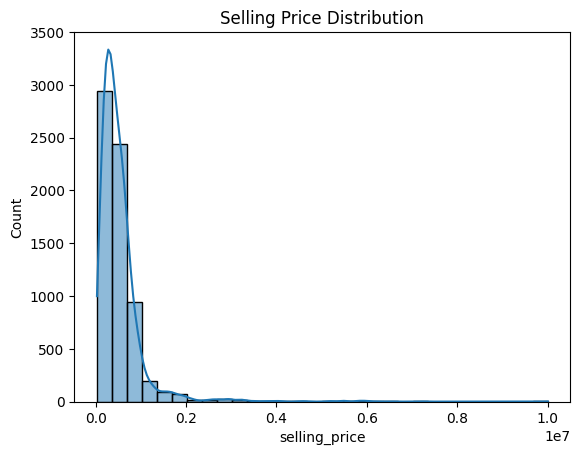

In [245]:
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Selling Price Distribution')
plt.show()

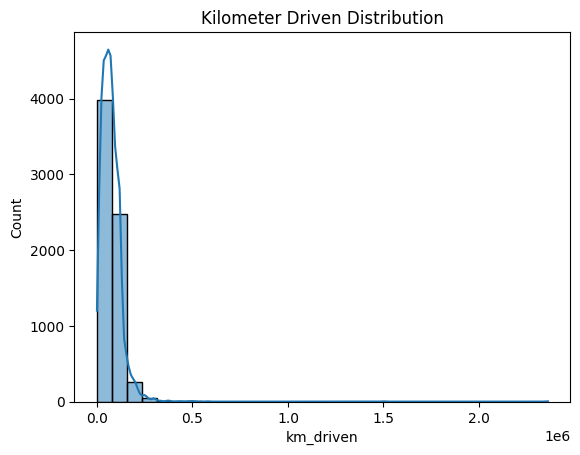

In [246]:
sns.histplot(df['km_driven'], bins=30, kde=True)
plt.title('Kilometer Driven Distribution')
plt.show()

The distributions for both `selling_price` and `km_driven` are concerning since they are both highly skewed to the right, showing obvious signs of outliers for both columns. But we will deal with this after further visualizations and insights.

In [247]:
df.sort_values(by='km_driven', ascending=False).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
3486,HYUNDAI I20 ASTA 1.2,Hyundai,South Korea,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5
1810,MAHINDRA XUV500 W6 2WD,Mahindra,India,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,7
3508,MARUTI WAGON R LXI MINOR,Maruti,India,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.90,1061.0,67.00,5
3641,MARUTI WAGON R VXI BS IV,Maruti,India,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5
6673,TOYOTA INNOVA 2.5 EV DIESEL PS 7 SEATER BSIII,Toyota,Japan,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.57,7
5106,MAHINDRA SCORPIO M2DI,Mahindra,India,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.50,2179.0,115.00,5
5189,TOYOTA INNOVA 2.5 VX (DIESEL) 7 SEATER,Toyota,Japan,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.60,7
5467,TOYOTA INNOVA 2.5 VX (DIESEL) 7 SEATER BS IV,Toyota,Japan,2010,950000,426000,Diesel,Individual,Manual,First Owner,12.80,2494.0,102.00,7
2272,MAHINDRA BOLERO SLE,Mahindra,India,2010,260000,380000,Diesel,Individual,Manual,Second Owner,13.60,2523.0,63.00,7
7102,TOYOTA INNOVA 2.5 V DIESEL 8-SEATER,Toyota,Japan,2007,350000,376412,Diesel,Individual,Manual,Second Owner,12.80,2494.0,102.00,8


The obvious outliers are the first two based on the kilometers driven. These two sources from [Everlance](https://www.everlance.com/blog/10-highest-mileage-vehicles) and [Car From Japan](https://carfromjapan.com/article/highest-mileage-cars-ever/#:~:text=Cars%20Ever%20Recorded-,Irvin%20Gordon's%201966%20Volvo%201800S,of%20more%20than%203%2C039%2C122%20miles.) have shown top recorded mileage. If we were to assume that these entries are true, then these vehicles should be listed in those blogs since the range of the cars listed there have travelled from at least 1 million to 3 million miles. Clearly, they are not.

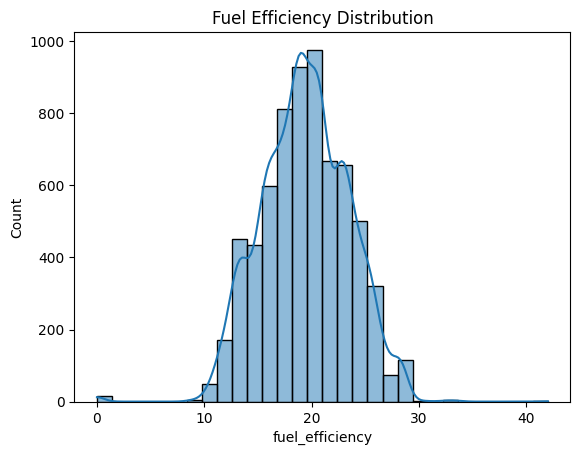

In [248]:
sns.histplot(df['fuel_efficiency'], bins=30, kde=True)
plt.title('Fuel Efficiency Distribution')
plt.show()

* The distribution of fuel efficiency is symmetric with several peaks and valleys, so we cannot confidently say that it looks like a normal or t-distribution

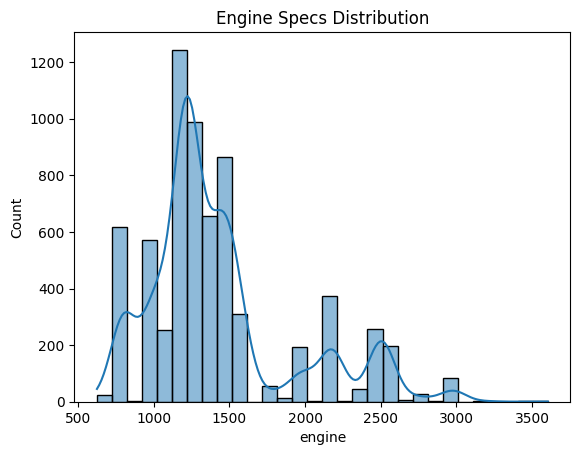

In [249]:
sns.histplot(df['engine'], bins=30, kde=True)
plt.title('Engine Specs Distribution')
plt.show()

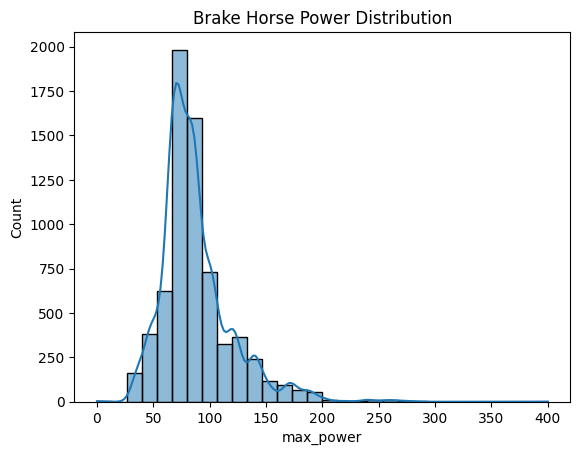

In [250]:
sns.histplot(df['max_power'], bins=30, kde=True)
plt.title('Brake Horse Power Distribution')
plt.show()

These last two distributions are definitely skewed to the right. Nonetheless, there will be more tests for normality in the latter part of this notebook.

#### Boxplots of Numerical Data

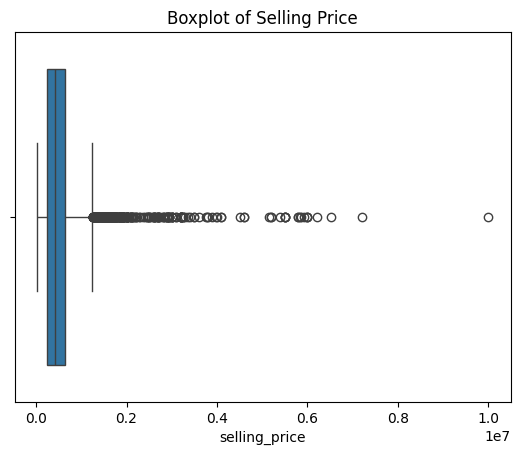

In [251]:
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

The boxplot for selling price show a very large amount of outliers towards the right side.

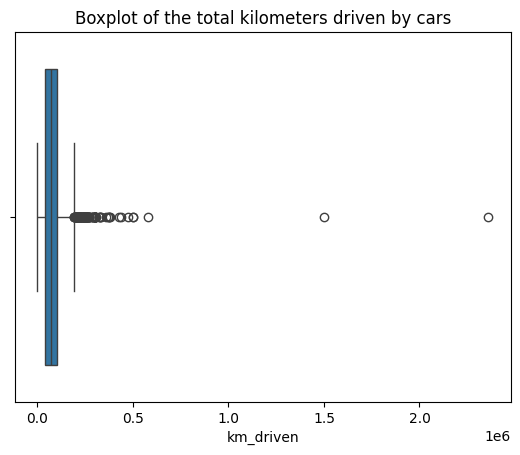

In [252]:
sns.boxplot(x=df['km_driven'])
plt.title('Boxplot of the total kilometers driven by cars')
plt.show()

The boxplot for `km_driven` also indicates the presence of much outliers towards the right.

The boxplots for the selling price of cars and total kilometers driven show how much the outliers affect the rest of the data.

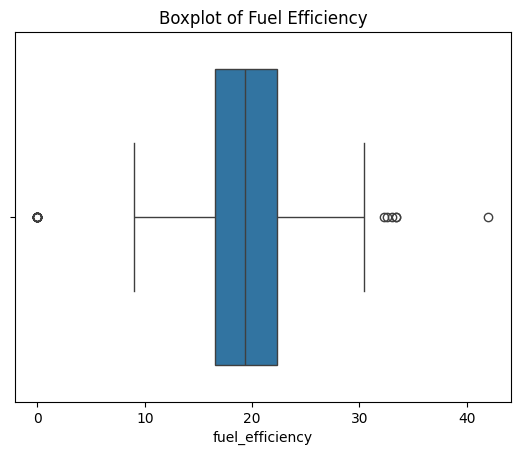

In [253]:
sns.boxplot(x=df['fuel_efficiency'])
plt.title('Boxplot of Fuel Efficiency')
plt.show()

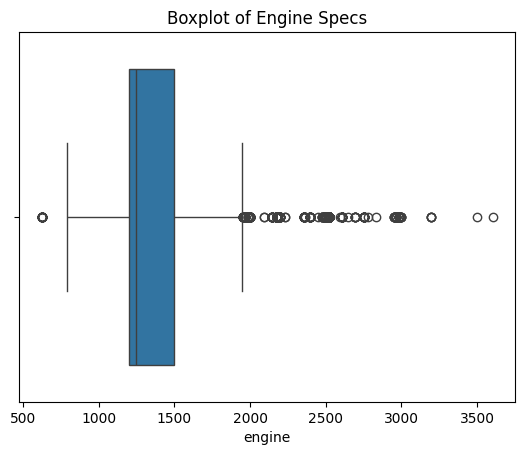

In [254]:
sns.boxplot(x=df['engine'])
plt.title('Boxplot of Engine Specs')
plt.show()

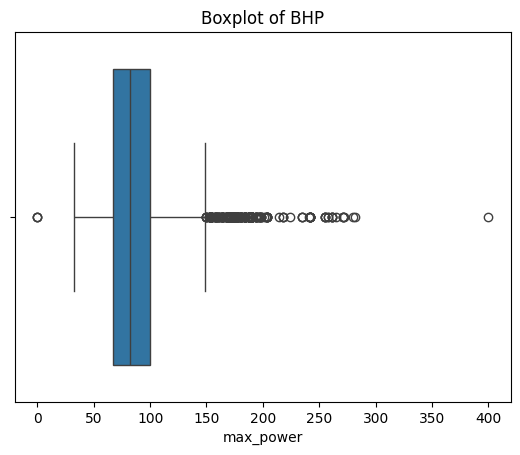

In [255]:
sns.boxplot(x=df['max_power'])
plt.title('Boxplot of BHP')
plt.show()

The boxplots for the engine specs of cars and BHP also indicate positive skew.

#### Outlier Detection & Handling

In [256]:
print(f"Original dataset size: {df.shape[0]}")

Original dataset size: 6787


##### Outlier Detection in *selling_price*

In [257]:
df.sort_values(by='selling_price', ascending=False).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
170,VOLVO XC90 T8 EXCELLENCE BSIV,Volvo,Sweden,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400.00,4
2938,BMW X7 XDRIVE 30D DPE,BMW,Germany,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,265.00,7
4952,AUDI A6 35 TFSI MATRIX,Audi,Germany,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5
4950,AUDI A6 35 TFSI MATRIX,Audi,Germany,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5
1071,BMW 6 SERIES GT 630D LUXURY LINE,BMW,Germany,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.40,4
136,MERCEDES-BENZ S-CLASS S 350 CDI,Mercedes-Benz,Germany,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,5
4766,BMW 6 SERIES GT 630D LUXURY LINE,BMW,Germany,2018,6000000,27000,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.40,4
4951,AUDI A6 35 TFSI MATRIX,Audi,Germany,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5
148,MERCEDES-BENZ S-CLASS S 350 CDI,Mercedes-Benz,Germany,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282.00,5
6258,BMW 6 SERIES GT 630D LUXURY LINE,BMW,Germany,2018,5830000,30000,Diesel,Individual,Automatic,First Owner,17.09,2993.0,261.40,4


We recall that the currency in this dataset is in Indian currency, the first entry is an outlier upon checking its resale price on another website [CarWale](https://www.carwale.com/used/volvo-xc90/),  the resale price listed here is 10000000/100000 = 100 Lakhs, which is more expensive by 15 Lakhs.

In [258]:
df.sort_values(by='selling_price', ascending=True).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
5714,MARUTI 800 AC,Maruti,India,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.1,796.0,37.0,4
2145,MARUTI ZEN LXI,Maruti,India,2001,30000,10000,Petrol,Individual,Manual,First Owner,17.3,993.0,60.0,5
5965,MARUTI 800 STD,Maruti,India,2000,31000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.1,796.0,37.0,4
1926,MARUTI 800 STD,Maruti,India,2004,31504,110000,Petrol,Individual,Manual,Third Owner,16.1,796.0,37.0,4
4811,MARUTI WAGON R VXI,Maruti,India,2004,33351,90000,Petrol,Individual,Manual,Third Owner,18.9,998.0,67.1,5
2256,MARUTI 800 AC,Maruti,India,2007,35000,10000,Petrol,Individual,Manual,First Owner,16.1,796.0,37.0,4
8025,MARUTI 800 AC,Maruti,India,1998,35000,40000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,4
1252,MARUTI 800 STD BSII,Maruti,India,2003,35000,35000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,4
2818,MARUTI 800 STD,Maruti,India,2001,39000,42108,Petrol,Individual,Manual,First Owner,16.1,796.0,37.0,4
206,MARUTI OMNI E 8 STR STD,Maruti,India,2003,40000,90000,Petrol,Individual,Manual,Second Owner,16.8,796.0,34.0,8


The low-valued outliers of *selling_price* are mostly old cars and local car brands such as Maruti and Tata Indica; giving the reason why they are low-valued cars.

In [259]:
lower_bound, upper_bound = df['selling_price'].quantile([0, 0.97])
count_upper = len(df[df['selling_price'] > upper_bound])
print(f"Number of values above 97% of the data: {count_upper}\n")

extreme_proportion = (count_upper) / len(df)
print(f"Proportion of extreme values: {extreme_proportion*100:.4f}%")

Number of values above 97% of the data: 204

Proportion of extreme values: 3.0057%


We will not involve the aesthetic factors of cars since it cannot be done with our current knowledge. This limitation avoids the potential influence of aesthetic appeal to the car value. In other words, the study is not to guide people who want to buy luxury cars that obviously involves aesthetic looks as a major factor to the decision, but to only objectively guide to what car specifications they should look for.

Judging from the graphs shown earlier, showing how the most expensive car in the dataset is an outlier, and the proportion of the extreme values is less than 3 percent, we may consider them as outliers and drop them.

In [260]:
original_size = len(df)
lower_indices = df[df['selling_price'] < lower_bound].index
upper_indices = df[df['selling_price'] > upper_bound].index

df.drop(upper_indices, inplace=True)
new_size = len(df)

print(f"Original dataset size: {original_size}")
print(f"New dataset size: {new_size}")

Original dataset size: 6787
New dataset size: 6583


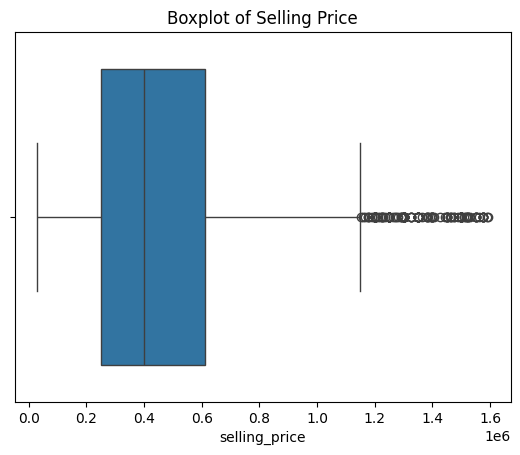

In [261]:
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

We have already removed the top 3 percent of the dataset based on selling price, but it is still positively skewed. We do not want to have a biased dataset because of trying too much to make these values normal by dropping.

So, we will instead transform *selling_price* through the logarthmic transformation to reduce the impact of extreme values as well as reduce the skewness of the distribution.

##### Outlier Detection and Handling in `km_driven`

In [262]:
df.sort_values(by='km_driven', ascending=False).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
3486,HYUNDAI I20 ASTA 1.2,Hyundai,South Korea,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5
1810,MAHINDRA XUV500 W6 2WD,Mahindra,India,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,7
3508,MARUTI WAGON R LXI MINOR,Maruti,India,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.90,1061.0,67.00,5
3641,MARUTI WAGON R VXI BS IV,Maruti,India,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5
6673,TOYOTA INNOVA 2.5 EV DIESEL PS 7 SEATER BSIII,Toyota,Japan,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.57,7
5106,MAHINDRA SCORPIO M2DI,Mahindra,India,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.50,2179.0,115.00,5
5189,TOYOTA INNOVA 2.5 VX (DIESEL) 7 SEATER,Toyota,Japan,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.60,7
5467,TOYOTA INNOVA 2.5 VX (DIESEL) 7 SEATER BS IV,Toyota,Japan,2010,950000,426000,Diesel,Individual,Manual,First Owner,12.80,2494.0,102.00,7
2272,MAHINDRA BOLERO SLE,Mahindra,India,2010,260000,380000,Diesel,Individual,Manual,Second Owner,13.60,2523.0,63.00,7
7102,TOYOTA INNOVA 2.5 V DIESEL 8-SEATER,Toyota,Japan,2007,350000,376412,Diesel,Individual,Manual,Second Owner,12.80,2494.0,102.00,8


In [263]:
df.sort_values(by='km_driven', ascending=True).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
7913,MARUTI EECO 5 STR WITH AC PLUS HTR CNG,Maruti,India,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.10,1196.0,73.00,5
7492,HYUNDAI SANTRO MAGNA,Hyundai,South Korea,2020,500000,1000,Petrol,Individual,Manual,First Owner,20.30,1086.0,68.07,5
2963,MARUTI SWIFT AMT VXI,Maruti,India,2020,654000,1000,Petrol,Individual,Automatic,First Owner,21.21,1197.0,81.80,5
7429,MARUTI SWIFT LXI,Maruti,India,2020,445000,1000,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.80,5
399,HONDA CITY I-VTEC CVT V,Honda,Japan,2018,1085000,1000,Petrol,Individual,Automatic,First Owner,18.00,1497.0,117.60,5
6163,DATSUN REDIGO SV 1.0,Datsun,Japan,2019,325000,1300,Petrol,Individual,Manual,First Owner,22.50,999.0,67.00,5
130,HONDA AMAZE S I-VTEC,Honda,Japan,2019,690000,1303,Petrol,Dealer,Manual,First Owner,17.80,1198.0,86.70,5
583,MARUTI SWIFT DZIRE VXI 1.2,Maruti,India,2020,730000,1500,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.80,5
2298,HONDA JAZZ VX CVT,Honda,Japan,2019,840000,1500,Petrol,Individual,Automatic,First Owner,18.20,1199.0,88.70,5
922,MARUTI XL6 ALPHA,Maruti,India,2019,1040000,1620,Petrol,Individual,Manual,First Owner,19.01,1462.0,103.20,6


 We will drop the observations with index **3486**, **1810**, and **7913** since it is more likely to be an error.

In [264]:
df.drop([3486, 1810, 7913], inplace=True)

Furthermore, there are values in `km_driven` that may be true but are unlikely. However, these extreme values may affect the statisticaly analyses later on, skewing the result of hypothesis tests. Let's get the proportion of the values below 2.5% of the data and the proportion of the values above 97.5% of the data.

In [265]:
# Count the frequency of 2.5% highest and lowest values
lower_bound, upper_bound = df['km_driven'].quantile([0.025, 0.975])
count_lower = len(df[df['km_driven'] < lower_bound])
count_upper = len(df[df['km_driven'] > upper_bound])
print(f"Number of values below 2.5% of the data: {count_lower}")
print(f"Number of values above 97.5% of the data: {count_upper}\n")

extreme_proportion = (count_lower + count_upper) / len(df)
print(f"Proportion of extreme values: {extreme_proportion*100:.4f}%")

Number of values below 2.5% of the data: 162
Number of values above 97.5% of the data: 162

Proportion of extreme values: 4.9240%


Given that only 4.8957% of the observed data are found below 2.5% and above the 97.5% of the data, we drop these outliers.


In [266]:
original_size = len(df)

lower_indices = df[df['km_driven'] < lower_bound].index
upper_indices = df[df['km_driven'] > upper_bound].index

df.drop(lower_indices, inplace=True)
df.drop(upper_indices, inplace=True)
new_size = len(df)

print(f"Original dataset size: {original_size}")
print(f"New dataset size: {new_size}")

Original dataset size: 6580
New dataset size: 6256


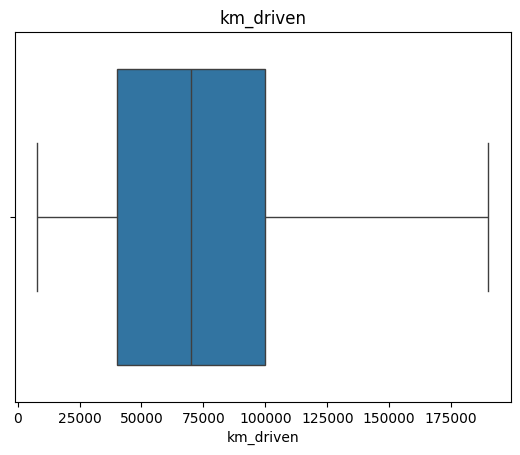

In [267]:
sns.boxplot(x=df['km_driven'])
plt.title('km_driven')
plt.show()

##### Outlier Detection and Removal in `fuel_efficiency`

In [268]:
df.sort_values(by='fuel_efficiency', ascending=False).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
3908,MARUTI ALTO 800 CNG LXI,Maruti,India,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796.0,40.30,4
35,MARUTI ALTO 800 CNG LXI OPTIONAL,Maruti,India,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,4
5815,MARUTI ALTO 800 LXI CNG,Maruti,India,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796.0,47.30,5
2312,MARUTI WAGON R CNG LXI,Maruti,India,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998.0,58.33,5
5789,MARUTI ALTO K10 LXI CNG,Maruti,India,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998.0,58.30,4
866,MARUTI ALTO 800 CNG LXI,Maruti,India,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46,796.0,47.30,5
4004,MARUTI ALTO 800 CNG LXI,Maruti,India,2013,178000,70000,CNG,Individual,Manual,Second Owner,30.46,796.0,47.30,5
5569,MARUTI SWIFT DZIRE VDI,Maruti,India,2017,740000,40000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5
5940,MARUTI SWIFT DZIRE VDI,Maruti,India,2017,755000,20000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5
434,MARUTI SWIFT DZIRE ZDI PLUS,Maruti,India,2017,900000,50000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5


In [269]:
df.sort_values(by='fuel_efficiency', ascending=True).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
644,TATA INDICA VISTA AURA SAFIRE ANNIVERSARY EDITION,Tata,India,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65.00,5
6824,HYUNDAI SANTRO XING GL,Hyundai,South Korea,2011,150000,40000,Petrol,Individual,Manual,Fourth & Above Owner,0.0,1086.0,62.00,5
5276,HYUNDAI SANTRO XING GL,Hyundai,South Korea,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,5
1649,HYUNDAI SANTRO XING GL,Hyundai,South Korea,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,5
2366,HYUNDAI SANTRO XING (NON-AC),Hyundai,South Korea,2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.10,5
5843,VOLKSWAGEN POLO GT TSI BSIV,Volkswagen,Germany,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5
6629,MAHINDRA BOLERO PIK-UP CBC 1.7T,Mahindra,India,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.0,2523.0,70.00,2
785,HYUNDAI SANTRO XING GL,Hyundai,South Korea,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.00,5
5846,VOLKSWAGEN POLO GT TSI BSIV,Volkswagen,Germany,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5
2725,HYUNDAI SANTRO XING (NON-AC),Hyundai,South Korea,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.10,5


The boxplot of `fuel_efficiency` indicates that the values above 31 and values of 0 are suspected outliers. Let's count the number of these observations

In [270]:
fuel_efficiency_zero = df[df['fuel_efficiency'] == 0]
fuel_efficiency_over_31 = df[df['fuel_efficiency'] > 31]

observations = len(fuel_efficiency_zero) + len(fuel_efficiency_over_31)

print(f"Number of observations with fuel_efficiency = 0 or fuel_efficiency > 31: {observations}")

Number of observations with fuel_efficiency = 0 or fuel_efficiency > 31: 16


Given that there are only 16 observations which are suspected outliers based on the box plot, we can drop them from the data.

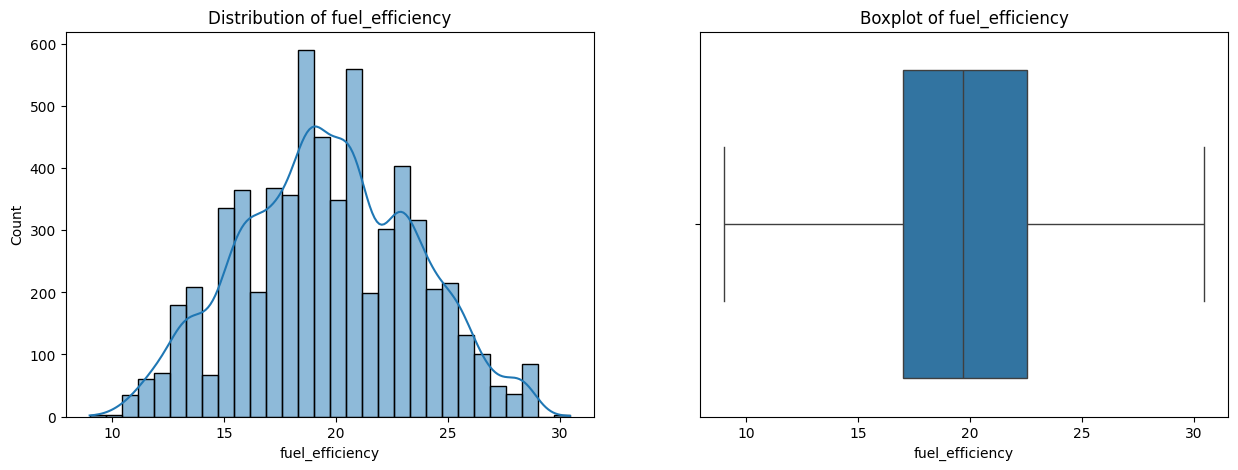

In [271]:
df.drop(fuel_efficiency_zero.index, inplace=True)
df.drop(fuel_efficiency_over_31.index, inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df['fuel_efficiency'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of fuel_efficiency')

sns.boxplot(x=df['fuel_efficiency'], ax=axs[1])
axs[1].set_title('Boxplot of fuel_efficiency')

plt.show()

##### Outlier Detection in `engine`

In [272]:
df.sort_values(by='engine', ascending=False).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
5962,MERCEDES-BENZ E-CLASS E350 PETROL,Mercedes-Benz,Germany,2009,1000000,80000,Petrol,Individual,Automatic,Third Owner,10.93,3498.0,272.0,5
7336,ISUZU MU 7 AT PREMIUM,Isuzu,Japan,2016,1160000,121000,Diesel,Dealer,Automatic,First Owner,12.08,2999.0,161.0,7
628,HONDA ACCORD V6 AT,Honda,Japan,2004,275000,100000,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,218.0,5
2134,HONDA ACCORD V6 AT,Honda,Japan,2005,285000,80000,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,218.0,5
2722,BMW 7 SERIES 730LD,BMW,Germany,2007,750000,60000,Diesel,Individual,Automatic,Second Owner,14.49,2993.0,258.0,5
6597,BMW X5 3.0D,BMW,Germany,2008,830000,60000,Diesel,Individual,Automatic,Third Owner,11.00,2993.0,235.0,5
1816,MERCEDES-BENZ E-CLASS E270 CDI,Mercedes-Benz,Germany,2005,800000,120005,Diesel,Individual,Automatic,Second Owner,11.00,2987.0,198.5,5
5608,TOYOTA FORTUNER 3.0 DIESEL,Toyota,Japan,2010,1200000,100000,Diesel,Individual,Manual,First Owner,11.50,2982.0,171.0,7
5283,TOYOTA FORTUNER 4X2 AT TRD SPORTIVO,Toyota,Japan,2014,1400000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.7,7
2702,TOYOTA FORTUNER 4X2 AT,Toyota,Japan,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.5,7


In [273]:
df.sort_values(by='engine', ascending=True).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
1217,TATA NANO CX,Tata,India,2013,80000,30000,Petrol,Individual,Manual,First Owner,25.4,624.0,37.48,4
1267,TATA NANO CX BSIV,Tata,India,2010,55000,50000,Petrol,Individual,Manual,Third Owner,26.0,624.0,35.00,4
3942,TATA NANO CX BSIII,Tata,India,2012,60000,40000,Petrol,Individual,Manual,Second Owner,25.4,624.0,38.00,4
1425,TATA NANO XTA,Tata,India,2015,250000,20000,Petrol,Individual,Automatic,First Owner,21.9,624.0,37.48,4
709,TATA NANO CX,Tata,India,2011,45000,10000,Petrol,Individual,Manual,Third Owner,26.0,624.0,35.00,4
7616,TATA NANO LX BSIV,Tata,India,2012,70000,50000,Petrol,Individual,Manual,Second Owner,25.4,624.0,37.48,4
7624,TATA NANO CX,Tata,India,2011,70000,80000,Petrol,Individual,Manual,First Owner,26.0,624.0,35.00,4
6817,TATA NANO LX BSIV,Tata,India,2012,60000,90000,Petrol,Individual,Manual,First Owner,25.4,624.0,37.48,4
3709,TATA NANO XE,Tata,India,2017,66000,70000,Petrol,Individual,Manual,Third Owner,23.9,624.0,37.48,4
5216,TATA NANO CX BSIII,Tata,India,2012,60000,45000,Petrol,Individual,Manual,First Owner,25.4,624.0,38.00,4


In [274]:
Q1 = df['engine'].quantile(0.25)
Q3 = df['engine'].quantile(0.75)

engine_low_outliers = df[df['engine'] < Q1]
engine_high_outliers = df[df['engine'] > Q3]

total_outliers = len(engine_low_outliers) + len(engine_high_outliers)

outliers_proportion = total_outliers / len(df)

print(f"Proportion of outliers in engine: {outliers_proportion*100:.4f}%")

Proportion of outliers in engine: 44.3429%


Given that nearly 50% of the data are outliers under the *engine* variable and all the values seems to be natural, we will NOT remove these outliers. Instead, we will transform the said variable using the logarithmic transformation to reduce the effects of the extreme values, as well as, to reduce the skewness of the distribution.

##### Outlier Detection and Handling in `max_power`

In [275]:
df.sort_values(by='max_power', ascending=False).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
5962,MERCEDES-BENZ E-CLASS E350 PETROL,Mercedes-Benz,Germany,2009,1000000,80000,Petrol,Individual,Automatic,Third Owner,10.93,3498.0,272.0,5
2722,BMW 7 SERIES 730LD,BMW,Germany,2007,750000,60000,Diesel,Individual,Automatic,Second Owner,14.49,2993.0,258.0,5
5152,AUDI Q7 3.0 TDI QUATTRO,Audi,Germany,2009,1025000,120000,Diesel,Individual,Automatic,Third Owner,12.07,2967.0,241.4,7
3321,AUDI Q7 3.0 TDI QUATTRO,Audi,Germany,2009,810000,98000,Diesel,Individual,Automatic,Fourth & Above Owner,12.07,2967.0,241.4,7
6597,BMW X5 3.0D,BMW,Germany,2008,830000,60000,Diesel,Individual,Automatic,Third Owner,11.00,2993.0,235.0,5
2134,HONDA ACCORD V6 AT,Honda,Japan,2005,285000,80000,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,218.0,5
4880,BMW 5 SERIES 525D,BMW,Germany,2010,1000000,60000,Diesel,Individual,Automatic,First Owner,16.73,1995.0,218.0,5
628,HONDA ACCORD V6 AT,Honda,Japan,2004,275000,100000,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,218.0,5
4692,MERCEDES-BENZ E-CLASS E 250 ELEGANCE,Mercedes-Benz,Germany,2010,1200000,35000,Petrol,Individual,Automatic,Second Owner,10.93,2497.0,204.0,5
5400,MERCEDES-BENZ NEW C-CLASS C 250 CDI ELEGANCE,Mercedes-Benz,Germany,2011,1000000,90000,Diesel,Dealer,Automatic,First Owner,14.94,2143.0,204.0,5


In [276]:
df.sort_values(by='max_power', ascending=True).head(10)

,name,brand,origin,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,max_power,seats
1442,MARUTI SWIFT DZIRE VDI OPTIONAL,Maruti,India,2017,589000,41232,Diesel,Dealer,Manual,First Owner,26.59,1248.0,0.0,5
2549,TATA INDICA VISTA QUADRAJET LS,Tata,India,2012,240000,70000,Diesel,Individual,Manual,First Owner,22.30,1248.0,0.0,5
575,MARUTI ALTO K10 LXI,Maruti,India,2011,204999,97500,Petrol,Individual,Manual,First Owner,20.92,998.0,0.0,5
6007,MARUTI OMNI LPG CARGO BSIII W IMMOBILISER,Maruti,India,2007,54000,144000,LPG,Individual,Manual,Second Owner,10.90,796.0,32.8,5
3466,MARUTI OMNI LPG CARGO BSIII W IMMOBILISER,Maruti,India,2010,120000,170000,LPG,Individual,Manual,Second Owner,10.90,796.0,32.8,5
3468,MARUTI OMNI E 8 STR STD,Maruti,India,2010,120000,170000,Petrol,Individual,Manual,Second Owner,16.80,796.0,34.0,8
6354,MARUTI OMNI E 8 STR STD,Maruti,India,2009,120000,120000,Petrol,Individual,Manual,First Owner,16.80,796.0,34.0,8
1921,MARUTI OMNI E 8 STR STD,Maruti,India,2011,190000,70000,Petrol,Individual,Manual,Third Owner,16.80,796.0,34.0,8
7730,MARUTI OMNI E 8 STR STD,Maruti,India,2008,125000,70000,Petrol,Individual,Manual,Fourth & Above Owner,16.80,796.0,34.0,8
2291,MARUTI OMNI E 8 STR STD,Maruti,India,2005,120000,100000,Petrol,Individual,Manual,Second Owner,16.80,796.0,34.0,8


Having a Braking Horsepower (BHP) or `max_power` of 0 is impossible since the lowest BHP of a car is 5 BHP (see https://www.encycarpedia.com/top/least-powerful-cars), so we will drop these observations from the data. Other than that, all the values seems natural. The observations with high-valued BHP makes sense since those are high-performance premium cars. Hence, we will NOT remove these extreme values but instead make use of logarithmic transformation on `max_power` to reduce the skewness of the distribution and to reduce the effects of the outliers on the overall analysis.

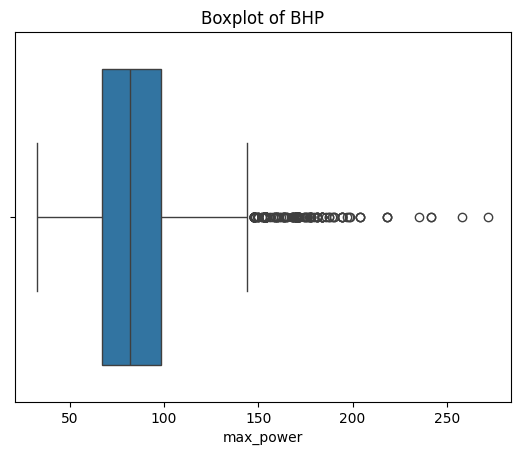

In [277]:
df.drop(df[df['max_power'] == 0].index, inplace=True)

sns.boxplot(x=df['max_power'])
plt.title('Boxplot of BHP')
plt.show()

##### Logarithmic Transformation (for Skewed Data)

Given how there does not exist negative datapoints, we are free to apply a logarithmic transformation on the relevant columns.

In [278]:
print(f"Original dataset size: {df.shape[0]}")

Original dataset size: 6237


In [279]:
import numpy as np

df['log_selling_price'] = df['selling_price'].apply(lambda x: np.log10(x))
df['log_km_driven'] = df['km_driven'].apply(lambda x: np.log10(x))
df['log_engine'] = df['engine'].apply(lambda x: np.log10(x))
df['log_max_power'] = df['max_power'].apply(lambda x: np.log10(x))

df = df[['name', 'brand', 'origin', 'year', 'selling_price', 'log_selling_price', 'km_driven',
       'log_km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'fuel_efficiency', 'engine', 'log_engine',
       'max_power', 'log_max_power', 'seats']]

df.head()

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
0,MARUTI SWIFT DZIRE VDI,Maruti,India,2014,450000,5.653213,145500,5.162863,Diesel,Individual,Manual,First Owner,23.40,1248.0,3.096215,74.00,1.869232,5
1,SKODA RAPID 1.5 TDI AMBITION,Skoda,Czech Republic,2014,370000,5.568202,120000,5.079181,Diesel,Individual,Manual,Second Owner,21.14,1498.0,3.175512,103.52,2.015024,5
2,HONDA CITY 2017-2020 EXI,Honda,Japan,2006,158000,5.198657,140000,5.146128,Petrol,Individual,Manual,Third Owner,17.70,1497.0,3.175222,78.00,1.892095,5
3,HYUNDAI I20 SPORTZ DIESEL,Hyundai,South Korea,2010,225000,5.352183,127000,5.103804,Diesel,Individual,Manual,First Owner,23.00,1396.0,3.144885,90.00,1.954243,5
4,MARUTI SWIFT VXI BSIII,Maruti,India,2007,130000,5.113943,120000,5.079181,Petrol,Individual,Manual,First Owner,16.10,1298.0,3.113275,88.20,1.945469,5


##### Plotting Histogram and Boxplot after Log Transformation

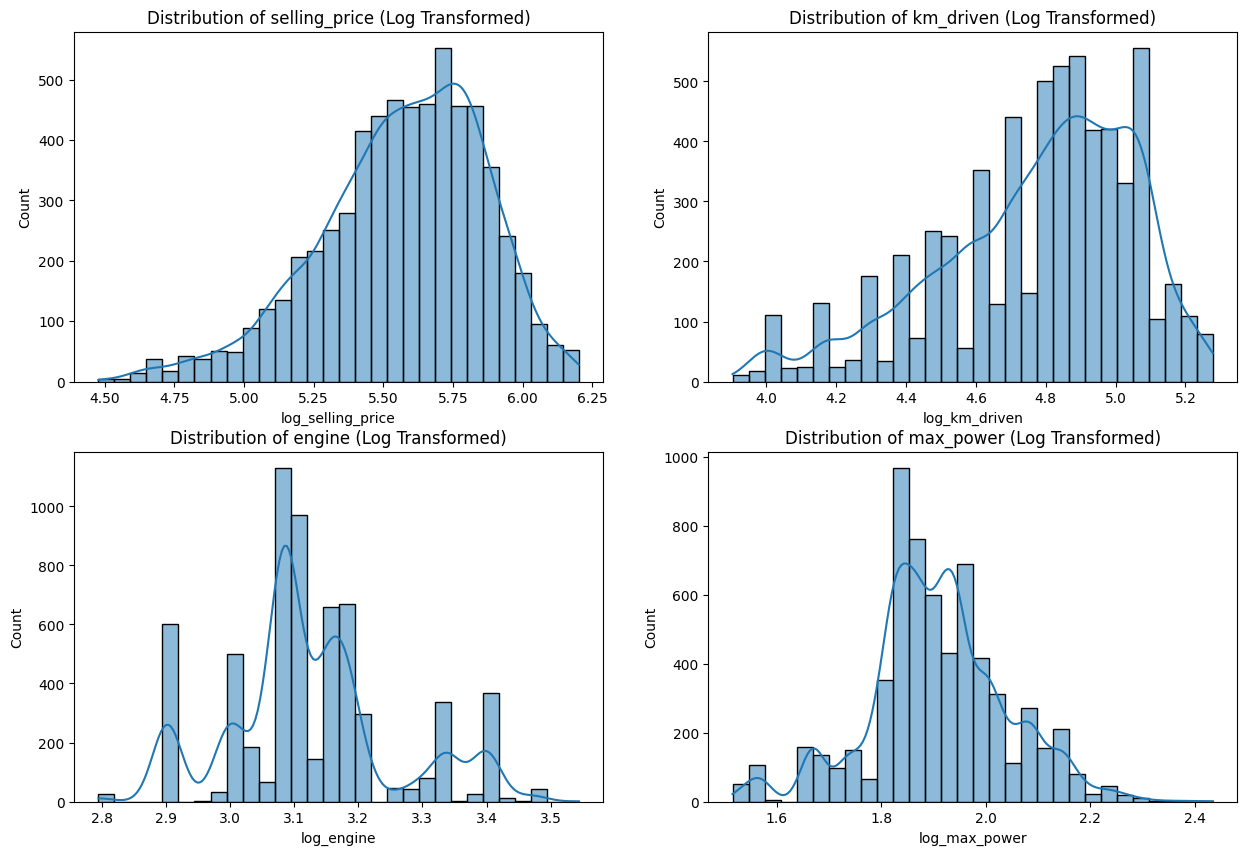

In [280]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
i = 0
j = 0

for col in ['selling_price', 'km_driven', 'engine', 'max_power']:
    sns.histplot(df[f'log_{col}'], bins=30, kde=True, ax=axs[i, j])
    axs[i, j].set_title(f'Distribution of {col} (Log Transformed)')
    j += 1
    if j == 2:
        j = 0
        i += 1

plt.show()

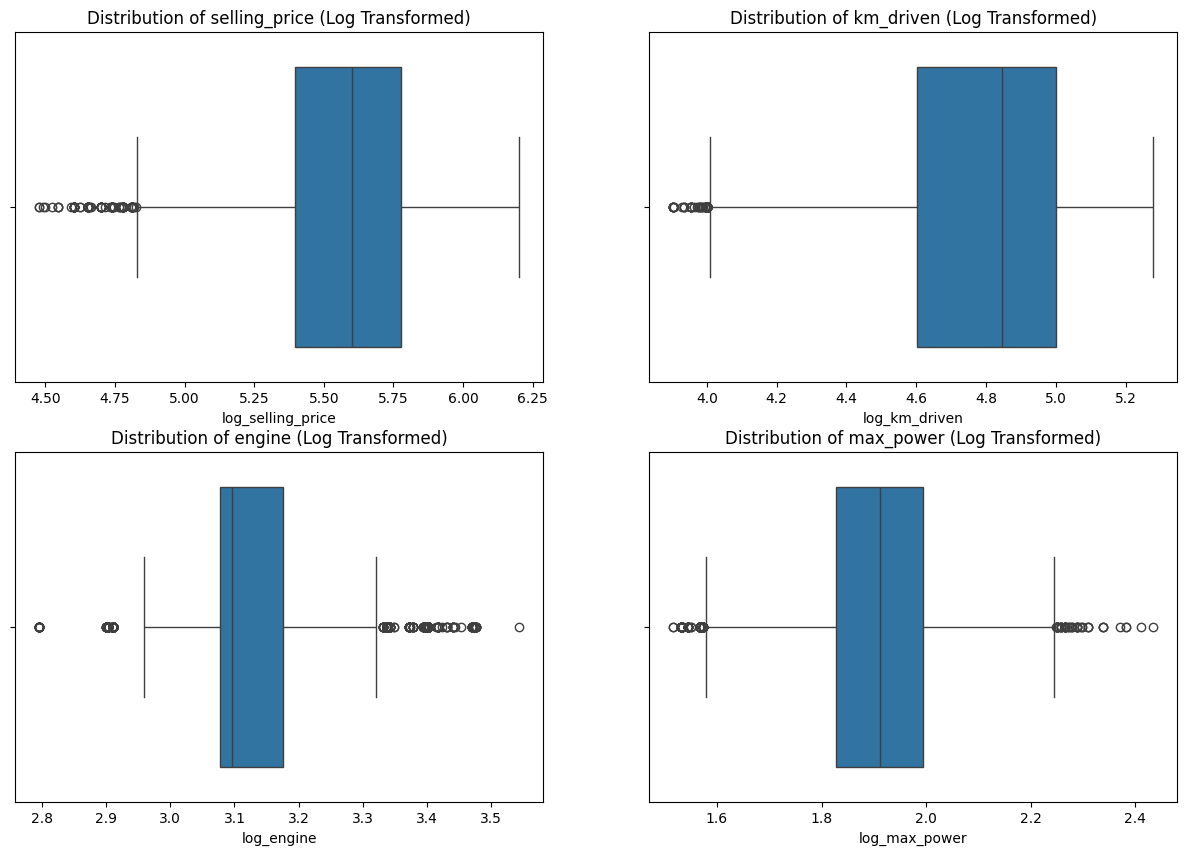

In [281]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
i = 0
j = 0

for col in ['selling_price', 'km_driven', 'engine', 'max_power']:
    sns.boxplot(x=df[f'log_{col}'], ax=axs[i, j])
    axs[i, j].set_title(f'Distribution of {col} (Log Transformed)')
    j += 1
    if j == 2:
        j = 0
        i += 1

plt.show()

In summary, we have checked for outliers through graphs and numbers using our collective domain knowledge, we have tried to remove anomalies while being careful on making the dataset biased. Since most of them are not normally distributed, log transformation was implemented to normalize the data.

### Categorical Features

We move on to the categorical values by first looking at them individually.

#### Variable `brand`

In [282]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Mercedes-Benz',
       'Mitsubishi', 'Volkswagen', 'Nissan', 'BMW', 'Daewoo', 'Kia',
       'Fiat', 'Audi', 'Force', 'Jeep', 'Volvo', 'Ambassador', 'Opel',
       'Isuzu'], dtype=object)

In [283]:
df['brand'].value_counts()

brand
Maruti           2055
Hyundai          1151
Mahindra          667
Tata              602
Honda             338
Ford              332
Toyota            235
Chevrolet         207
Renault           195
Volkswagen        162
Nissan             72
Skoda              60
Datsun             50
Fiat               38
BMW                17
Mercedes-Benz      17
Jeep                9
Mitsubishi          7
Audi                6
Force               4
Ambassador          4
Daewoo              3
Kia                 2
Isuzu               2
Volvo               1
Opel                1
Name: count, dtype: int64

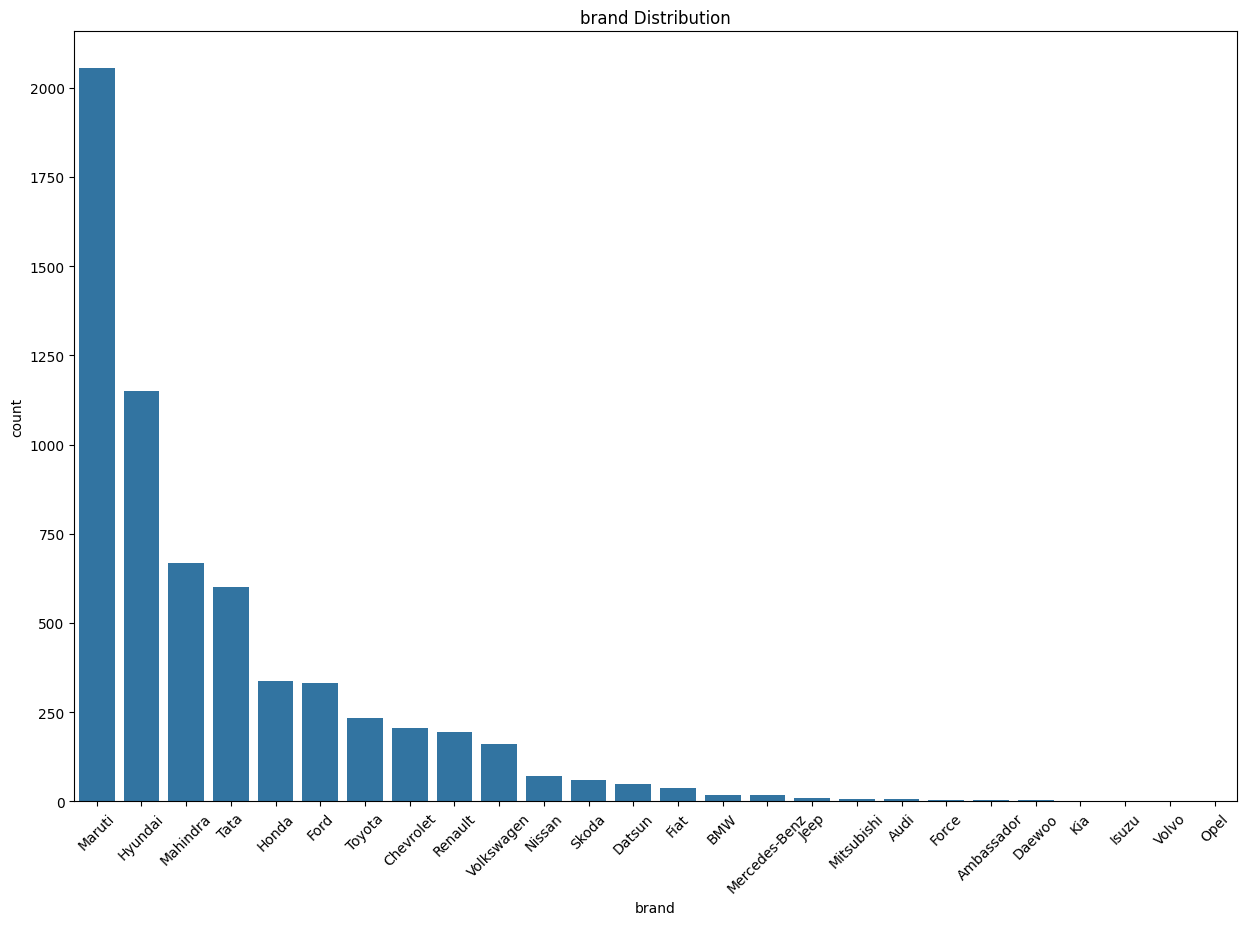

In [284]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x=df['brand'].value_counts().index, y=df['brand'].value_counts())

plt.xticks(rotation=45)
plt.title('brand Distribution')
plt.show()

#### Variable `origin`

In [285]:
df['origin'].unique()

array(['India', 'Czech Republic', 'Japan', 'South Korea', 'United States',
       'France', 'Germany', 'Italy', 'Sweden'], dtype=object)

In [286]:
df['origin'].value_counts()

origin
India             3332
South Korea       1156
Japan              704
United States      548
Germany            203
France             195
Czech Republic      60
Italy               38
Sweden               1
Name: count, dtype: int64

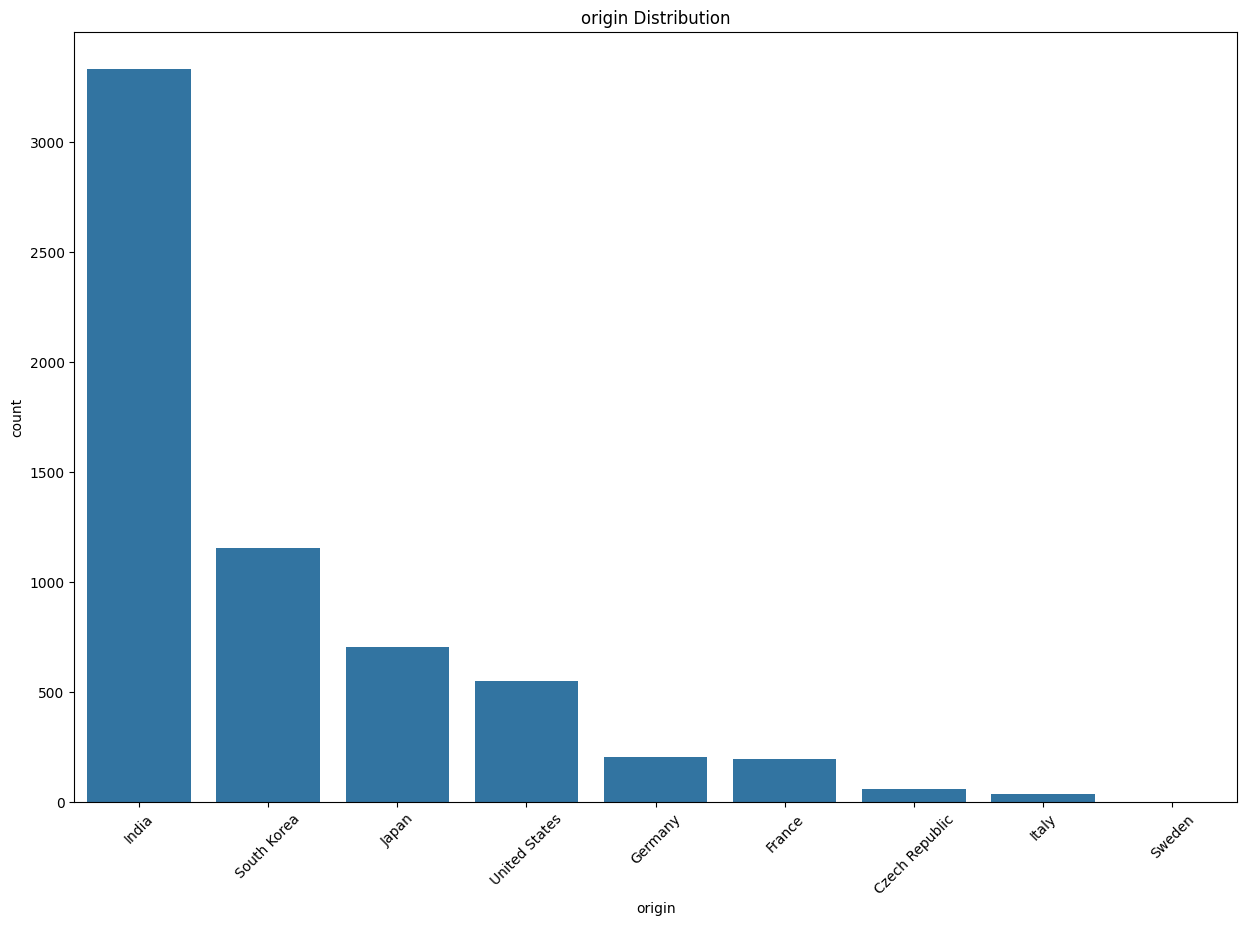

In [287]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x=df['origin'].value_counts().index, y=df['origin'].value_counts())

plt.xticks(rotation=45)
plt.title('origin Distribution')
plt.show()

#### Variable `year`

In [288]:
df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2011, 2013, 2005, 2009, 2016, 2012,
       2002, 2015, 2018, 2019, 2008, 2020, 1999, 2000, 2003, 2004, 2001,
       1994, 1998, 1997, 1995, 1996])

In [289]:
df['year'].value_counts()

year
2017    749
2015    656
2016    643
2012    567
2014    554
2013    535
2018    530
2011    506
2010    347
2019    239
2009    219
2008    188
2007    160
2006     98
2005     66
2004     46
2003     35
2020     29
2002     18
2000     12
1999     12
1997      9
1998      9
2001      5
1994      2
1996      2
1995      1
Name: count, dtype: int64

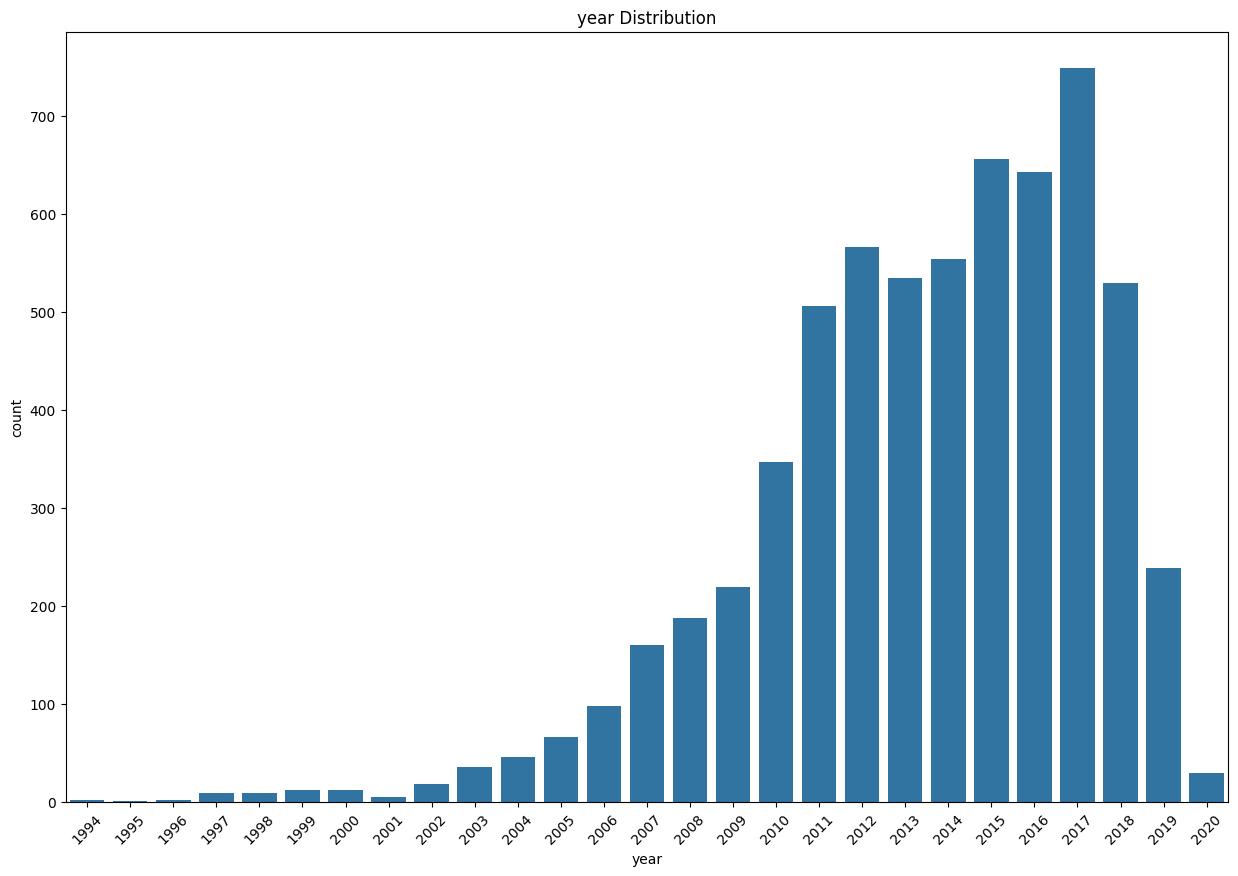

In [290]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x=df['year'].value_counts().index, y=df['year'].value_counts())

plt.xticks(rotation=45)
plt.title('year Distribution')
plt.show()

#### Variable `fuel`

In [291]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [292]:
fuel_counts = df['fuel'].value_counts()
display(fuel_counts)

fuel
Diesel    3358
Petrol    2802
CNG         43
LPG         34
Name: count, dtype: int64

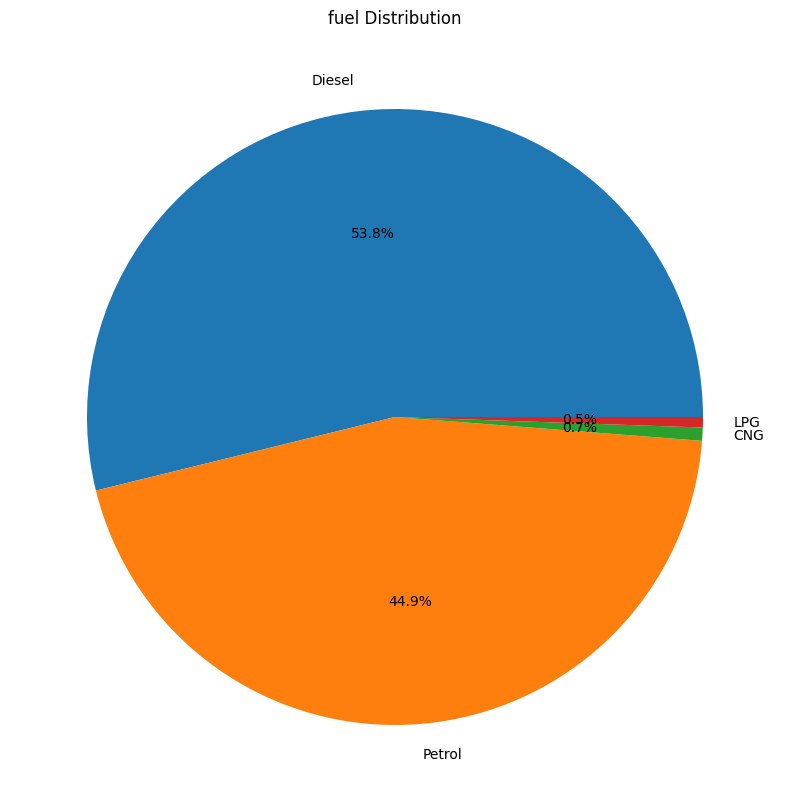

In [293]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.color_palette("Set2")
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('fuel Distribution')
plt.show()

#### Variable `seller_type`

In [294]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [295]:
seller_type_counts = df['seller_type'].value_counts()
display(seller_type_counts)

seller_type
Individual          5667
Dealer               551
Trustmark Dealer      19
Name: count, dtype: int64

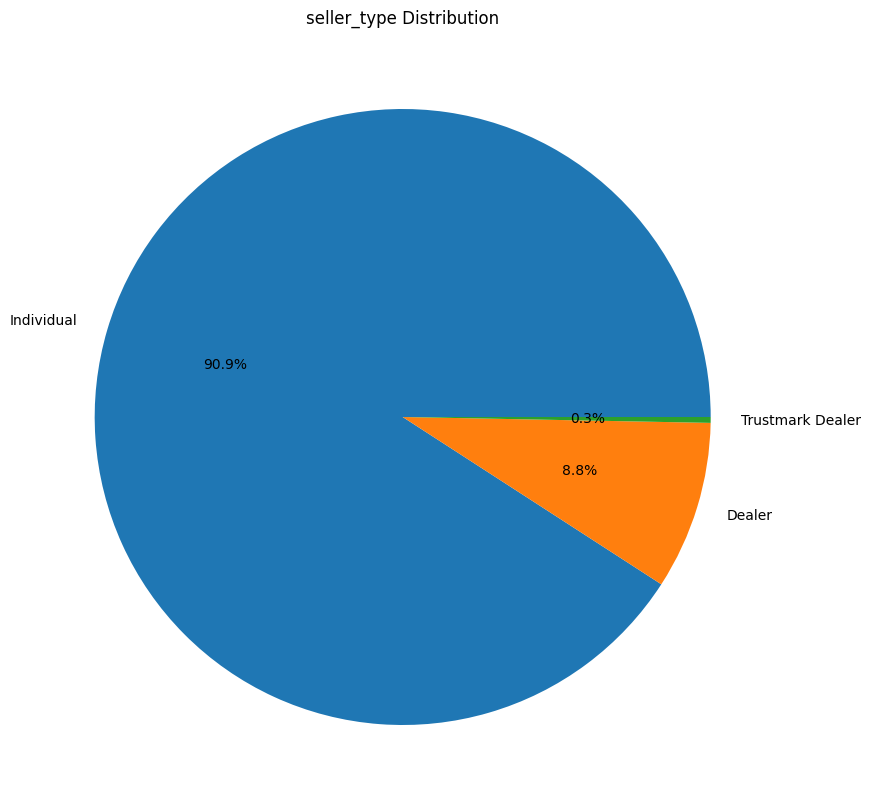

In [296]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.color_palette("Set2")
plt.pie(seller_type_counts, labels=seller_type_counts.index, autopct='%1.1f%%')
plt.title('seller_type Distribution')
plt.show()

#### Variable `transmission`

In [297]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [298]:
transmission_counts = df['transmission'].value_counts()
display(transmission_counts)

transmission
Manual       5856
Automatic     381
Name: count, dtype: int64

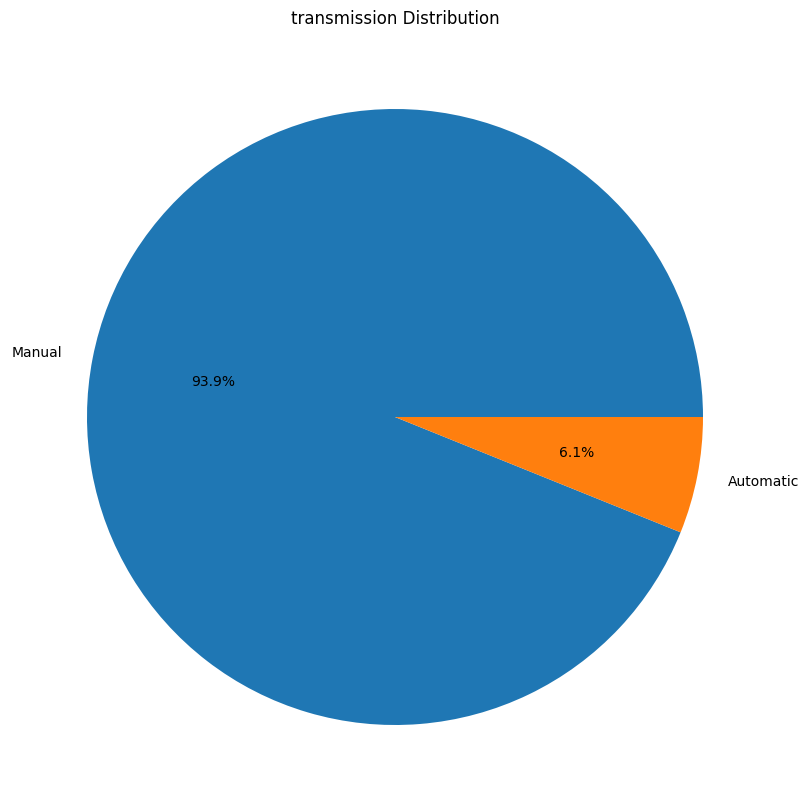

In [299]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.color_palette("Set2")
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('transmission Distribution')
plt.show()

#### Variable `owner`

In [300]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [301]:
owner_counts = df['owner'].value_counts()
display(owner_counts)

owner
First Owner             3803
Second Owner            1806
Third Owner              481
Fourth & Above Owner     147
Name: count, dtype: int64

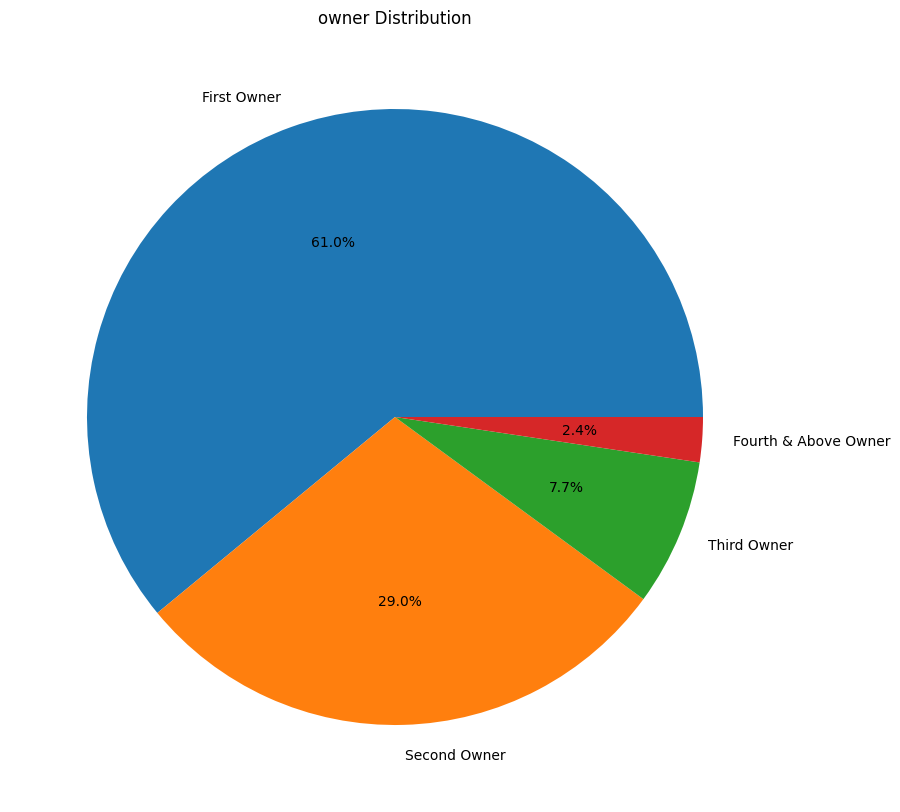

In [302]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.color_palette("Set2")
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%')
plt.title('owner Distribution')
plt.show()

#### Variable `seats`

In [303]:
df['seats'].unique()

array([ 5,  7,  8,  4,  6,  9, 10, 14])

In [304]:
df['seats'].value_counts()

seats
5     4966
7      832
8      190
4      113
9       67
6       54
10      14
14       1
Name: count, dtype: int64

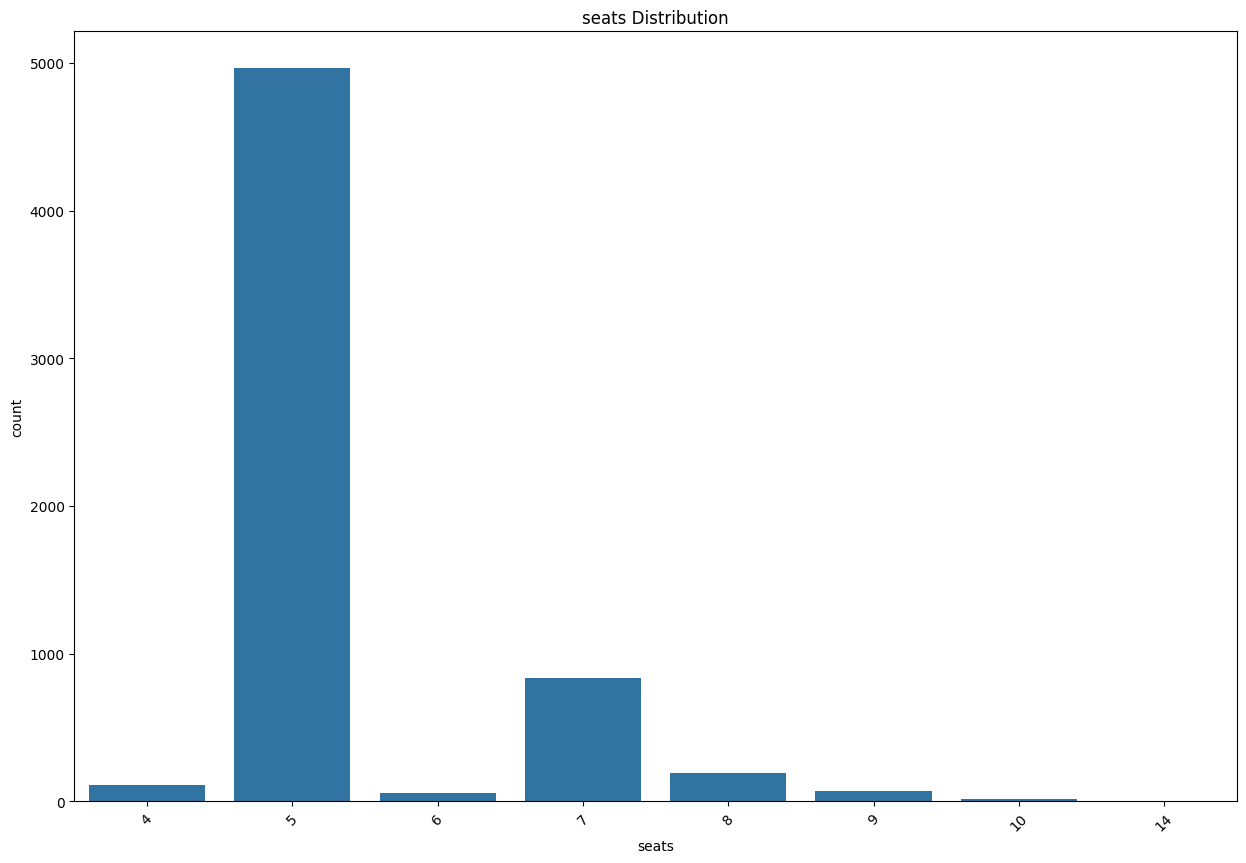

In [305]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x=df['seats'].value_counts().index, y=df['seats'].value_counts())

plt.xticks(rotation=45)
plt.title('seats Distribution')
plt.show()

From those graphs and aggregations, there are seemingly no questionable values in these variables

### Tests for Normality
Let us determine whether certain columns have data that are normally distributed.

In [306]:
from scipy.stats import shapiro

def check_normality(df, column):
    stat, p = shapiro(df[column])
    print(p)
    if p > 0.05:
        print("Data is normally distributed")
    else:
        print("Data is not normally distributed")

In [307]:
columns = ['log_selling_price', 'log_km_driven', 'fuel_efficiency', 'log_engine', 'log_max_power']
for col in columns:
    print(f"Column: {col}")
    check_normality(df, col)
    print()

Column: log_selling_price
1.2401304125821325e-30
Data is not normally distributed

Column: log_km_driven
1.1121106289909423e-41
Data is not normally distributed

Column: fuel_efficiency
4.251457746368908e-16
Data is not normally distributed

Column: log_engine
1.3349602551132976e-44
Data is not normally distributed

Column: log_max_power
2.9652620472033905e-26
Data is not normally distributed



C:\Users\remus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:592: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6237.
  res = hypotest_fun_out(*samples, **kwds)


Apparently, none of them are normally distributed.

Let us now inspect how the resale prices are distributed by `transmission` type.

C:\Users\remus\AppData\Local\Temp\ipykernel_5316\1156370728.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['transmission'] == 'Manual']['selling_price'], label='Manual', shade=True)
C:\Users\remus\AppData\Local\Temp\ipykernel_5316\1156370728.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['transmission'] == 'Automatic']['selling_price'], label='Automatic', shade=True)


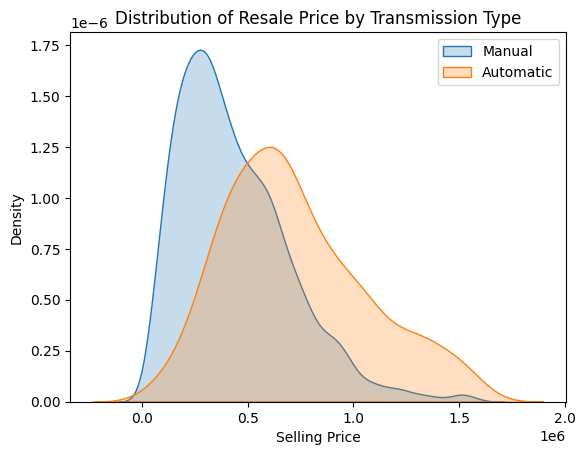

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df[df['transmission'] == 'Manual']['selling_price'], label='Manual', shade=True)

sns.kdeplot(df[df['transmission'] == 'Automatic']['selling_price'], label='Automatic', shade=True)

plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.title('Distribution of Resale Price by Transmission Type')
plt.legend()
plt.show()

### Multivariate Analysis

#### Fuel Efficiency: Diesel vs. Petrol

Let us compare the fuel efficiency between diesel-powered vehicles and petrol-powered vehicles.


In [309]:
diesel_df = df[df['fuel'] == 'Diesel']
petrol_df = df[df['fuel'] == 'Petrol']

diesel_df.shape[0], petrol_df.shape[0]

(3358, 2802)

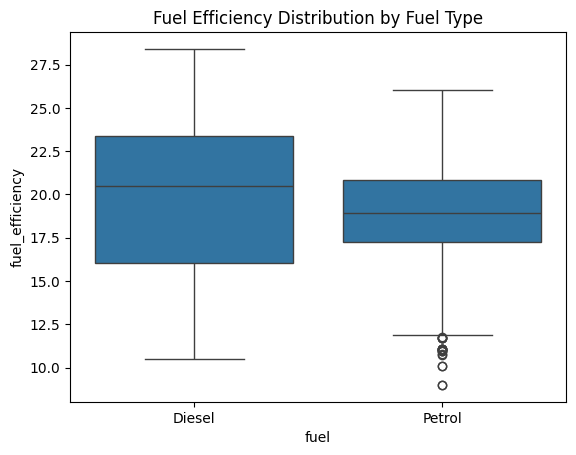

In [310]:
df_diesel_and_petrol = df['fuel'][(df['fuel'] == 'Diesel') | (df['fuel'] == 'Petrol')]
sns.boxplot(x=df_diesel_and_petrol, y=df['fuel_efficiency'])

plt.title('Fuel Efficiency Distribution by Fuel Type')
plt.show()

In [311]:
diesel_df_median = round(diesel_df['fuel_efficiency'].median(), 2)
petrol_df_median = round(petrol_df['fuel_efficiency'].median(), 2)

print(f"Median Fuel Efficiency of Diesel Cars: {diesel_df_median}")
print(f"Median Fuel Efficiency of Petrol Cars: {petrol_df_median}")

Median Fuel Efficiency of Diesel Cars: 20.5
Median Fuel Efficiency of Petrol Cars: 18.9


The difference between the two box plots are not significant enough for us to conclude which is more efficient. The petrol boxplot is more compressed than diesel.

#### Outliers among the Petrol-Powered Cars?

There appear to be outliers amongst the cars that use Petrol. Let us take a look at them.

In [312]:
petrol_Q3 = petrol_df['fuel_efficiency'].quantile(0.75)
petrol_Q1 = petrol_df['fuel_efficiency'].quantile(0.25)
petrol_IQR = petrol_Q3 - petrol_Q1

petrol_lower_bound = petrol_Q1 - 1.5 * petrol_IQR

petrol_lower_outliers = petrol_df[petrol_df['fuel_efficiency'] < petrol_lower_bound]
petrol_lower_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
149,BMW 5 SERIES 523I,BMW,Germany,2010,975000,5.989005,72200,4.858537,Petrol,Dealer,Automatic,Second Owner,10.80,2497.0,3.397419,150.0,2.176091,5
391,HONDA CR-V 2.4L 4WD AT,Honda,Japan,2009,500000,5.698970,120000,5.079181,Petrol,Individual,Automatic,Second Owner,11.10,2354.0,3.371806,158.8,2.200850,5
628,HONDA ACCORD V6 AT,Honda,Japan,2004,275000,5.439333,100000,5.000000,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,3.476687,218.0,2.338456,5
716,HONDA CR-V 2.4 4WD AT,Honda,Japan,2007,325000,5.511883,70000,4.845098,Petrol,Individual,Automatic,Second Owner,10.10,2354.0,3.371806,152.0,2.181844,5
1299,HONDA ACCORD 2.4 AT,Honda,Japan,2009,400000,5.602060,100000,5.000000,Petrol,Individual,Automatic,Second Owner,11.70,2354.0,3.371806,177.6,2.249443,5
1853,NISSAN TEANA XL,Nissan,Japan,2014,600000,5.778151,80000,4.903090,Petrol,Individual,Automatic,Second Owner,11.07,2496.0,3.397245,179.5,2.254064,5
2134,HONDA ACCORD V6 AT,Honda,Japan,2005,285000,5.454845,80000,4.903090,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,3.476687,218.0,2.338456,5
2622,TOYOTA INNOVA CRYSTA 2.7 GX AT 8 STR,Toyota,Japan,2020,1500000,6.176091,40000,4.602060,Petrol,Individual,Automatic,First Owner,10.75,2694.0,3.430398,163.7,2.214049,8
3107,MERCEDES-BENZ NEW C-CLASS C 200 KOMPRESSOR ELE...,Mercedes-Benz,Germany,2007,400000,5.602060,42000,4.623249,Petrol,Dealer,Automatic,First Owner,11.74,1796.0,3.254306,186.0,2.269513,5
3461,MERCEDES-BENZ E-CLASS E 250 ELEGANCE,Mercedes-Benz,Germany,2011,1190000,6.075547,80000,4.903090,Petrol,Individual,Automatic,Second Owner,10.93,2497.0,3.397419,204.0,2.309630,5


Notice that most of the cars listed here are 4WDs (four-wheel drives, also called "4x4"). They are actually rather notable for their poor fuel efficiency. Many of these vehicles are also large; such a size would be a detriment to their fuel efficiency capabilities. Thus, there is no real reason to remove them as they are naturally occuring within the car market.  

#### Transmission Type: Manual vs Automatic

Let us compare the fuel efficiency between manual-type cars and automatic-type.

In [313]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

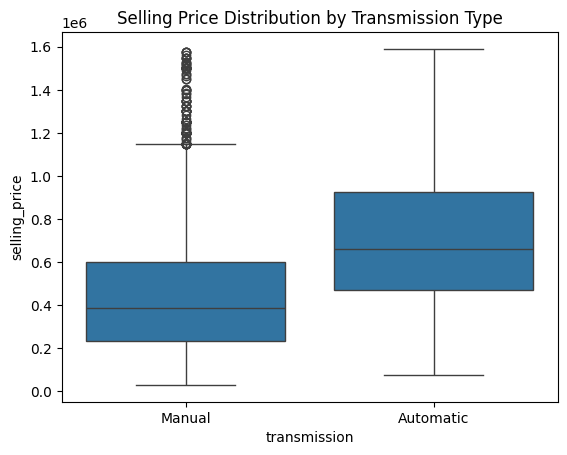

In [314]:
df_manual_automatic = df['transmission'][(df['transmission'] == 'Manual') | (df['transmission'] == 'Automatic')]
sns.boxplot(x=df_manual_automatic, y=df['selling_price'])

plt.title('Selling Price Distribution by Transmission Type')
plt.show()

Looking at the interquartile range, it looks like cars with automatic transmission are more expensive.


#### Outliers among the Manual Cars?

In [315]:
manual_df = df[df['transmission'] == 'Manual']

In [316]:
manual_Q3 = manual_df['selling_price'].quantile(0.75)
manual_Q1 = manual_df['selling_price'].quantile(0.25)
manual_IQR = manual_Q3 - manual_Q1

manual_upper_bound = manual_Q3 + 1.5 * manual_IQR

manual_upper_outliers =  manual_df[manual_df['selling_price'] >  manual_upper_bound]

manual_upper_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
47,TOYOTA FORTUNER 4X4 MT,Toyota,Japan,2014,1500000,6.176091,77000,4.886491,Diesel,Dealer,Manual,First Owner,12.55,2982.0,3.474508,168.50,2.226600,7
80,TOYOTA INNOVA 2.5 VX (DIESEL) 8 SEATER,Toyota,Japan,2016,1200000,6.079181,140000,5.146128,Diesel,Individual,Manual,First Owner,12.99,2494.0,3.396896,100.60,2.002598,8
212,TATA HEXA XE,Tata,India,2019,1250000,6.096910,15000,4.176091,Diesel,Individual,Manual,First Owner,17.60,2179.0,3.338257,147.94,2.170086,7
258,MAHINDRA MARAZZO M6 8STR,Mahindra,India,2019,1300000,6.113943,40000,4.602060,Diesel,Individual,Manual,First Owner,17.30,1497.0,3.175222,121.00,2.082785,8
265,TOYOTA FORTUNER 3.0 DIESEL,Toyota,Japan,2011,1150000,6.060698,181000,5.257679,Diesel,Individual,Manual,Second Owner,11.50,2982.0,3.474508,171.00,2.232996,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,HYUNDAI VERNA CRDI 1.6 SX OPTION,Hyundai,South Korea,2018,1200000,6.079181,40000,4.602060,Diesel,Individual,Manual,First Owner,22.00,1582.0,3.199206,126.20,2.101059,5
7949,TOYOTA INNOVA 2.5 ZX DIESEL 7 SEATER BSIII,Toyota,Japan,2015,1400000,6.146128,170000,5.230449,Diesel,Individual,Manual,First Owner,12.99,2494.0,3.396896,100.60,2.002598,7
7951,HYUNDAI CRETA 1.6 SX,Hyundai,South Korea,2018,1220000,6.086360,11000,4.041393,Petrol,Individual,Manual,First Owner,15.80,1591.0,3.201670,121.30,2.083861,5
7963,RENAULT CAPTUR 1.5 DIESEL RXT,Renault,France,2018,1265000,6.102091,12000,4.079181,Diesel,Individual,Manual,First Owner,20.37,1461.0,3.164650,108.45,2.035230,5


Looking at the most expensive car in the dataframe above, its price in [Carwale](https://www.carwale.com/toyota-cars/fortuner/4x4-mt-28-diesel/) is priced approximately 4000000, which is more than twice the price in this dataset. This is not an anomaly since cars are known to depreciate overtime. Referring back to the selling price EDA in the univariate section, dropping them in inadvisable since these prices are not wrongly encoded.

#### Owners

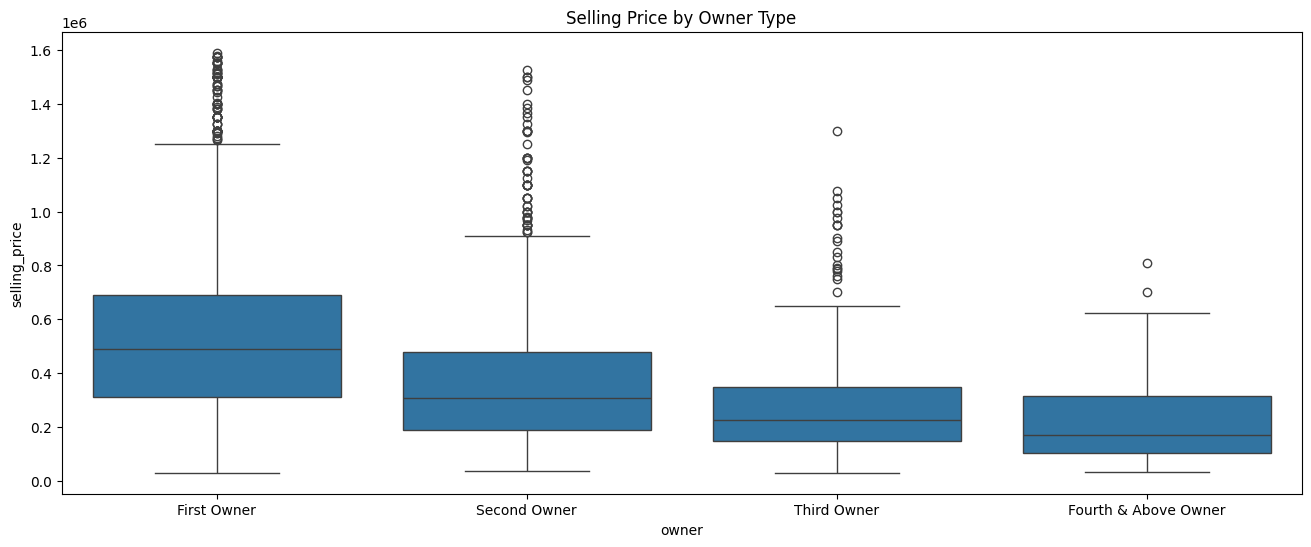

In [317]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=df['owner'], y=df['selling_price'], ax=ax)

plt.title('Selling Price by Owner Type')

plt.show()


This is expected since as the onwership gets passed to another, the selling price should depreciate.

#### Seller Type

In [318]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

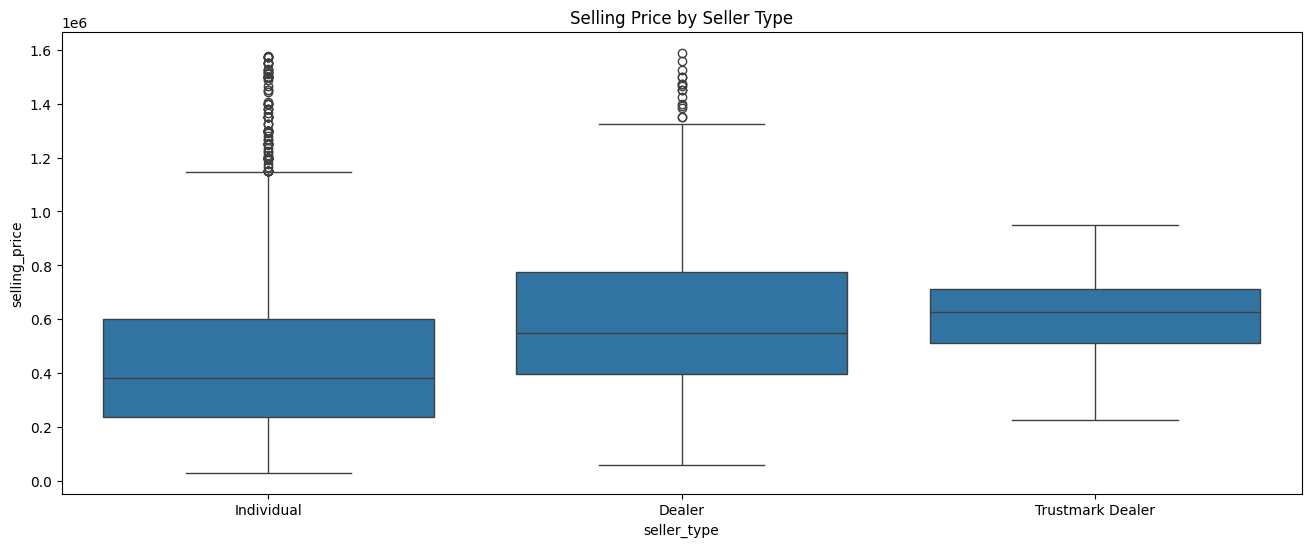

In [319]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=df['seller_type'], y=df['selling_price'], ax=ax)

plt.title('Selling Price by Seller Type')

plt.show()


#### Brand vs. Price

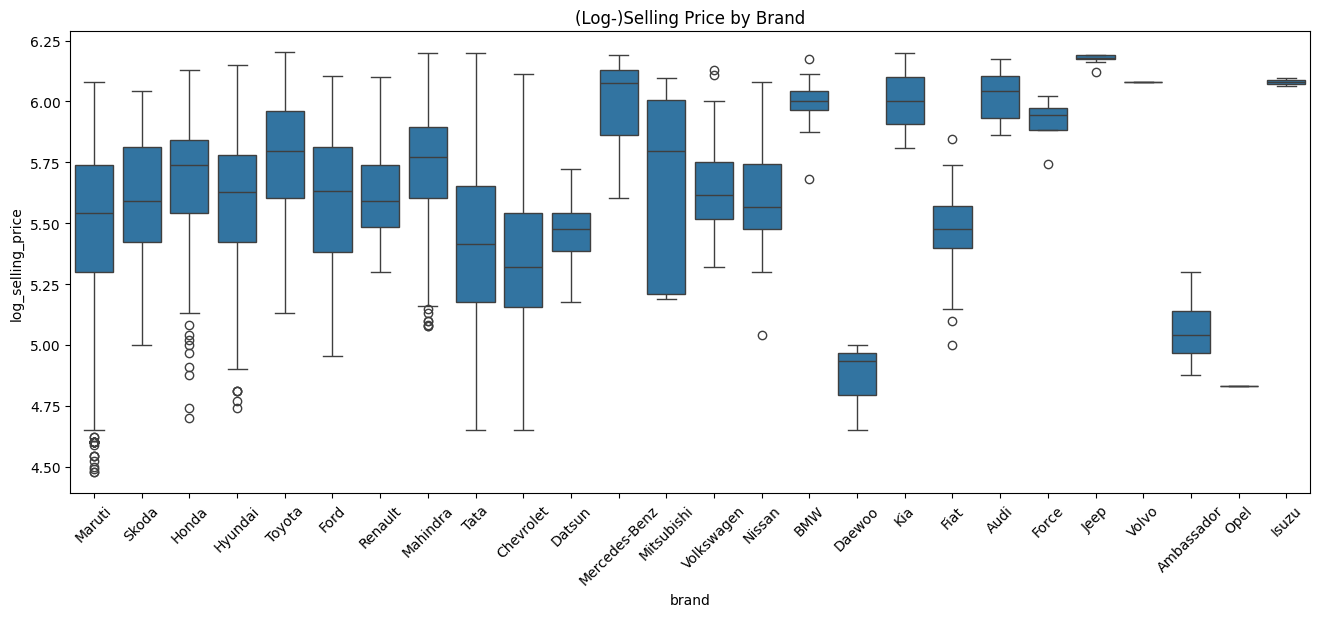

In [320]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=df['brand'], y=df['log_selling_price'], ax=ax)

plt.title('(Log-)Selling Price by Brand')

plt.xticks(rotation=45)

plt.show()


#### Country vs. Price
Let us see if country of origin may have some effect on or relationship with prices.

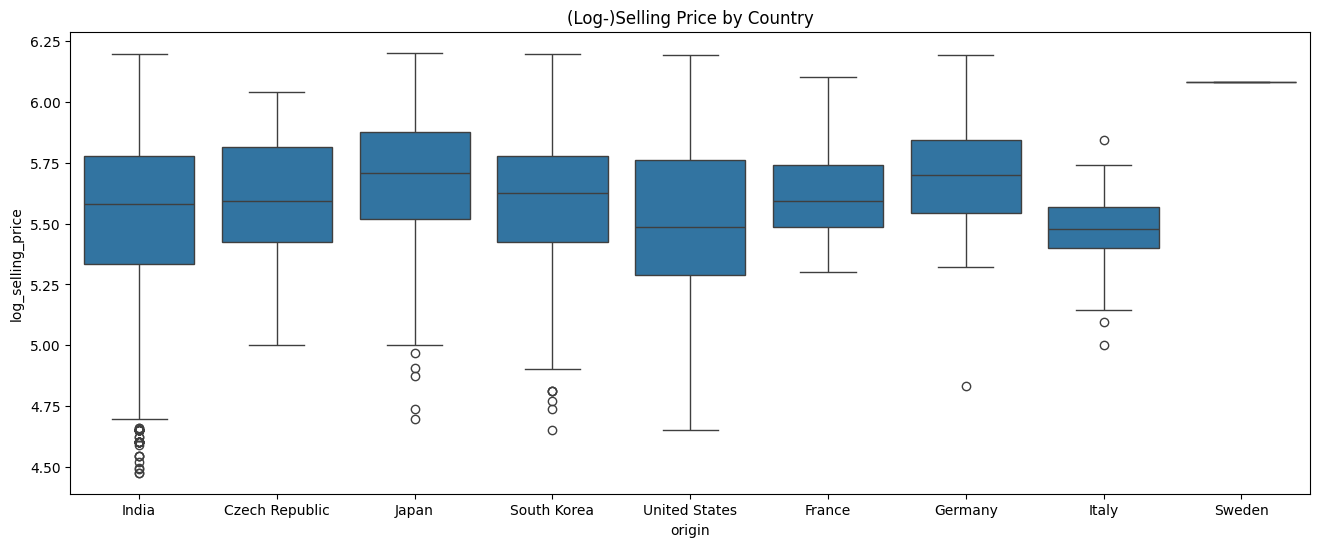

In [321]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=df['origin'], y=df['log_selling_price'], ax=ax)

plt.title('(Log-)Selling Price by Country')
plt.show()

##### Cars of India
Let us take a look at the outliers present amongst the cars from India.

In [322]:
india_df = df[df['origin'] == 'India']

india_Q3 = india_df['log_selling_price'].quantile(0.75)
india_Q1 = india_df['log_selling_price'].quantile(0.25)
india_IQR = india_Q3 - india_Q1

india_lower_bound = india_Q1 - 1.5 * india_IQR

india_lower_outliers = india_df[india_df['log_selling_price'] < india_lower_bound]
india_lower_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
177,MARUTI 800 STD,Maruti,India,1999,40000,4.602060,40000,4.602060,Petrol,Individual,Manual,Second Owner,16.1,796.0,2.900913,37.0,1.568202,4
206,MARUTI OMNI E 8 STR STD,Maruti,India,2003,40000,4.602060,90000,4.954243,Petrol,Individual,Manual,Second Owner,16.8,796.0,2.900913,34.0,1.531479,8
709,TATA NANO CX,Tata,India,2011,45000,4.653213,10000,4.000000,Petrol,Individual,Manual,Third Owner,26.0,624.0,2.795185,35.0,1.544068,4
901,MARUTI 800 STD,Maruti,India,2002,40000,4.602060,80000,4.903090,Petrol,Individual,Manual,Third Owner,16.1,796.0,2.900913,37.0,1.568202,4
1252,MARUTI 800 STD BSII,Maruti,India,2003,35000,4.544068,35000,4.544068,Petrol,Individual,Manual,Second Owner,16.1,796.0,2.900913,37.0,1.568202,4
1474,MARUTI 800 AC,Maruti,India,1994,45000,4.653213,60000,4.778151,Petrol,Individual,Manual,First Owner,16.1,796.0,2.900913,37.0,1.568202,4
1502,MARUTI 800 STD BSII,Maruti,India,2004,45000,4.653213,77000,4.886491,Petrol,Individual,Manual,Third Owner,16.1,796.0,2.900913,37.0,1.568202,4
1775,MARUTI 800 AC,Maruti,India,2000,45000,4.653213,50000,4.698970,Petrol,Individual,Manual,Second Owner,16.1,796.0,2.900913,37.0,1.568202,4
1852,MARUTI 800 STD MPFI,Maruti,India,2003,45000,4.653213,35000,4.544068,Petrol,Individual,Manual,Fourth & Above Owner,16.1,796.0,2.900913,37.0,1.568202,4
1926,MARUTI 800 STD,Maruti,India,2004,31504,4.498366,110000,5.041393,Petrol,Individual,Manual,Third Owner,16.1,796.0,2.900913,37.0,1.568202,4


Notice that many of these cars are old models in addition to being second-hand. Those characteristics naturally really decrease the value of the vehicles.

##### Cars of Japan

Let us first take a look at the lower outliers of Japanese cars.

In [323]:
japan_df = df[df['origin'] == 'Japan']

japan_Q3 = japan_df['log_selling_price'].quantile(0.75)
japan_Q1 = japan_df['log_selling_price'].quantile(0.25)
japan_IQR = japan_Q3 - japan_Q1

japan_lower_bound = japan_Q1 - 1.5 * japan_IQR

japan_lower_outliers = japan_df[japan_df['log_selling_price'] < japan_lower_bound]
japan_lower_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
1265,HONDA CITY 1.5 EXI,Honda,Japan,2002,81000,4.908485,161000,5.206826,Petrol,Individual,Manual,Fourth & Above Owner,13.0,1493.0,3.174060,100.0,2.000000,5
1456,HONDA CITY 2017-2020 GXI,Honda,Japan,2006,93150,4.969183,80000,4.903090,Petrol,Individual,Manual,Second Owner,17.7,1497.0,3.175222,78.0,1.892095,5
4875,HONDA CITY 1.3 EXI,Honda,Japan,2004,50000,4.698970,62000,4.792392,Petrol,Individual,Manual,Second Owner,13.0,1343.0,3.128076,90.0,1.954243,5
5007,HONDA CITY 1.3 EXI,Honda,Japan,2005,55000,4.740363,130000,5.113943,Petrol,Individual,Manual,First Owner,13.0,1343.0,3.128076,90.0,1.954243,5
6417,HONDA CITY 1.5 EXI,Honda,Japan,2005,75000,4.875061,120000,5.079181,Petrol,Individual,Manual,First Owner,13.0,1493.0,3.174060,100.0,2.000000,5


These are vehicles are of an old mass-produced/economical model. It is only inevitable that the value of these vehicles would be this low.

##### Cars of South Korea

In [324]:
skorea_df = df[df['origin'] == 'South Korea']

skorea_Q3 = skorea_df['log_selling_price'].quantile(0.75)
skorea_Q1 = skorea_df['log_selling_price'].quantile(0.25)
skorea_IQR = skorea_Q3 - skorea_Q1

skorea_lower_bound = skorea_Q1 - 1.5 * skorea_IQR

skorea_lower_outliers = skorea_df[skorea_df['log_selling_price'] < skorea_lower_bound]
skorea_lower_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
195,HYUNDAI GETZ GLS,Hyundai,South Korea,2005,65000,4.812913,86000,4.934498,Petrol,Individual,Manual,First Owner,15.3,1341.0,3.127429,83.0,1.919078,5
975,HYUNDAI GETZ GLS,Hyundai,South Korea,2005,65000,4.812913,85000,4.929419,Petrol,Individual,Manual,First Owner,15.3,1341.0,3.127429,83.0,1.919078,5
3494,HYUNDAI ACCENT GLS,Hyundai,South Korea,2002,55000,4.740363,120000,5.079181,Petrol,Individual,Manual,Fourth & Above Owner,13.2,1495.0,3.174641,94.0,1.973128,5
4033,DAEWOO MATIZ SD,Daewoo,South Korea,2001,45000,4.653213,137000,5.136721,Petrol,Individual,Manual,First Owner,18.5,796.0,2.900913,53.0,1.724276,5
5804,HYUNDAI ACCENT GLE,Hyundai,South Korea,2003,59000,4.770852,70000,4.845098,Petrol,Individual,Manual,Second Owner,13.2,1495.0,3.174641,94.0,1.973128,5
7161,HYUNDAI GETZ 1.1 GLE,Hyundai,South Korea,2007,65000,4.812913,70000,4.845098,Petrol,Individual,Manual,Third Owner,15.0,1086.0,3.035830,66.6,1.823474,5


For reasons similar to what we saw amongst Indian cars, these "outliers" must be naturally occurring.

##### Cars of Germany

In [325]:
germany_df = df[df['origin'] == 'Germany']

germany_Q3 = germany_df['log_selling_price'].quantile(0.75)
germany_Q1 = germany_df['log_selling_price'].quantile(0.25)
germany_IQR = germany_Q3 - germany_Q1

germany_lower_bound = germany_Q1 - 1.5 * germany_IQR

germany_lower_outliers = germany_df[germany_df['log_selling_price'] < germany_lower_bound]
germany_lower_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
4372,OPEL ASTRA 1.6,Opel,Germany,1998,68000,4.832509,110000,5.041393,Petrol,Individual,Manual,Third Owner,13.1,1598.0,3.203577,77.0,1.886491,5


With a model this old, it is not surprising that its price had significantly depreciated and went far below the median.

##### Cars of Italy

In [326]:
italy_df = df[df['origin'] == 'Italy']

italy_Q3 = italy_df['log_selling_price'].quantile(0.75)
italy_Q1 = italy_df['log_selling_price'].quantile(0.25)
italy_IQR = italy_Q3 - italy_Q1

italy_lower_bound = italy_Q1 - 1.5 * italy_IQR

italy_lower_outliers = italy_df[italy_df['log_selling_price'] < italy_lower_bound]
italy_lower_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
4481,FIAT PUNTO 1.2 ACTIVE,Fiat,Italy,2009,100000,5.00000,100000,5.00000,Petrol,Individual,Manual,Second Owner,15.7,1172.0,3.068928,67.0,1.826075,5
8091,FIAT LINEA EMOTION,Fiat,Italy,2010,125000,5.09691,40000,4.60206,Petrol,Individual,Manual,Second Owner,16.0,1368.0,3.136086,90.0,1.954243,5


In [327]:
italy_df = df[df['origin'] == 'Italy']

italy_upper_bound = italy_Q3 + 1.5 * italy_IQR

italy_upper_outliers = italy_df[italy_df['log_selling_price'] > italy_upper_bound]
italy_upper_outliers

,name,brand,origin,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel,seller_type,transmission,owner,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
1682,FIAT LINEA 1.3 MULTIJET EMOTION,Fiat,Italy,2015,700000,5.845098,20000,4.30103,Diesel,Individual,Manual,First Owner,20.4,1248.0,3.096215,91.7,1.962369,5


#### Country vs. Fuel Efficiency

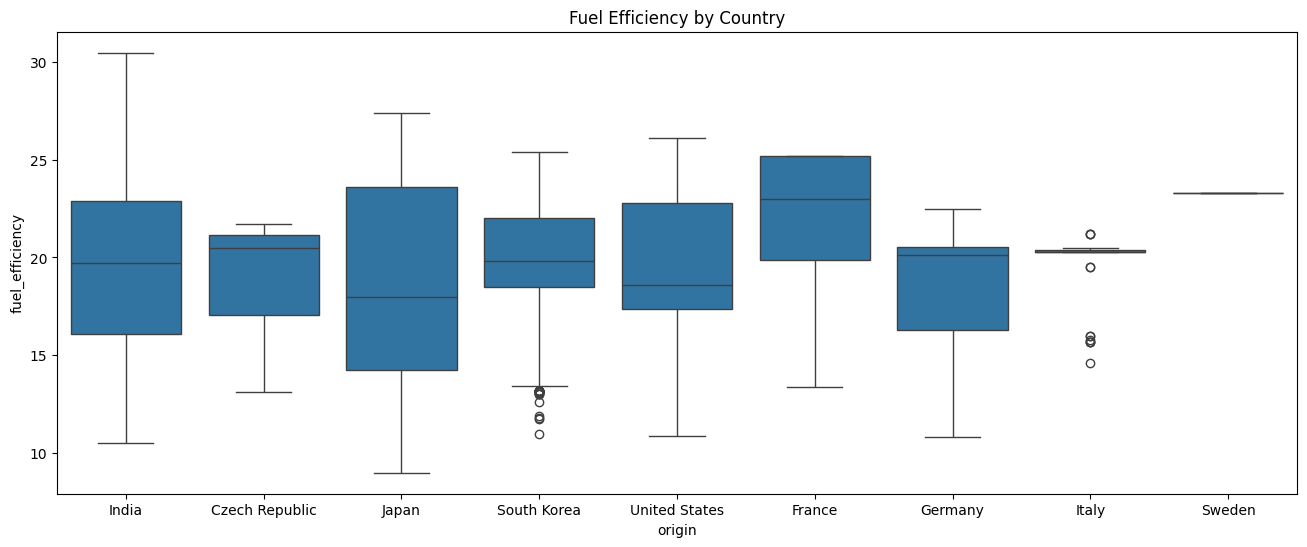

In [328]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=df['origin'], y=df['fuel_efficiency'], ax=ax)

plt.title('Fuel Efficiency by Country')
plt.show()

## 2.2. Standardization of the Variables

In [329]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 8125
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               6237 non-null   object 
 1   brand              6237 non-null   object 
 2   origin             6237 non-null   object 
 3   year               6237 non-null   int64  
 4   selling_price      6237 non-null   int64  
 5   log_selling_price  6237 non-null   float64
 6   km_driven          6237 non-null   int64  
 7   log_km_driven      6237 non-null   float64
 8   fuel               6237 non-null   object 
 9   seller_type        6237 non-null   object 
 10  transmission       6237 non-null   object 
 11  owner              6237 non-null   object 
 12  fuel_efficiency    6237 non-null   float64
 13  engine             6237 non-null   float64
 14  log_engine         6237 non-null   float64
 15  max_power          6237 non-null   float64
 16  log_max_power      6237 non-n

In [331]:
scaler = StandardScaler()

In [332]:
df_stand = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), columns=df.select_dtypes(include=['number']).columns)
df_stand

,year,selling_price,log_selling_price,km_driven,log_km_driven,fuel_efficiency,engine,log_engine,max_power,log_max_power,seats
0,0.145310,-0.012481,0.288731,1.911119,1.362414,0.977695,-0.315097,-0.205690,-0.394891,-0.283386,-0.423418
1,0.145310,-0.300141,0.002996,1.253269,1.068490,0.390034,0.233767,0.402519,0.705385,0.812717,-0.423418
2,-1.935744,-1.062437,-1.239102,1.769230,1.303634,-0.504459,0.231572,0.400294,-0.245802,-0.111498,-0.423418
3,-0.895217,-0.821523,-0.723079,1.433855,1.154974,0.873684,0.009830,0.167614,0.201464,0.355745,-0.423418
4,-1.675613,-1.163118,-1.523839,1.253269,1.068490,-0.920502,-0.205324,-0.074840,0.134374,0.289781,-0.423418
...,...,...,...,...,...,...,...,...,...,...,...
6232,-0.114822,-0.695672,-0.512029,-0.552594,-0.266965,-0.192426,-0.863962,-0.950324,-0.652070,-0.602981,-0.423418
6233,0.145310,0.077412,0.367655,0.221347,0.449987,0.754072,0.009830,0.167614,0.154129,0.309342,-0.423418
6234,-0.114822,-0.479927,-0.208931,0.995289,0.935761,-0.296437,-0.427066,-0.344674,-0.065032,0.085464,-0.423418
6235,-1.675613,-1.145139,-1.468748,1.227471,1.055725,-0.738483,0.222790,0.391382,0.946909,1.010961,-0.423418


### Check if the variables scaled

Column: `year`

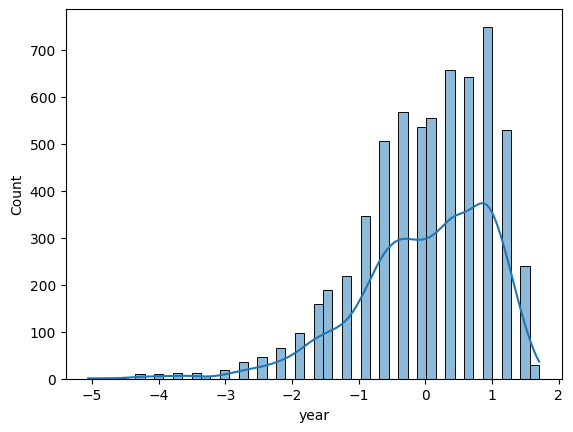

In [333]:
sns.histplot(df_stand['year'], kde=True)
plt.show()

Column: `selling_price`

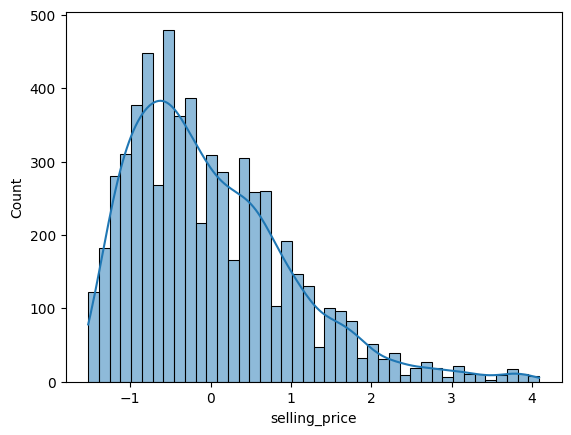

In [334]:
sns.histplot(df_stand['selling_price'], kde=True)
plt.show()

Column: `log_selling_price`

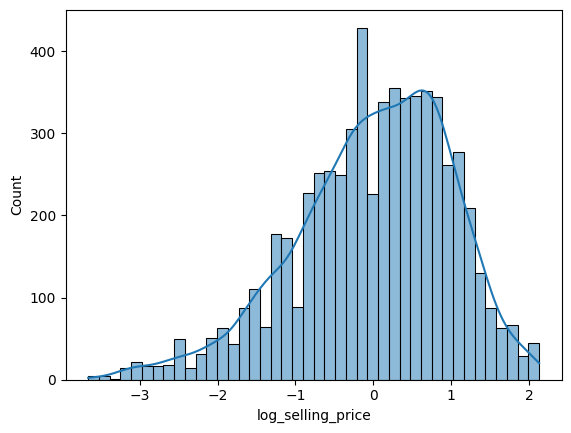

In [335]:
sns.histplot(df_stand['log_selling_price'], kde=True)
plt.show()

Column: `km_driven`

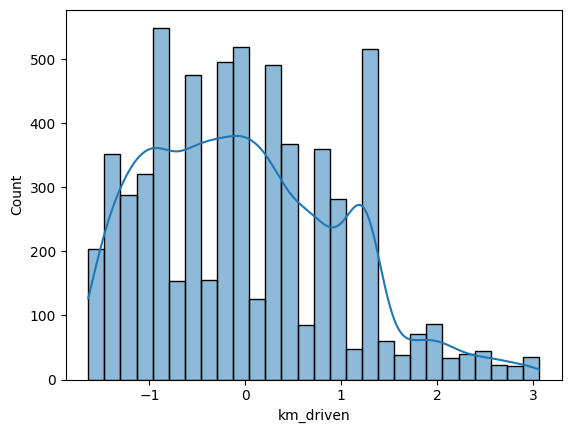

In [336]:
sns.histplot(df_stand['km_driven'], kde=True)
plt.show()

Column: `log_km_driven`

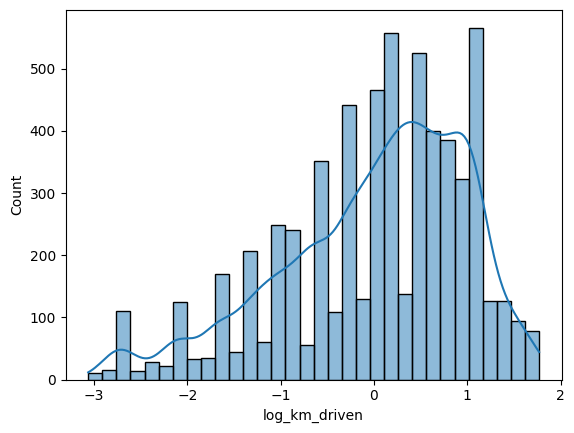

In [337]:
sns.histplot(df_stand['log_km_driven'], kde=True)
plt.show()

Column: `fuel_efficiency`



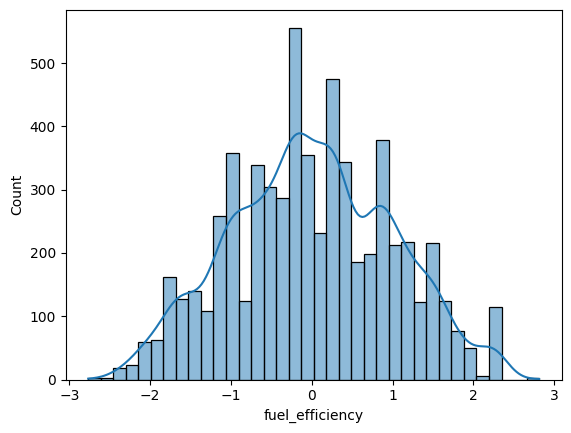

In [338]:
sns.histplot(df_stand['fuel_efficiency'], kde=True)
plt.show()

Column: `engine`

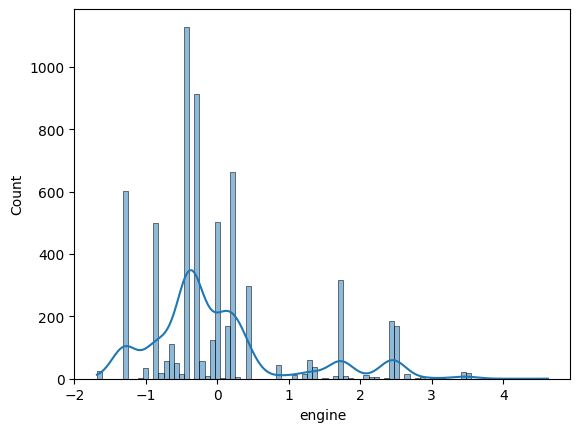

In [339]:
sns.histplot(df_stand['engine'], kde=True)
plt.show()

Column: `log_engine`

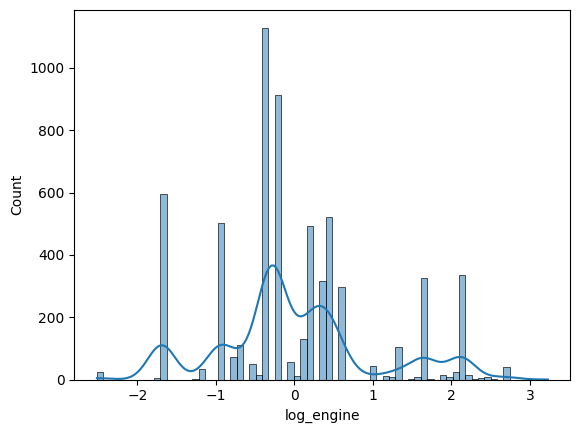

In [340]:
sns.histplot(df_stand['log_engine'], kde=True)
plt.show()

Column: `max_power `

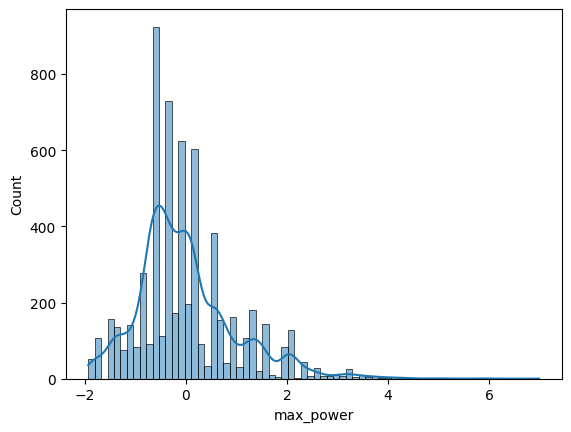

In [341]:
sns.histplot(df_stand['max_power'], kde=True)
plt.show()

Column: `log_max_power`

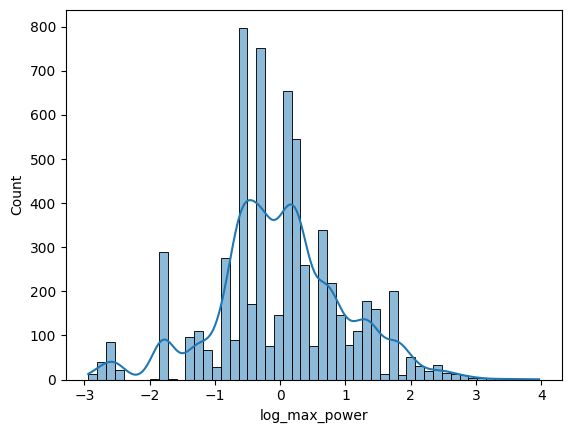

In [342]:
sns.histplot(df_stand['log_max_power'], kde=True)
plt.show()

Column: `seats`

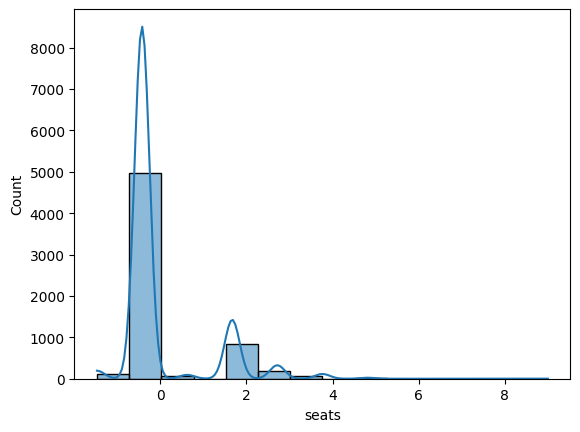

In [343]:
sns.histplot(df_stand['seats'], kde=True)
plt.show()

## 2.3. Research Questions and EDA proper



1. Are there notable relationships among the features?
2. What is the distribution of fuel efficiency across different fuel types?
3. Does fuel efficiency differ across different transmission types?
4. What is the distribution of max power across different origins   



### EDA Question 1. What are the notable relationships among the features?

To answer this question, the most straightforward way is through a correlation matrix.

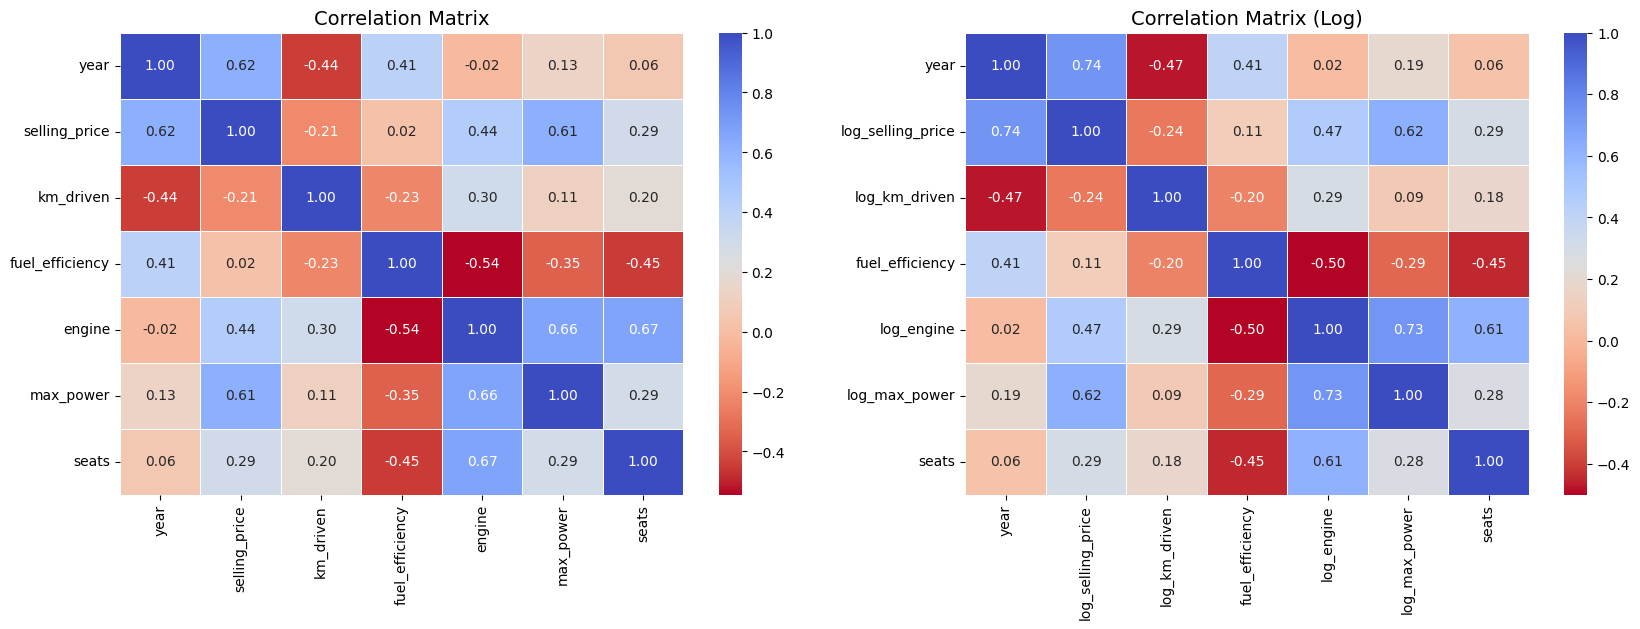

In [344]:
numeric_df = df.select_dtypes(include=['number']).drop(['log_selling_price', 'log_km_driven', 'log_engine', 'log_max_power'], axis=1)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)

numeric_df = df.select_dtypes(include=['number']).drop(['selling_price', 'km_driven', 'engine', 'max_power'], axis=1)
corr_matrix = numeric_df.corr()
plt.subplot(1,2,2)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Log)", fontsize=14)

plt.show()

Some notable observations in the correlation:

1. `selling_price` and `year`: "weak" positive correlation.
- Interpretation: the resale value of cars increases as the manufacturing year gets more recent.

2. `selling_price` and `engine`: "weak" positive correlation.
- Interpretation: the resale value of cars tends to be higher as the engine (cc) is larger.

3. `selling_price` and `max_power`: "strong" positive correlation.
- Intepretation: the resale value of cars gets expensive as the Brake Horsepower (BHP) increases at an acceptable limit. We may think of BHP as the max horsepower of the engine but it factors friction.  

4. `fuel_efficiency` and `engine`: "strong" negative correlation.
- Interpretation: Cars with large engines tend to have lower fuel efficiency or consume more fuel at a given distance. This is expected because the larger the engine's cubic capacity, the more the amount of air and fuel that can be pushed through the engine's cylinders.

5. `engine` and `max_power`: "strong" positive correlation.
- Interpretation: Cars with large engines tend to have a higher max BHP.

6. `engine` and `seats`:"strong" positive correlation.
- Interpretation: Cars with more seats tend to have a larger engine in order to compensate for the extra load that the car is expected to carry. This can be connected to #5 since cars that will carry more load will need a more powerful engine.

### EDA Question 2. What is the distribution of fuel efficiency across different transmission types?

To answer this, we use a boxplot.

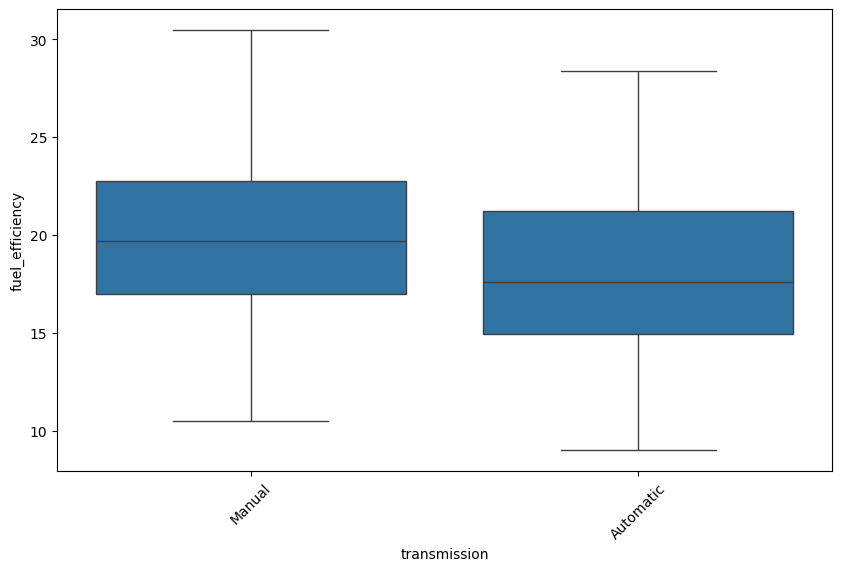

In [345]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['transmission'], y=df['fuel_efficiency'])
plt.xticks(rotation=45)
plt.show()

From the boxplot above, both manual and automatic transmission types seem to have a tight IQR. They also both appear to be very symmetrical. At a glance, it looks like manual transmission is slightly better since it has a higher box. However, we must take the proportion into consideration:

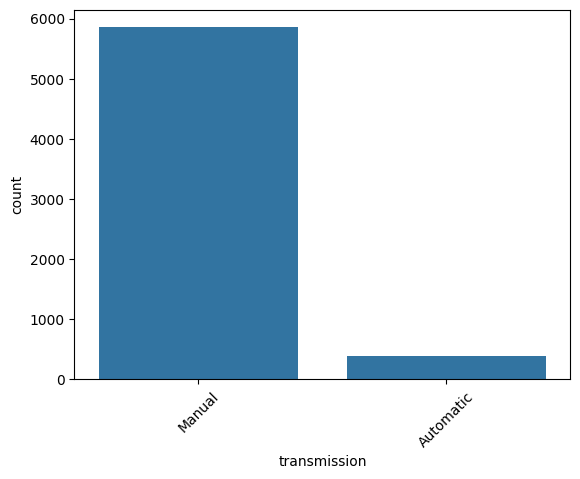

In [346]:
transmission_counts = df['transmission'].value_counts().reset_index()
transmission_counts.columns = ['transmission', 'count']

sns.barplot(x=transmission_counts['transmission'], y=transmission_counts['count'])
plt.xticks(rotation=45)
plt.show()

The classes are drastically imbalanced, in particular, manuals far outnumber automatics. This means that we have to be careful with our analysis since the comparatively small sample size for automatics could mean that it doesn't represent the true population of automatics as well as the manuals in our sample. We must take this into consideration when we perform statistical testing.

### EDA Question 3. Does fuel efficiency differ across different fuel types?

To answer this, we use a boxplot, but before we proceed any further, we once again need to take the following class imbalances into consideration:

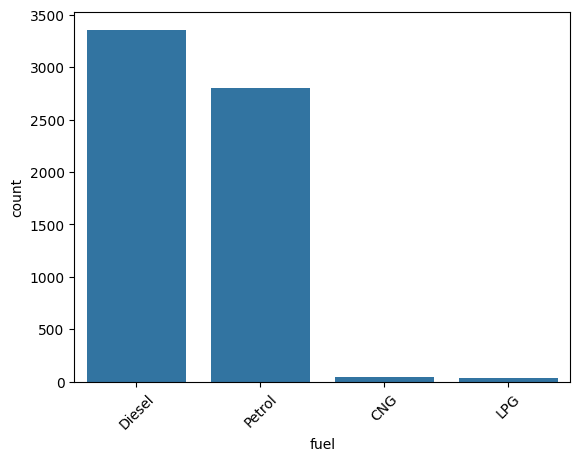

In [347]:
fuel_counts = df['fuel'].value_counts().reset_index()
fuel_counts.columns = ['fuel', 'count']

sns.barplot(x=fuel_counts['fuel'], y=fuel_counts['count'])
plt.xticks(rotation=45)
plt.show()

LPG and CNG have significantly less entries compared to diesel and petrol. This is something that we must keep in mind when we perform any kind of statistical testing regarding this for the same reason indicated above for Manual vs Automatic.

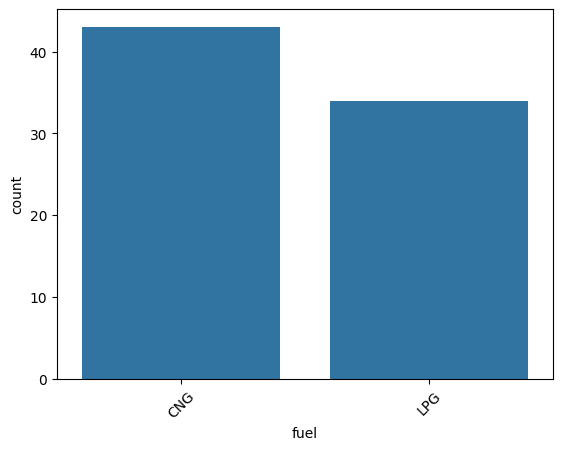

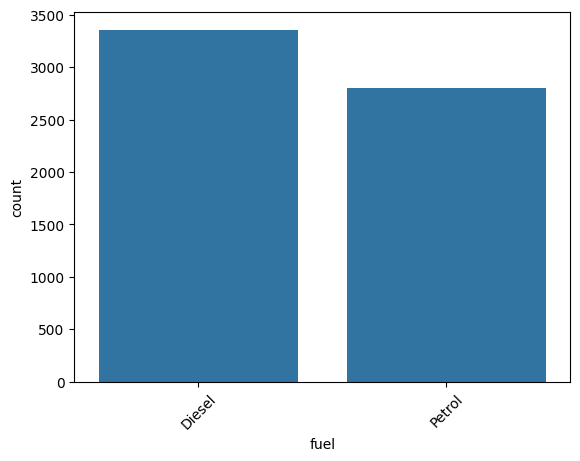

In [348]:
fuel_counts1 = fuel_counts.loc[[2,3], :]
fuel_counts2 = fuel_counts.loc[[0,1], :]

sns.barplot(x=fuel_counts1['fuel'], y=fuel_counts1['count'])
plt.xticks(rotation=45)
plt.show()

sns.barplot(x=fuel_counts2['fuel'], y=fuel_counts2['count'])
plt.xticks(rotation=45)
plt.show()

 Since this type of pairing relatively balances out the classes, it may be better to separately pairwise compare Diesel vs. Petrol and CNG vs. LPG.

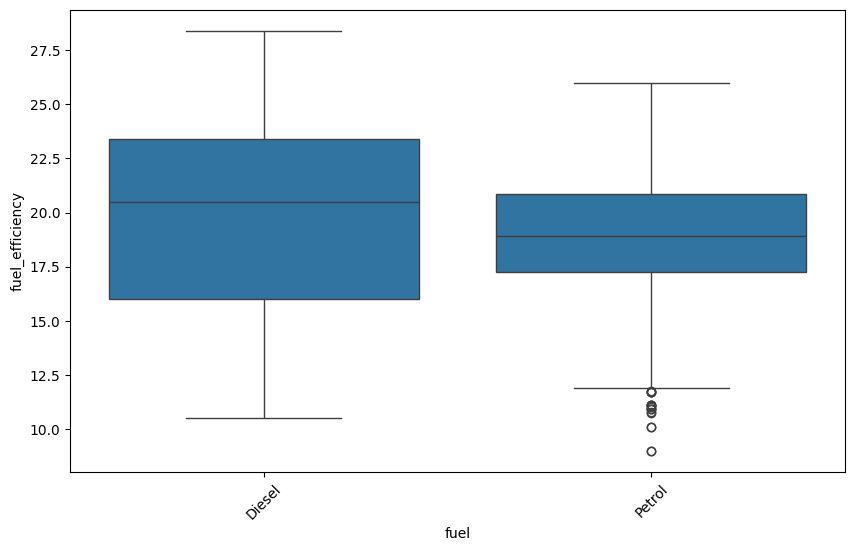

In [349]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[(df['fuel'] == "Diesel") | (df['fuel'] == "Petrol")]["fuel"], y=df[(df['fuel'] == "Diesel") | (df['fuel'] == "Petrol")]["fuel_efficiency"])
plt.xticks(rotation=45)
plt.show()

Comparing diesel vs. petrol, we find that petrol has a tighter IQR compared to diesel with several outliers on the low end.

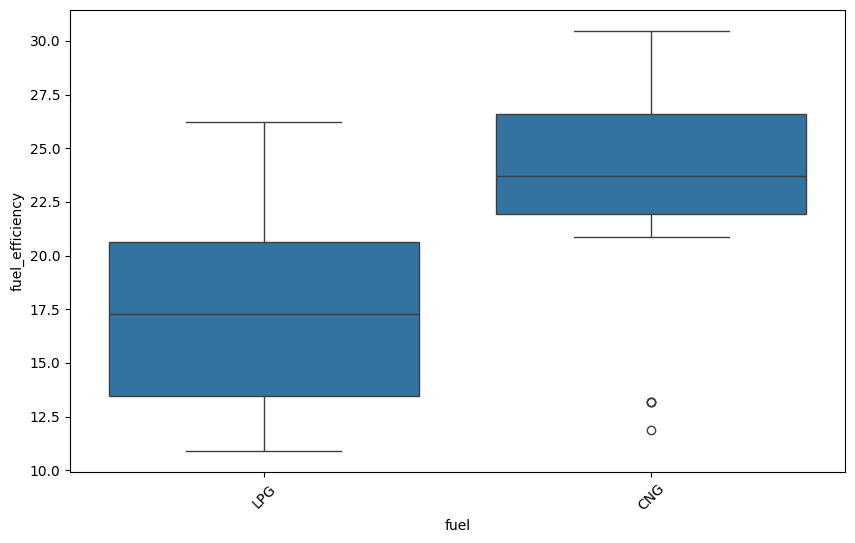

In [350]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[(df['fuel'] == "LPG") | (df['fuel'] == "CNG")]["fuel"], y=df[(df['fuel'] == "LPG") | (df['fuel'] == "CNG")]["fuel_efficiency"])
plt.xticks(rotation=45)
plt.show()

From first glance, we find that CNG is better overall in terms of fuel efficiency since its entire box is higher than the box for LPG. Of course, we should follow this up formally with statistical tests.

### EDA Question 4. What is the distribution of max power across different origins

In [351]:
df['origin'].value_counts()

origin
India             3332
South Korea       1156
Japan              704
United States      548
Germany            203
France             195
Czech Republic      60
Italy               38
Sweden               1
Name: count, dtype: int64

Once again, since classes are imbalanced to differing degrees, it might be better to perform statistical testing pairwise. For example,

* Japan vs. US
* Germany vs. France
* Czech Republic vs. Italy

There's also no point in testing Italy vs. Sweden since they have 1 car each.

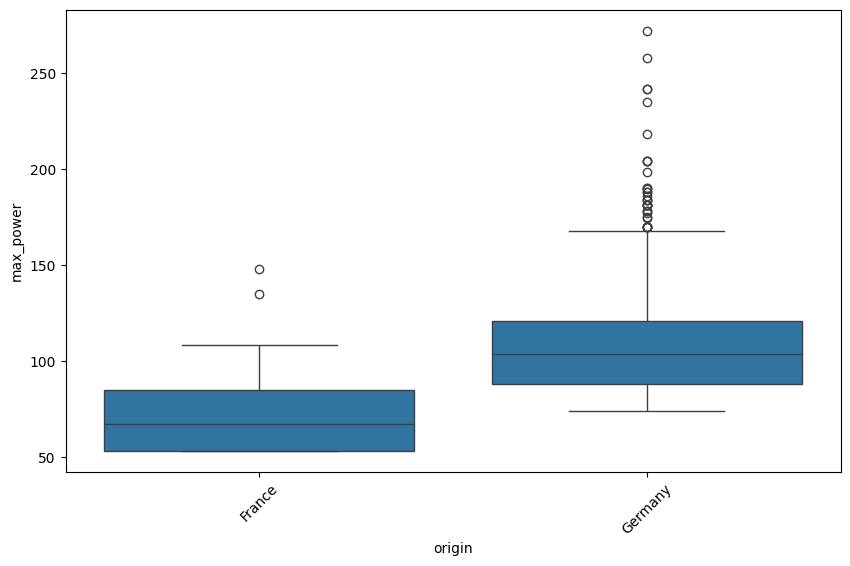

In [352]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[(df['origin'] == "Germany") | (df['origin'] == "France")]["origin"], y=df[(df['origin'] == "Germany") | (df['origin'] == "France")]["max_power"])
plt.xticks(rotation=45)
plt.show()

The boxplot shows that the distribution of max power of the cars produced from France and Germany are positively-skewed with France having a tigher IQR. Just from the boxplot alone, German cars beat French cars in terms of max power. Since Germany has no low-end outliers, the bottom fence represents the minimum value, which is also higher than France's median. We may formally follow this up with a statistical test.

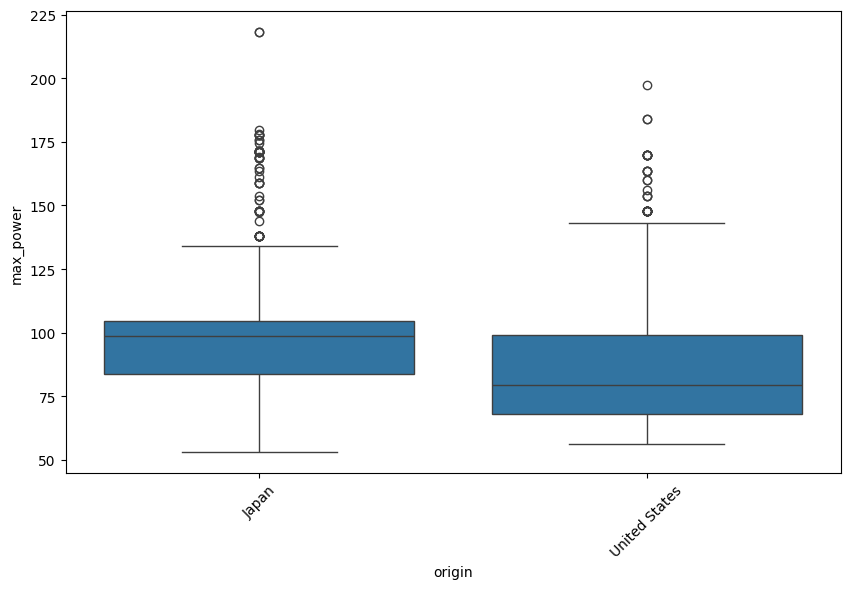

In [353]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[(df['origin'] == "Japan") | (df['origin'] == "United States")]["origin"], y=df[(df['origin'] == "Japan") | (df['origin'] == "United States")]["max_power"])
plt.xticks(rotation=45)
plt.show()

The boxplot shows that the distribution of max power of the cars produced from the US are positively skewed, while the one for Japan is only slightly positively-skewed with Japan having a slightly tigher IQR. Both appear to have relatively the same number of high-end outliers. Just from the boxplot alone, Japanese cars seem to beat US cars in terms of max power because of the higher box for Japan. We may formally follow this up with a statistical test.

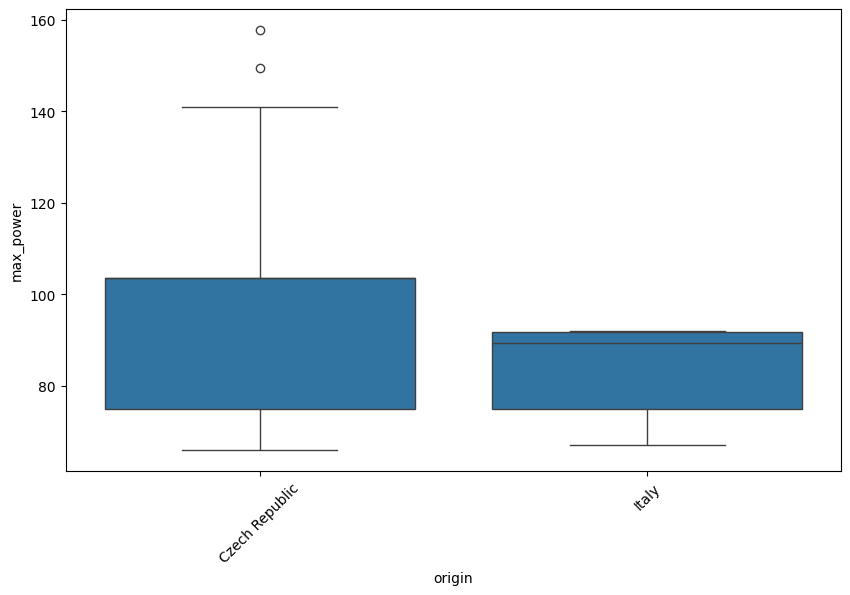

In [354]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[(df['origin'] == "Czech Republic") | (df['origin'] == "Italy")]["origin"], y=df[(df['origin'] == "Czech Republic") | (df['origin'] == "Italy")]["max_power"])
plt.xticks(rotation=45)
plt.show()

In [355]:
df[(df['origin'] == "Czech Republic")]["max_power"].describe()

count     60.000000
mean      99.009833
std       20.779913
min       66.000000
25%       75.000000
50%      103.500000
75%      103.600000
max      157.750000
Name: max_power, dtype: float64

The boxplot shows that the distribution of max power of the cars produced from the Czech Republic are positively skewed, while the opposite is true for the Italian counterparts with Italy having a slightly tigher IQR. Something interesting to point out is that the median for Czech Republic is almost equal its Q3. From this visualization, Czech Republic beats Italy because of its higher median.

## Thesis Statement/Research Question

Our EDA has shown that there are some notable relationships between car specifications, we found differences in fuel efficiency in terms of the different transmission types and in terms of the different fuel types, we also found differences in terms of max power among cars manufactured by different countries. Motivated by these insights, we present the following research question:

**How do car attributes collectively influence both fuel efficiency and resale value in used cars?**



### Car attributes to fuel efficiency

1. Is there a difference in fuel efficiency between gasoline-powered and diesel-powered cars?
* Scope in the dataset: This will make use of the `fuel_efficiency` column along with the `fuel_type` column filtered to only retain `petrol` and `diesel` powered cars.

* Significance: This questions aims to confirm or refute the notion that diesel-powered cars are more fuel efficient than their petrol-fueled counterparts. The result of this test will help buyers who greatly value fuel efficiency expand their horizons or limit their options.

2. Are car models produced in the past 10 years more fuel efficient than older models?
* Scope in the dataset: This will make use of the `fuel_efficiency` column along with the `year` column binned into two categories: pre-2015 and post-2015.

* Significance: Answering this question will help us determine whether fuel efficiency of cars have improved over time. The answer to this question will help buyers who greatly value fuel efficiency expand their horizons should no difference be found or limit their options should a difference be found.

3. Are car brands equally efficient?
* Scope in the dataset: This will make use of the `fuel_efficiency` column along with the `brand` column binned into several categories, depending on the sample size of each brand (n ≥ 30).

* Significance: The aim of this question is to determine whether there are brands that are more fuel-efficient than others. By answering this question, it will help the buyers which brands to look out for if they are looking for fuel-efficient cars.

4. Are manual transmission type cars more fuel efficient than their automatic transmission counterparts?
* Scope in the dataset: This uses the `fuel_efficiency` column along with the `transmission` column consisting of two categories: manual, and automatic while taking into account the class imbalance.

* Significance: Manual cars have three pedals while automatic vehicles only have two, which implies that a manual transmission type of car is more difficult to use. We want to know if it is worth to use a more complicated transmission with respect to `fuel_efficiency`. With this, we can help buyers decide which transmission is better to pick if they are looking for fuel-efficient cars.

In [356]:
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: C:\Users\remus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [357]:
import scipy.stats as stats
import pingouin as pg
import itertools

#### 1. Is there a statistically significant difference in fuel efficiency between petrol-powered and diesel-powered cars?

Our null hypothesis states that the mean fuel efficiency of petrol-powered cars and diesel-powered cars are equal, while the alternative hypothesis states that the means are not equal.

\begin{align*}
H_0 &: \mu_D = \mu_P \\
H_A &: \mu_D \neq \mu_P
\end{align*}

In [358]:
petrol = df[df['fuel'] == 'Petrol']['fuel_efficiency'].tolist()
diesel = df[df['fuel'] == 'Diesel']['fuel_efficiency'].tolist()

To determine which type of test we will use, we should first find out if the variances are equal. To do that, we first perform Levene's test at a significance level of $\alpha = 0.05$ with the hypotheses:

\begin{align*}
H_0 &: \sigma^2_P = \sigma^2_D \\
H_A &: \sigma^2_P \neq \sigma^2_D
\end{align*}

If the resulting p-value from Levene's test is less than 0.05, then that would imply that the two groups have unequal variances.

Text(0.5, 1.0, 'Diesel')

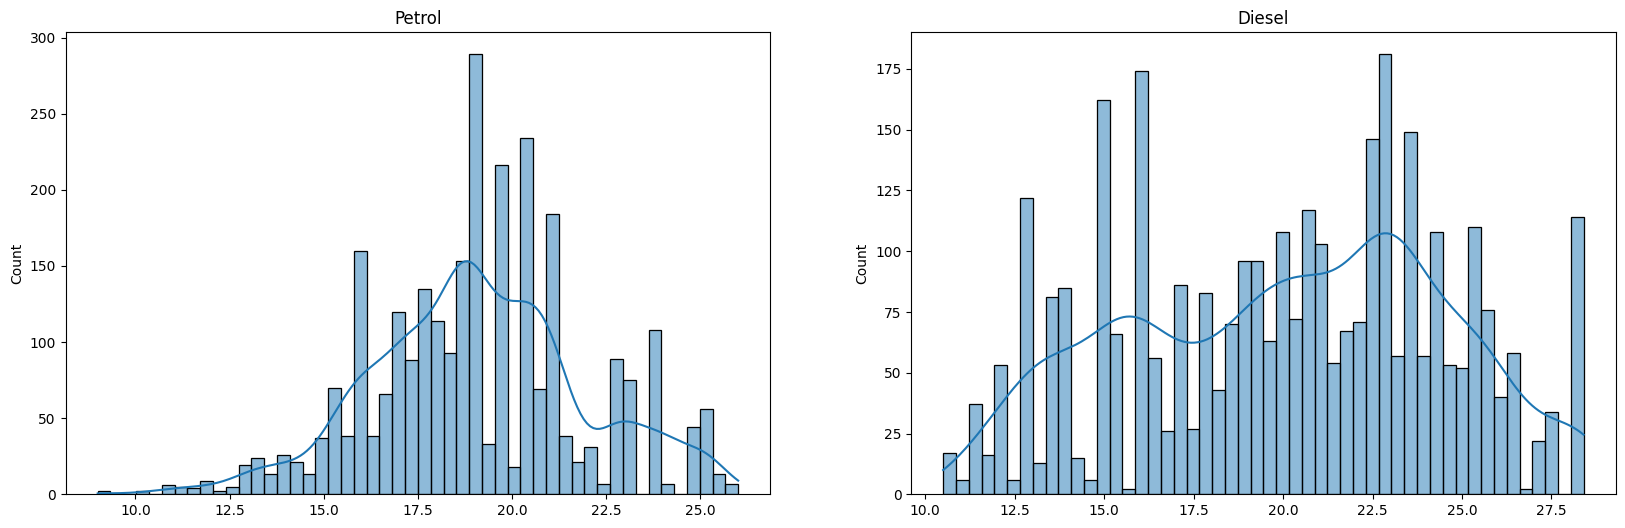

In [359]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(petrol, kde=True, bins=50)
plt.title('Petrol')
plt.subplot(1,2,2)
sns.histplot(diesel, kde=True, bins=50)
plt.title('Diesel')

In [360]:
_, p_val = stats.levene(petrol, diesel)
p_val

np.float64(1.5089545380212557e-158)

Since $p=1.51\times10^{-158} < 0.05$, we conclude that the two groups have unequal variances.

Given that the dataset has been cleaned and the duplicates has already been removed, we can safely assume that each observation are independent of each other.

In [361]:
df['fuel'].value_counts()

fuel
Diesel    3358
Petrol    2802
CNG         43
LPG         34
Name: count, dtype: int64

The sample size of both the diesel and petrol cars are greater than 30. Thus, by the Central Limit Theorem (CLT), we can assume that the sample mean of `fuel_efficiency` in both classes follows a normal distribution. Now, given that the necessary assumptions are checked (normality, independence, and unequal variances), we proceed with an unpaired t-test for unequal variances at a significance level of $\alpha = 0.05$

In [362]:
_, p_val = stats.ttest_ind(petrol, diesel, equal_var=False)
p_val

np.float64(1.9640960661978202e-24)

Since $p = 1.96\times10^{-24} < 0.05$, we reject $H_0$; the means are not equal. In fact, let's get a more definitive answer by stating the following hypotheses:

\begin{align*}
H_0 &: \mu_P \geq \mu_D \\
H_A &: \mu_P < \mu_D
\end{align*}

and performing the test, once again at a significance level of $\alpha = 0.05$.

In [363]:
_, p_val = stats.ttest_ind(petrol, diesel, equal_var=False, alternative='less')
p_val

np.float64(9.820480330989101e-25)

Since $p=9.82\times10^{-25}<0.05$, we reject the null hypothesis and conclude that mean fuel efficiency of diesel-powered cars is higher than their petrol fueled counterparts.

Recommendation: If a buyer wants a more fuel efficient car, he should focus on diesel-powered models.

#### 2. Are car models produced in the past 10 years more fuel efficient than older models?

Our null hypothesis states that the mean fuel efficiency of models produced in 2015 or later is higher than or equal to the fuel efficiency of models produced before 2015, while the alternative hypothesis states that the opposite is true. We will refer to the models produced before 2015 as the *pre* group while the models produced in 2015 or later will be referred to as the post group

\begin{align*}
H_0 &: \mu_{post} \geq \mu_{pre} \\
H_A &: \mu_{post} < \mu_{pre}
\end{align*}

In [364]:
pre = df[df['year'] < 2015]['fuel_efficiency'].tolist()
post = df[df['year'] >= 2015]['fuel_efficiency'].tolist()

Text(0.5, 1.0, 'Post-2015')

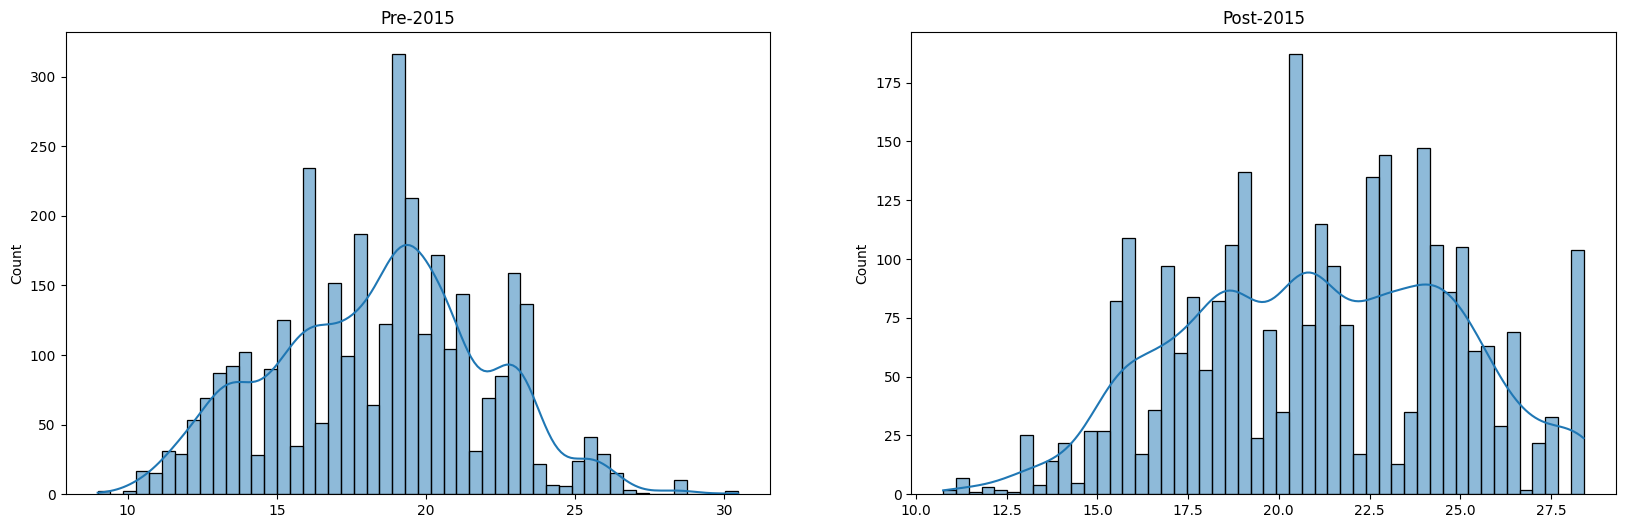

In [365]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(pre, kde=True, bins=50)
plt.title('Pre-2015')
plt.subplot(1,2,2)
sns.histplot(post, kde=True, bins=50)
plt.title('Post-2015')

Once again, we perform Levene's test at $\alpha = 0.05$

In [366]:
_, p_val = stats.levene(pre, post)
p_val

np.float64(9.161947532566295e-07)

Since $p=9.16\times10^{-7} < 0.05$, we reject the null hypothesis that the two groups have equal variance.

In [367]:
print(f'Sample Size of Models Before 2015: {len(pre)}')
print(f'Sample Size of Models After 2015: {len(post)}')

Sample Size of Models Before 2015: 3391
Sample Size of Models After 2015: 2846


Since duplicates have been dropped from the dataset, we can assume that each of the observations are independent. Furthermore, since the sample size of both lists exceeds 30, we can apply CLT to the mean fuel efficiency of the models pre-2015 and post-2015. Hence, they are normally distributed and we proceed with the unequal variance version of the unpaired t-test

In [368]:
_, p_val = stats.ttest_ind(post, pre, equal_var=False, alternative='less')
p_val

np.float64(1.0)

Since $p=1>0.05$, we fail to reject the null hypothesis, in fact, we virtually have no evidence against the null hypothesis.

If a buyer wants a more fuel efficient car, he should focus on  models manufactured in 2015 or later.

#### 3. Are car brands equally efficient?

First, observe the distribution of different unique car brands.

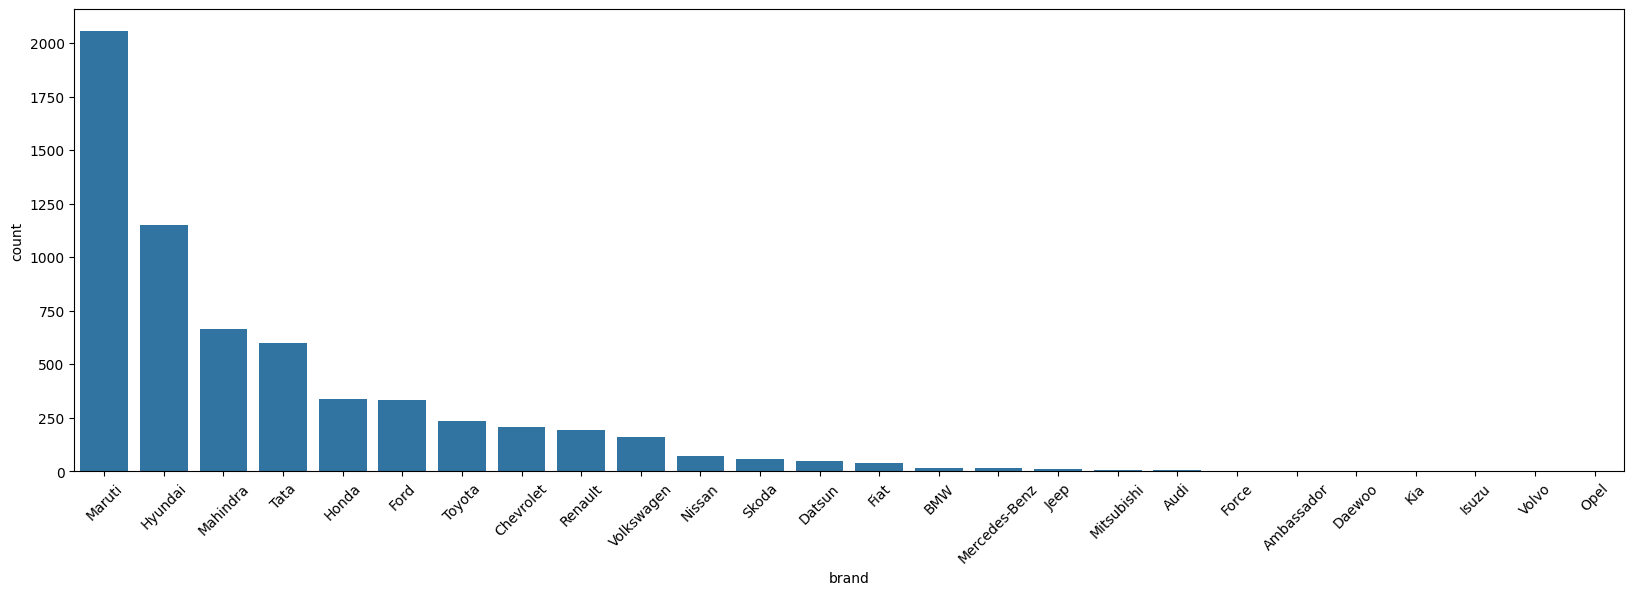

In [369]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df['brand'].value_counts().reset_index()['brand'], y=df['brand'].value_counts().reset_index()['count'])
plt.xticks(rotation=45)
plt.show()

We will only consider the brands that has a sample size of $n \geq 30$. This allows us to assume that that the distribution of the sample mean of fuel_efficiency values for a certain brand now follow a normal distribution by CLT.

In [370]:
brand_counts = df['brand'].value_counts()

valid_brands = brand_counts[brand_counts >= 30].index

display(valid_brands.tolist())

print('Number of valid brands (for CLT):' + str(valid_brands.shape[0]))

filtered_brand = df[df['brand'].isin(valid_brands)]

['Maruti',
 'Hyundai',
 'Mahindra',
 'Tata',
 'Honda',
 'Ford',
 'Toyota',
 'Chevrolet',
 'Renault',
 'Volkswagen',
 'Nissan',
 'Skoda',
 'Datsun',
 'Fiat']

Number of valid brands (for CLT):14


To determine which type of test we will use, we should first find out if the variances are equal. Let $\sigma^2_i$, for $i = 0, 1, \ldots, 14$, denote the variance of each 14 brands. We will apply Levene's test, once again, at a significance level of $\alpha = 0.05$ with the hypotheses:

\begin{align*}
H_0 &: \sigma^2_1 = \sigma^2_2 = \cdots = \sigma^2_{13} = \sigma^2_{14} \\
H_A &: \text{At least one } \sigma^2_i \text{ is different}
\end{align*}

If the resulting p-value from Levene's test is less than 0.05, then that would imply that at least one group has a different variance.

In [371]:
_, p_val = stats.levene(*[df[df['brand'] == valid_brand]['fuel_efficiency'] for valid_brand in valid_brands.tolist()])
p_val

np.float64(8.090884542589755e-80)

Given that the data has been cleaned and the duplicates have been dropped already, we can assume that each observations are independent. With this, all assumptions are now checked and we can proceed with Welch's ANOVA which allows unequal variances among groups.

Our null hypothesis states that the mean fuel efficiency of all the valid brands specified beforehand, are equal. Meanwhile, the alternative hypothesis states that at least one brand has a different mean fuel efficiency than the other brands. Let $\mu_i$, for $i = 0, 1, \ldots, 14$, denote the mean of each 14 brands. Hence, we have

\begin{align*}
H_0 &: \mu_{1} = \mu_{2} = \cdots = \mu_{13} = \mu_{14} \\
H_A &: \text{At least one } \mu_i \text{ is different}
\end{align*}

Since we are comparing three or more independent groups and we have unequal variances, we will use Welch's ANOVA and use $\alpha = 0.05$.

In [372]:
welch_anova = pg.welch_anova(dv='fuel_efficiency', between='brand', data=filtered_brand)
print(welch_anova)

  Source  ddof1       ddof2           F          p-unc       np2
0  brand     13  631.553029  149.732394  5.492005e-183  0.207623


Since $p = 5.492\times10^{-183} < 0.05$, we reject the null hypothesis and conclude that at least one of the brand has a different mean fuel efficiency than the other brands.

However, this is does not answer which of the brands should they look for. So we will apply a pairwise test to determine which brands have a higher mean fuel efficiency than others.

Given that the variances are unequal, we will make use of Welch's T-Test for unequal variances on each pairwise brands. With this, we have the following hypotheses:

\begin{align*}
H_0 &: \mu_{i} \leq \mu_{j}\\
H_A &: \mu_{i} > \mu_{j}
\end{align*}

where $i, j \in \{ 1, 2, \ldots, 14 \} $ and $i < j$

In [373]:
sorted_brands = filtered_brand.groupby('brand')['fuel_efficiency'].mean().sort_values(ascending=False).index.tolist()
brand_pairs = list(itertools.combinations(sorted_brands, 2))

results = []

for A, B in brand_pairs:
  group1 = filtered_brand[filtered_brand['brand'] == A]['fuel_efficiency']
  group2 = filtered_brand[filtered_brand['brand'] == B]['fuel_efficiency']

  g1_mean = group1.mean()
  g2_mean = group2.mean()
  diff_mean = g1_mean - g2_mean

  # Check for equal variances
  _, p_val_levene = stats.levene(group1, group2)
  equal_var = p_val_levene > 0.05

  # Perform t-test
  _, p_val = stats.ttest_ind(group1, group2, equal_var=equal_var, alternative='greater')

  # Store results of each pairing
  results.append({'A': A,
                  'B': B,
                  'mean(A)': g1_mean,
                  'mean(B)': g2_mean,
                  'diff': diff_mean,
                  'pval': p_val})

welch_ttest = pd.DataFrame(results)

display(welch_ttest)

,A,B,mean(A),mean(B),diff,pval
0,Renault,Maruti,22.100051,21.160448,0.939604,1.838306e-06
1,Renault,Datsun,22.100051,20.999400,1.100651,2.854606e-05
2,Renault,Ford,22.100051,20.116265,1.983786,1.913885e-13
3,Renault,Honda,22.100051,20.086391,2.013661,9.976543e-11
4,Renault,Hyundai,22.100051,19.868506,2.231546,3.804988e-27
...,...,...,...,...,...,...
86,Skoda,Toyota,19.045333,16.315915,2.729418,5.020435e-09
87,Skoda,Mahindra,19.045333,15.872474,3.172860,9.073361e-17
88,Chevrolet,Toyota,18.570145,16.315915,2.254230,1.416765e-08
89,Chevrolet,Mahindra,18.570145,15.872474,2.697671,1.670697e-19


We are only interested on the pair of brands that rejects the null hypothesis; that is, $\text{pval} < 0.05$

In [374]:
greater_mean_pairwise = welch_ttest[welch_ttest['pval'] < 0.05].reset_index(drop=True)

display(greater_mean_pairwise)

,A,B,mean(A),mean(B),diff,pval
0,Renault,Maruti,22.100051,21.160448,0.939604,1.838306e-06
1,Renault,Datsun,22.100051,20.999400,1.100651,2.854606e-05
2,Renault,Ford,22.100051,20.116265,1.983786,1.913885e-13
3,Renault,Honda,22.100051,20.086391,2.013661,9.976543e-11
4,Renault,Hyundai,22.100051,19.868506,2.231546,3.804988e-27
...,...,...,...,...,...,...
63,Tata,Mahindra,19.057276,15.872474,3.184802,5.929221e-55
64,Skoda,Toyota,19.045333,16.315915,2.729418,5.020435e-09
65,Skoda,Mahindra,19.045333,15.872474,3.172860,9.073361e-17
66,Chevrolet,Toyota,18.570145,16.315915,2.254230,1.416765e-08


Because of the way we constructed our hypotheses and our code, we know that this dataframe only shows the pairings where `A` has a higher mean efficiency than `B`. Therefore, to get our rankings, we just need to count how many times each brand appears in column `A`.

In [375]:
greater_mean_pairwise['A'].value_counts()

A
Renault       13
Maruti        11
Datsun        11
Ford           6
Honda          6
Hyundai        5
Volkswagen     4
Nissan         3
Fiat           3
Tata           2
Skoda          2
Chevrolet      2
Name: count, dtype: int64

Based on the findings, Renault has the "most fuel efficient" cars in comparison to other brands. This follows that the buyer must look out for Renault cars if they are looking for fuel-efficient car.

 #### 4. Are manual transmission type cars more fuel efficient than their automatic transmission counterparts?

Our null hypothesis states that the mean fuel efficiency of manual cars is greater than or equal to that of automatic transmission types, while the alternative hypothesis states that the it is less.

\begin{align*}
H_0 &: \mu_M \geq \mu_A \\
H_A &: \mu_M < \mu_A
\end{align*}

In [376]:
manual = df[df['transmission'] == 'Manual']['fuel_efficiency'].tolist()
automatic = df[df['transmission'] == 'Automatic']['fuel_efficiency'].tolist()

Next, we will apply Levene's Test at a significance level of $\alpha = 0.05$ with the hypotheses:

\begin{align*}
H_0 &: \sigma^2_M = \sigma^2_A \\
H_A &: \sigma^2_M \neq \sigma^2_A
\end{align*}

If the resulting p-value from Levene's test is less than 0.05, then that would imply that the two groups have unequal variances.

Text(0.5, 1.0, 'Automatic')

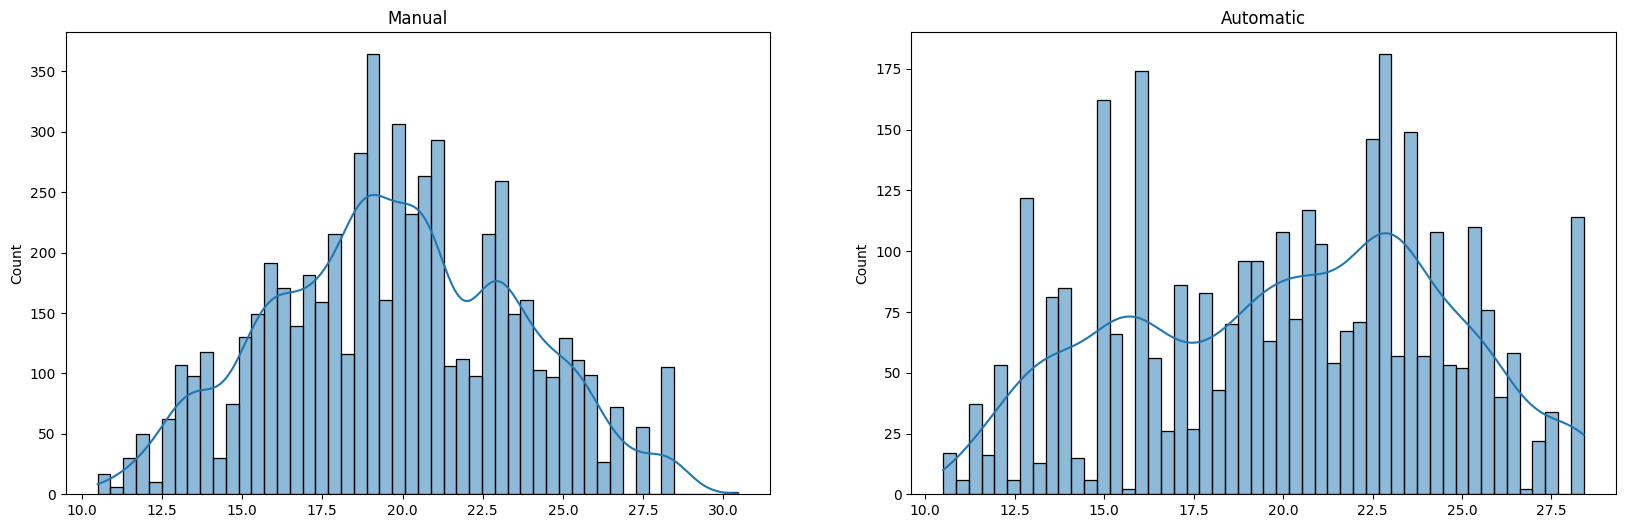

In [377]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(manual, kde=True, bins=50)
plt.title('Manual')
plt.subplot(1,2,2)
sns.histplot(diesel, kde=True, bins=50)
plt.title('Automatic')

In [378]:
_, p_val = stats.levene(manual, automatic)
p_val

np.float64(0.05767823310291833)

Since $p = 0.05767 > 0.05$, we fail to reject the null hypothesis that the two groups have equal variance.

Now, let's check the sample size of each group.

In [379]:
df['transmission'].value_counts()

transmission
Manual       5856
Automatic     381
Name: count, dtype: int64

Given that the sample size are $n \geq 30$, we can apply CLT and assume that the distribution of the sample mean of fuel efficiency in each group follows a normal distribution. Furthermore, we can assume that each observations are independent of each other since we have cleaned the data already.

Now that we have checked the necessary assumptions, we proceed with an unpaired t-test at a significance level of $\alpha = 0.05$

In [380]:
_, p_val = stats.ttest_ind(manual, automatic, alternative="less")
p_val

np.float64(1.0)

Since p = 1.0 > 0.05, we fail to reject the null hypothesis and thus, we conclude that manual cars are more fuel efficient than automatic cars.

This follows that if the buyer is looking for a more fuel-efficent car, they should look more on manual cars rather than automatic cars.

### Car attributes to car resale value

1. Is there a difference in resale price between cars who have been pre-owned by a differing number of owners
* Scope in the dataset: This will make use of the `price` column along with the `owner` column. Groups will be formed according to the unique values of the `owner` column, and these groups will then be tested.

* Significance: It could happen that buyers prefer first-owned type of cars instead of cars having multiple owners. So, maybe as the number of past owner increases, the resalve value goes down. To determine this, we perform tests to answer if the suspicion is correct.

2. Is there a statistically significant difference in the resale value between manual and automatic type of cars?

* Scope in the dataset: This will use the `price` column and the `transmission` column consisting of two categories: manual and automatic.

* Significance: Similar to the question "Between manual and automatic transmission type of cars, which is more fuel-efficient?", we address if it is worth to use manual type cars in terms of resale value or opt for an easier transmission.


3. Is there a difference in resale price of vehicles between individual and dealer types?

* Scope in the dataset: This will utilize the `price` column along with the `seller_type` column consisting categories: "Individual" and "Dealer" types of sellers.

* Significance: Different seller types: individual sellers, and dealers, may impact the resale price of a vehicle. Buyers might trust certain seller types more, leading to price variations. For instance, dealerships might charge a premium due to warranties and inspections, while individual sellers may offer lower prices. With the statistical test to follow, we can verify whether these differences are significant and help buyers decide which seller type to prioritize considering the car resale value.

#### 1. Is there a statistically significant difference in the mean resale value based on the number of past owners?

Our null hypothesis states that the mean resale price of used cars categorized by the number of past owners, is equal across all ownership groups. While the alternative hypothesis states that the opposite is true. We note that $\mu_1$ is the mean of first owner reseller, $\mu_2$ is for the second owner, $\mu_3$ is for the third owner, and $\mu_4$ is for the fourth and above owner.

\begin{align*}
H_0 &: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} \\
H_A &: \text{At least one } \mu_i \text{ is different}
\end{align*}

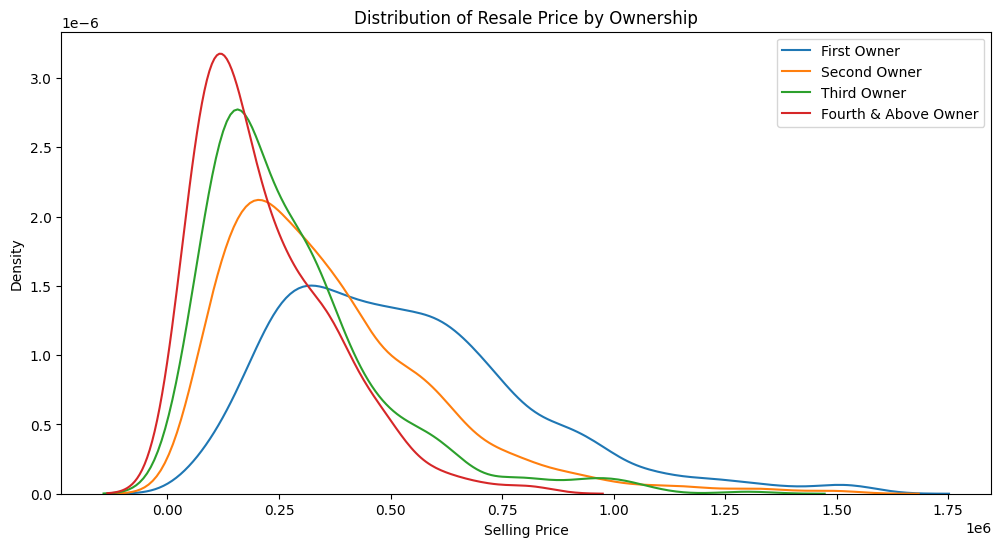

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns

owners = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']

plt.figure(figsize=(12, 6))

for owner in owners:
    sns.kdeplot(df[df['owner'] == owner]['selling_price'], label=owner)

plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.title('Distribution of Resale Price by Ownership')
plt.legend()
plt.show()


We see here that the distributions of these groups are not normal. With this, we cannot use ANOVA. We proceed to check if Welch's ANOVA is fit to do the statistical test.

1. The dependent variable, in this case the resale price is a **continuous variable**.
2. The independent variable should have **two or more categorical variables**, which is satisfied.
3. Independence of observations, we simply check if there are duplicate entries. We have already checked this and dropped the duplicates.
4. The distributions for each group should similar shapes. So, we check if these distributions satisfy that through Levene's Test.


To determine which type of test we will use, we should first find out if the variances are equal. Let $\sigma^2_i$, for $i = 1, 2, 3, 4$, denote the variance of each owner category. We will apply Levene's test, once again, at a significance level of $\alpha = 0.05$ with the hypotheses:

\begin{align*}
H_0 &: \sigma^2_1 = \sigma^2_2 = \sigma^2_{3} = \sigma^2_{4} \\
H_A &: \text{At least one } \sigma^2_i \text{ is different}
\end{align*}

If the resulting p-value from Levene's test is less than 0.05, then that would imply that the groups have unequal variances.

In [382]:
_, p_val = stats.levene(*[df[df['owner'] == owner]['selling_price'] for owner in owners])
p_val

np.float64(7.191992815478287e-36)

Since the $p = 7.1920\times 10^{-36}$, we reject the null hypothesis of equal variances.

Since we have three or more independent groups, and we have just seen at 95% confidence level that they have unequal variances, we proceed with Welch's ANOVA again with $\alpha=0.05$.

In [383]:
welch_anova = pg.welch_anova(dv='selling_price', between='owner', data=df)
print(welch_anova)

  Source  ddof1      ddof2          F          p-unc       np2
0  owner      3  632.99779  391.32881  1.066893e-143  0.121977


Since $p = 1.07\times10^{-143} < 0.05$, we reject the null hypothesis and conclude that at least one of the owner category has a different mean selling price than the others.

Again, this does not really gives any direct guidance of what a car buyer should look for. We only know at this point that these groups have a statistically significant difference at 95% interval. So, move on to test if there is a difference in means between cars owned previously by one owner versus the rest.

Given that the variances are unequal, we will make use of Welch's T-Test for unequal variances on each pairwise brands. With this, we have the following hypotheses:

\begin{align*}
H_0 &: \mu_{i} \leq \mu_{j}\\
H_A &: \mu_{i} > \mu_{j}
\end{align*}

where $i, j \in \{ 1, 2, \ldots, 4 \} $ and $i < j$


In [384]:
sorted_owners = df.groupby('owner')['selling_price'].mean().sort_values(ascending=False).index.tolist()
owner_pairs = list(itertools.combinations(sorted_owners, 2))

results = []

for A, B in owner_pairs:
  group1 = df[df['owner'] == A]['selling_price']
  group2 = df[df['owner'] == B]['selling_price']

  g1_mean = group1.mean()
  g2_mean = group2.mean()
  diff_mean = g1_mean - g2_mean

  # Check for equal variances
  _, p_val_levene = stats.levene(group1, group2)
  equal_var = p_val_levene > 0.05

  # Perform t-test
  _, p_val = stats.ttest_ind(group1, group2, equal_var=equal_var, alternative='greater')

  # Store results of each pairing
  results.append({'A': A,
                  'B': B,
                  'mean(A)': g1_mean,
                  'mean(B)': g2_mean,
                  'diff': diff_mean,
                  'pval': p_val})

owners_wt = pd.DataFrame(results)

display(owners_wt)

,A,B,mean(A),mean(B),diff,pval
0,First Owner,Second Owner,527900.468052,362352.311739,165548.156313,2.839330e-110
1,First Owner,Third Owner,527900.468052,279090.463617,248810.004434,2.389640e-98
2,First Owner,Fourth & Above Owner,527900.468052,217982.952381,309917.515671,3.171681e-58
3,Second Owner,Third Owner,362352.311739,279090.463617,83261.848121,7.284603e-15
4,Second Owner,Fourth & Above Owner,362352.311739,217982.952381,144369.359358,9.600151e-22
5,Third Owner,Fourth & Above Owner,279090.463617,217982.952381,61107.511237,3.078589e-04


In [385]:
owners_diff_pairwise = owners_wt[owners_wt['pval'] < 0.05].reset_index(drop=True)

owners_diff_pairwise

,A,B,mean(A),mean(B),diff,pval
0,First Owner,Second Owner,527900.468052,362352.311739,165548.156313,2.839330e-110
1,First Owner,Third Owner,527900.468052,279090.463617,248810.004434,2.389640e-98
2,First Owner,Fourth & Above Owner,527900.468052,217982.952381,309917.515671,3.171681e-58
3,Second Owner,Third Owner,362352.311739,279090.463617,83261.848121,7.284603e-15
4,Second Owner,Fourth & Above Owner,362352.311739,217982.952381,144369.359358,9.600151e-22
5,Third Owner,Fourth & Above Owner,279090.463617,217982.952381,61107.511237,3.078589e-04


We then count the number of times where each owner category has a higher mean than each of the rest. We will define the "highest resale value" owner category type to be the one with the highest count.

In [386]:
higher_mean_count = {owner: 0 for owner in owners}

for _, row in owners_diff_pairwise.iterrows():
    ownerA = row["A"]
    ownerB = row["B"]
    mean_diff = row["diff"]

    if mean_diff > 0:
        higher_mean_count[ownerA] += 1
    else:
        higher_mean_count[ownerB] += 1

higher_mean_count = pd.DataFrame(list(higher_mean_count.items()), columns=['owner', 'count'])
higher_mean_count = higher_mean_count.sort_values(by='count', ascending=False).reset_index(drop=True)

display(higher_mean_count)

,owner,count
0,First Owner,3
1,Second Owner,2
2,Third Owner,1
3,Fourth & Above Owner,0


Based on the findings, if a buyer wants a car prioritizing low price, they should prioritize purchasing Fourth & Above Owner cars since their resale prices drop as the number of owners increases. However if a buyer wants to prioritize a car's resale value, they should buy First Owner type of cars.


#### 2. Is there a statistically significant difference in the resale value between manual and automatic type of cars?

In [387]:
df['transmission'].value_counts()

transmission
Manual       5856
Automatic     381
Name: count, dtype: int64

Text(0.5, 1.0, 'Automatic Transmission Selling Price')

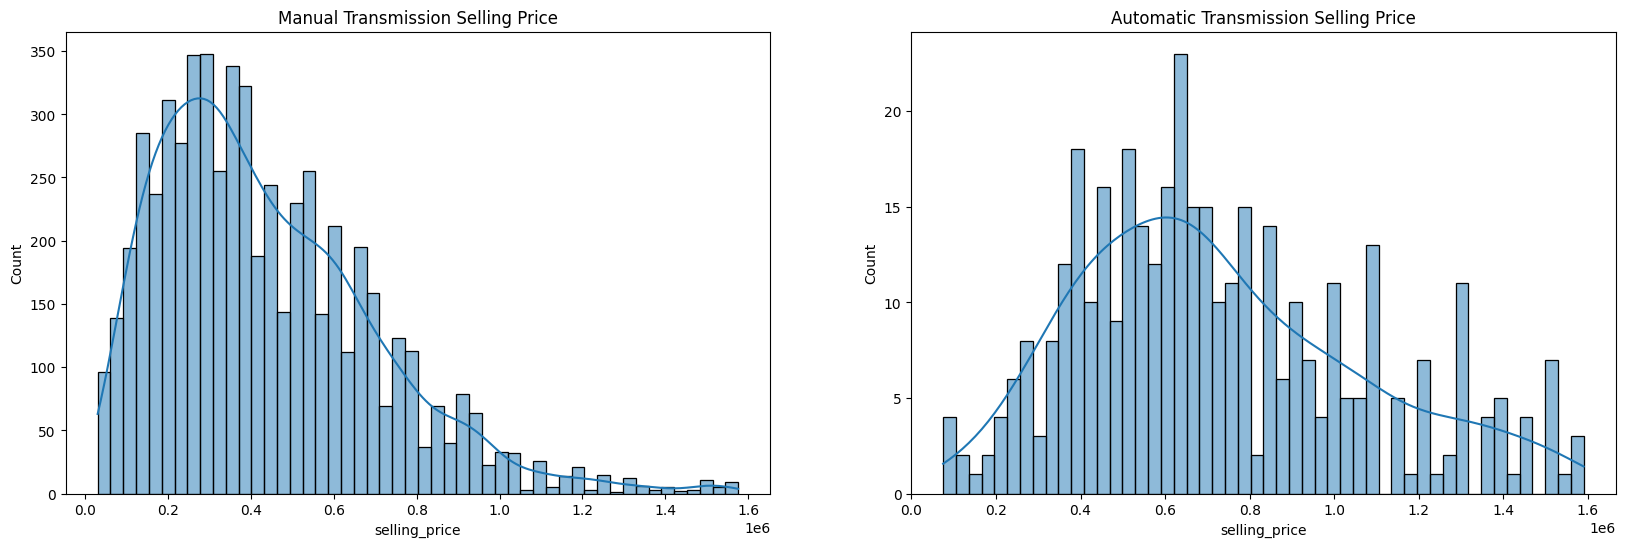

In [388]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df[df['transmission'] == 'Manual']['selling_price'], kde=True, bins=50)
plt.title("Manual Transmission Selling Price")
plt.subplot(1,2,2)
sns.histplot(df[df['transmission'] == 'Automatic']['selling_price'], kde=True, bins=50)
plt.title("Automatic Transmission Selling Price")

We note that the categorical variable `transmission` does not follow a normal distribution, and has a significant class imbalance. And so, we decided to use Mann-Whitney U Test, because this is a non-parametric test (MacFarland et al., 2016; Laerd Statistics, n.d.).



We want to check which is greater, so we proceed with `alternative='less'`.

Our null hypothesis states that the distribution of resale prices of used cars in manual type transmission of cars is greater than or equal to the distribution underlying automatic type of cars. The alternative hypothesis on the other hand, states that the opposite is true. Let $M$ be the resale prices of manual transmission cars and $A$ for the automatic transmission cars.

Let $S_M(u)$ and $S_A(u)$ be the survival functions of the distributions underlying $M$ and $A$, respectively.

\begin{align*}
H_0 &: S_M(u) \geq S_A(u) \text{ for all } u\\
H_A &: S_M(u) < S_A(u) \text{ for all } u
\end{align*}



In [389]:
from scipy.stats import mannwhitneyu

manual_prices = df[df['transmission'] == 'Manual']['selling_price']
automatic_prices = df[df['transmission'] == 'Automatic']['selling_price']

u_stat, p_value = mannwhitneyu(manual_prices, automatic_prices, alternative='less')

print(f"P-value: {p_value}")

P-value: 4.009800827233872e-64


Since $p=4.01\times10^{-64} < 0.05$, we reject the null hypothesis at 5% significance level that the distribution of resale prices of used cars in manual type transmission of cars is greater than or equal to the distribution underlying automatic type of cars. In other words, manual transmission cars tend to have lower resale value compared to automatic transmission cars.

We note that manual cars are more complicated to use than automatic type because of the need for clutch control and gear shifting. But if a buyer does not care about the difference in difficulty, then buying a manual car is more cost-effective.

#### 3. Is there a difference in resale price of vehicles between individual and dealer types?

Let us take a look at how each seller type is distributed within the listings.

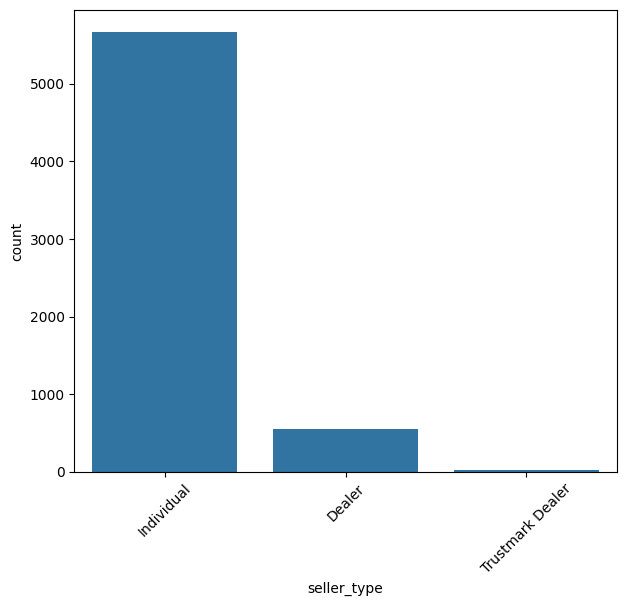

In [390]:
plt.figure(figsize=(7, 6))
sns.barplot(x=df['seller_type'].value_counts().reset_index()['seller_type'], y=df['seller_type'].value_counts().reset_index()['count'])
plt.xticks(rotation=45)
plt.show()

For this analysis, we are only going to focus on "Individual" and "Dealer" types of sellers.

Our null hypothesis states that the mean resale price of cars sold by individual sellers is equal to those sold by dealerships. The alternative hypothesis states the opposite; there is a difference.

\begin{align*}
H_0 &: \mu_I = \mu_D \\
H_A &: \mu_I \neq \mu_D
\end{align*}

Text(0.5, 1.0, 'Dealer Resale Price')

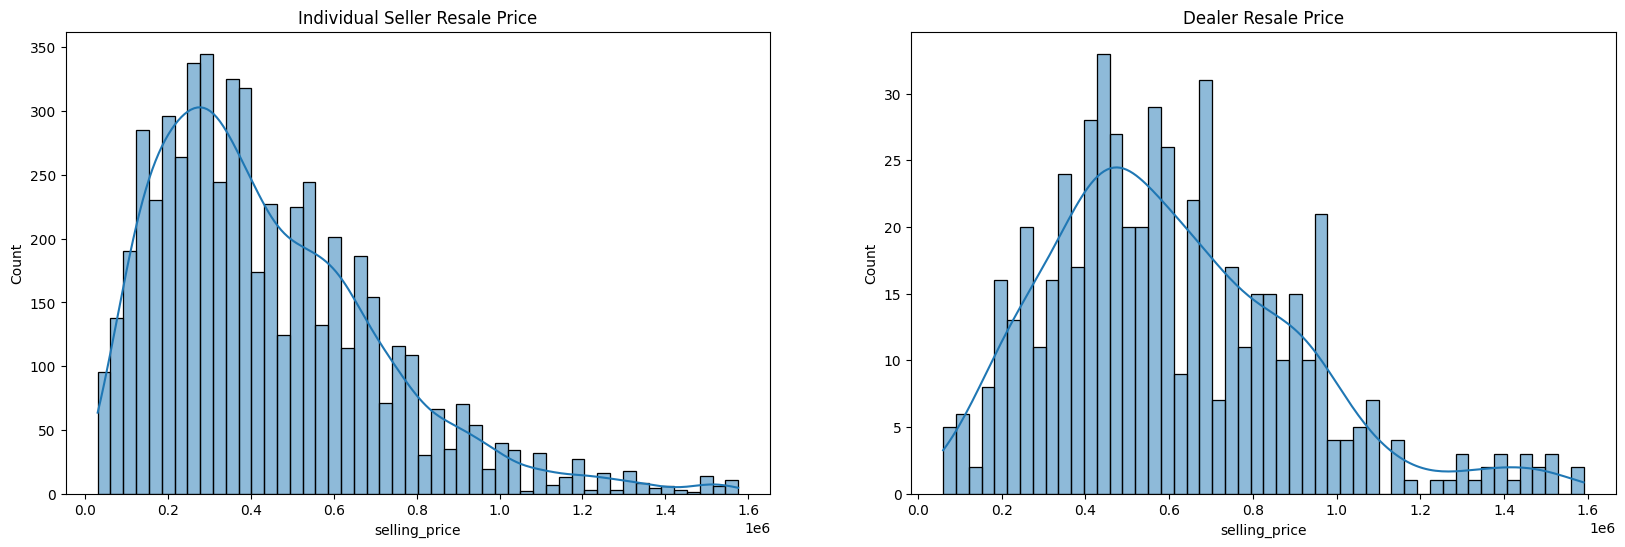

In [391]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df[df['seller_type'] == 'Individual']['selling_price'], kde=True, bins=50)
plt.title("Individual Seller Resale Price")
plt.subplot(1,2,2)
sns.histplot(df[df['seller_type'] == 'Dealer']['selling_price'], kde=True, bins=50)
plt.title("Dealer Resale Price")

Now, let us first perform a Levene test for homoscedasticity.

In [392]:
levene_result = stats.levene(*[df[df['seller_type'] == seller]['selling_price'] for seller in ['Individual', 'Dealer']])
levene_result

LeveneResult(statistic=np.float64(5.715955083934974), pvalue=np.float64(0.016840993118379825))

Since $0.0168 < 0.05$, we conclude that the variance in vehicle efficiency between vehicles sold by individual sellers and vehicles sold by dealers are not the same. This compels us to make use of Welch's $t$-test.

To ensure that Pingouin's `ttest` function makes use of Welch's t-test, we set the parameter `correction="auto"`, which would force the use of Welch's t-test when the group sizes are unequal.

In [393]:
result = pg.ttest(df[df['seller_type'] == 'Individual']['selling_price'], df[df['seller_type'] == 'Dealer']['selling_price'], paired=False, correction="auto")
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-12.366035,645.660696,two-sided,1.125149e-31,"[-186505.99, -135390.88]",0.586467,2.02e+31,1.0


Because our $p$-value is much less than $0.05$, there is enough evidence to believe that the average resale price of individual sellers is different from that of dealers. Let us make use of the Mann-Whitney U test.

Our null hypothesis states that the mean resale price of cars sold by individual sellers is greater than or equal to those sold by dealerships, while the alternative hypothesis states the mean resale price of individual-sold cars is less.

\begin{align*}
H_0 &: \mu_I \geq \mu_D \\
H_A &: \mu_I < \mu_D
\end{align*}

In [394]:
indiv_prices = df[df['seller_type'] == 'Individual']['selling_price']
dealer_prices = df[df['seller_type'] == 'Dealer']['selling_price']

u_stat, p_value = mannwhitneyu(manual_prices, automatic_prices, alternative='less')

print(f"P-value: {p_value}")

P-value: 4.009800827233872e-64


Since the $p$-value is less than $0.05$, there is not enough evidence to support that the average resale price of cars sold by individual sellers is at least the resale price of cars sold by dealers. Thus, vehicles sold by dealers typically cost higher than those sold by individual sellers.

## Summary of conclusions at 95% confidence level

### Car attributes to fuel efficiency

1. Is there a difference in fuel efficiency between gasoline-powered and diesel-powered cars?
- Conclusion: Diesel-powered cars are more fuel-efficient.

2. Are car models produced in the past 10 years more fuel efficient than older models?
- Conclusion: Cars manufactured in 2015 or later are more fuel-efficient.

3. Are car brands equally efficient?
- Conclusion: Renault have the "most fuel efficient" cars in comparison to other brands.

4. Are manual vs automatic transmission type cars equally efficient?
- Conclusion: Automatic cars are more fuel-efficent than manual cars.

### Car attributes to car resale value

1. Is there a difference in resale price between cars who have been pre-owned by a differing number of owners
- Conclusion: The resale prices of cars drop as the number of owners increases.

2. Is there a statistically significant difference in the resale value between manual and automatic type of cars?
- Conclusion: Manual transmission cars tend to have lower resale value compared to automatic transmission cars. We note that manual cars are more complicated to use than automatic type because of the need for clutch control and gear shifting.


3. Resale Price of Vehicles Between Seller Types
- Conclusion: Vehicles sold by dealers typically cost higher than those sold by individual sellers


## Recommendations

When choosing a car to buy, buyers typically fall into one of three categories: those who want a fuel-efficient car, those who value resale potential, or the most budget-friendly option. Each option has different car features considerations:

- The ideal choice for buyers targeting a fuel-efficient car is a diesel fuel-type, manual transmission car manufactured in 2015 or later, preferably Renault.


- If a buyer is looking for the cheapest option, they should look for older models with manual transmissions, vehicles with multiple previous owners, and vehicles not sold by a dealer. However, this option entails buying non-fuel-efficient cars since older cars are less efficient, and manual transmission vehicles are less efficient.

- If a buyer is looking for an efficient car yet not too pricey, they should opt for a diesel–powered, manual Renault manufactured in 2015 or later, with multiple previous owners and bought from an individual seller.

## References

Lee, S., & Lee, D. K. (2018). What is the proper way to apply the multiple comparison test? Korean Journal of Anesthesiology, 71(5), 353–360. https://doi.org/10.4097/kja.d.18.00242

MacFarland, T. W., Yates, J. M., MacFarland, T. W., & Yates, J. M. (2016). Mann–whitney u test. Introduction to nonparametric statistics for the biological sciences using R, 103-132.


Statistics Solutions. (n.d.). Mann-Whitney U test. Statistics Solutions. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/mann-whitney-u-test/

Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & SciPy Contributors. (2024). scipy.stats.mannwhitneyu. SciPy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

